# Overview

This notebook shows simple metadynamics methods and can be used to learn how to prepare input files for Langevin simulations and understand the strength of metadynamics for overcomming high energy barriers.

The notebook will be structured as follows:

 - Simple Langevin Simulations
 - Metadyanamics Simulations
 - Well-Tempered Metadynamics simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import statistics
import scipy.integrate as integrate
import plumed
import pandas as pd
from labellines import labelLines
from labellines import labelLine
import scipy.io
import matplotlib as mpl
from matplotlib import rc

plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 14})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

In [2]:
#make sure to run this cell in the right directory!!
path = os.getcwd()
print("The path to this notebook is:", path)

The path to this notebook is: /home/antoniu/Desktop/Public_Notebooks


# Define and plot analytical free energy surface

The analytical free energy surface will be defined as $y(x) = 7*x^4-23*x^2$

It will be used to run Langevin dynamics simulations. The simple form of the function will serve the purpose that simulations can be run very easily. Additionally, after constructing the free energy surface form the trajectory, it can be compared to the anaytical form.

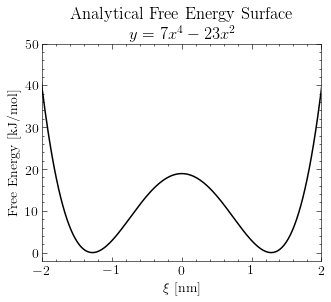

In [3]:
#define grid
x = np.linspace(-3,3,400)
#define analytical surface
y = 7*x**4-23*x**2
#set minimum of surface to zero
y = y - np.min(y)

#plot analytical surface
plt.plot(x, y, color="black")
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Analytical Free Energy Surface\n" + r"$y=7x^4-23x^2$")
plt.show()

# Runnig a simple Langevin simulation

Running a simple simulation will make clear the problem of overcomming a high energy barrier.

To do this, a new folder is created and two files need to be written:

    1 - The plumed.dat file
        This file tells plumed about the system it need to simulate.
        Baises such as Metadynamic or umbrella sampling biases can be specified.
        Various values can be saved, such as the trajectory, the bias and even the free energy surface.
        
    2 - The input file
        This file specifies certian input parameters (e.g. temperature, time-step , ...)

In [5]:
#Make new folder for the simple simulation
os.chdir(path)
try: os.mkdir("simple_simulation")
except: print("folder \"simple_simulation\" already exists")
os.chdir("simple_simulation")

#length of simulation
length = 1000000

#Prepare the input files
#The plumed.dat 
with open("plumed.dat","w") as f:
    print("""#Define system as distance between two atoms
p: DISTANCE ATOMS=1,2 COMPONENTS
#Define the force field (the analytical function)
ff: MATHEVAL ARG=p.x PERIODIC=NO FUNC=(7*x^4-23*x^2)
bb: BIASVALUE ARG=ff

#Make Histogram
hh: HISTOGRAM ARG=p.x GRID_MIN=-3 GRID_MAX=3 GRID_BIN=200 BANDWIDTH=0.01
#Convert Histogram to FES
fes: CONVERT_TO_FES GRID=hh TEMP=120

#Save Histogram and FES at the end. Save position every 10 time-steps    
DUMPGRID GRID=hh FILE=histo STRIDE={}
DUMPGRID GRID=fes FILE=fes.dat STRIDE={}
PRINT FILE=position ARG=p.x STRIDE=10
""".format(length,length),file=f)
     
#The input file        
with open("input","w") as f:
    print("""temperature 1
tstep 0.005
friction 1
dimension 1
nstep {}
ipos -1.0
periodic false""".format(length),file=f)


#Comand to run simulation in plumed
!plumed pesmd < input

folder "simple_simulation" already exists
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: c

Doing step 7640
Doing step 7660
Doing step 7680
Doing step 7700
Doing step 7720
Doing step 7740
Doing step 7760
Doing step 7780
Doing step 7800
Doing step 7820
Doing step 7840
Doing step 7860
Doing step 7880
Doing step 7900
Doing step 7920
Doing step 7940
Doing step 7960
Doing step 7980
Doing step 8000
Doing step 8020
Doing step 8040
Doing step 8060
Doing step 8080
Doing step 8100
Doing step 8120
Doing step 8140
Doing step 8160
Doing step 8180
Doing step 8200
Doing step 8220
Doing step 8240
Doing step 8260
Doing step 8280
Doing step 8300
Doing step 8320
Doing step 8340
Doing step 8360
Doing step 8380
Doing step 8400
Doing step 8420
Doing step 8440
Doing step 8460
Doing step 8480
Doing step 8500
Doing step 8520
Doing step 8540
Doing step 8560
Doing step 8580
Doing step 8600
Doing step 8620
Doing step 8640
Doing step 8660
Doing step 8680
Doing step 8700
Doing step 8720
Doing step 8740
Doing step 8760
Doing step 8780
Doing step 8800
Doing step 8820
Doing step 8840
Doing step 8860
Doing st

Doing step 18040
Doing step 18060
Doing step 18080
Doing step 18100
Doing step 18120
Doing step 18140
Doing step 18160
Doing step 18180
Doing step 18200
Doing step 18220
Doing step 18240
Doing step 18260
Doing step 18280
Doing step 18300
Doing step 18320
Doing step 18340
Doing step 18360
Doing step 18380
Doing step 18400
Doing step 18420
Doing step 18440
Doing step 18460
Doing step 18480
Doing step 18500
Doing step 18520
Doing step 18540
Doing step 18560
Doing step 18580
Doing step 18600
Doing step 18620
Doing step 18640
Doing step 18660
Doing step 18680
Doing step 18700
Doing step 18720
Doing step 18740
Doing step 18760
Doing step 18780
Doing step 18800
Doing step 18820
Doing step 18840
Doing step 18860
Doing step 18880
Doing step 18900
Doing step 18920
Doing step 18940
Doing step 18960
Doing step 18980
Doing step 19000
Doing step 19020
Doing step 19040
Doing step 19060
Doing step 19080
Doing step 19100
Doing step 19120
Doing step 19140
Doing step 19160
Doing step 19180
Doing step 192

Doing step 28120
Doing step 28140
Doing step 28160
Doing step 28180
Doing step 28200
Doing step 28220
Doing step 28240
Doing step 28260
Doing step 28280
Doing step 28300
Doing step 28320
Doing step 28340
Doing step 28360
Doing step 28380
Doing step 28400
Doing step 28420
Doing step 28440
Doing step 28460
Doing step 28480
Doing step 28500
Doing step 28520
Doing step 28540
Doing step 28560
Doing step 28580
Doing step 28600
Doing step 28620
Doing step 28640
Doing step 28660
Doing step 28680
Doing step 28700
Doing step 28720
Doing step 28740
Doing step 28760
Doing step 28780
Doing step 28800
Doing step 28820
Doing step 28840
Doing step 28860
Doing step 28880
Doing step 28900
Doing step 28920
Doing step 28940
Doing step 28960
Doing step 28980
Doing step 29000
Doing step 29020
Doing step 29040
Doing step 29060
Doing step 29080
Doing step 29100
Doing step 29120
Doing step 29140
Doing step 29160
Doing step 29180
Doing step 29200
Doing step 29220
Doing step 29240
Doing step 29260
Doing step 292

Doing step 42460
Doing step 42480
Doing step 42500
Doing step 42520
Doing step 42540
Doing step 42560
Doing step 42580
Doing step 42600
Doing step 42620
Doing step 42640
Doing step 42660
Doing step 42680
Doing step 42700
Doing step 42720
Doing step 42740
Doing step 42760
Doing step 42780
Doing step 42800
Doing step 42820
Doing step 42840
Doing step 42860
Doing step 42880
Doing step 42900
Doing step 42920
Doing step 42940
Doing step 42960
Doing step 42980
Doing step 43000
Doing step 43020
Doing step 43040
Doing step 43060
Doing step 43080
Doing step 43100
Doing step 43120
Doing step 43140
Doing step 43160
Doing step 43180
Doing step 43200
Doing step 43220
Doing step 43240
Doing step 43260
Doing step 43280
Doing step 43300
Doing step 43320
Doing step 43340
Doing step 43360
Doing step 43380
Doing step 43400
Doing step 43420
Doing step 43440
Doing step 43460
Doing step 43480
Doing step 43500
Doing step 43520
Doing step 43540
Doing step 43560
Doing step 43580
Doing step 43600
Doing step 436

Doing step 52320
Doing step 52340
Doing step 52360
Doing step 52380
Doing step 52400
Doing step 52420
Doing step 52440
Doing step 52460
Doing step 52480
Doing step 52500
Doing step 52520
Doing step 52540
Doing step 52560
Doing step 52580
Doing step 52600
Doing step 52620
Doing step 52640
Doing step 52660
Doing step 52680
Doing step 52700
Doing step 52720
Doing step 52740
Doing step 52760
Doing step 52780
Doing step 52800
Doing step 52820
Doing step 52840
Doing step 52860
Doing step 52880
Doing step 52900
Doing step 52920
Doing step 52940
Doing step 52960
Doing step 52980
Doing step 53000
Doing step 53020
Doing step 53040
Doing step 53060
Doing step 53080
Doing step 53100
Doing step 53120
Doing step 53140
Doing step 53160
Doing step 53180
Doing step 53200
Doing step 53220
Doing step 53240
Doing step 53260
Doing step 53280
Doing step 53300
Doing step 53320
Doing step 53340
Doing step 53360
Doing step 53380
Doing step 53400
Doing step 53420
Doing step 53440
Doing step 53460
Doing step 534

Doing step 62000
Doing step 62020
Doing step 62040
Doing step 62060
Doing step 62080
Doing step 62100
Doing step 62120
Doing step 62140
Doing step 62160
Doing step 62180
Doing step 62200
Doing step 62220
Doing step 62240
Doing step 62260
Doing step 62280
Doing step 62300
Doing step 62320
Doing step 62340
Doing step 62360
Doing step 62380
Doing step 62400
Doing step 62420
Doing step 62440
Doing step 62460
Doing step 62480
Doing step 62500
Doing step 62520
Doing step 62540
Doing step 62560
Doing step 62580
Doing step 62600
Doing step 62620
Doing step 62640
Doing step 62660
Doing step 62680
Doing step 62700
Doing step 62720
Doing step 62740
Doing step 62760
Doing step 62780
Doing step 62800
Doing step 62820
Doing step 62840
Doing step 62860
Doing step 62880
Doing step 62900
Doing step 62920
Doing step 62940
Doing step 62960
Doing step 62980
Doing step 63000
Doing step 63020
Doing step 63040
Doing step 63060
Doing step 63080
Doing step 63100
Doing step 63120
Doing step 63140
Doing step 631

Doing step 72140
Doing step 72160
Doing step 72180
Doing step 72200
Doing step 72220
Doing step 72240
Doing step 72260
Doing step 72280
Doing step 72300
Doing step 72320
Doing step 72340
Doing step 72360
Doing step 72380
Doing step 72400
Doing step 72420
Doing step 72440
Doing step 72460
Doing step 72480
Doing step 72500
Doing step 72520
Doing step 72540
Doing step 72560
Doing step 72580
Doing step 72600
Doing step 72620
Doing step 72640
Doing step 72660
Doing step 72680
Doing step 72700
Doing step 72720
Doing step 72740
Doing step 72760
Doing step 72780
Doing step 72800
Doing step 72820
Doing step 72840
Doing step 72860
Doing step 72880
Doing step 72900
Doing step 72920
Doing step 72940
Doing step 72960
Doing step 72980
Doing step 73000
Doing step 73020
Doing step 73040
Doing step 73060
Doing step 73080
Doing step 73100
Doing step 73120
Doing step 73140
Doing step 73160
Doing step 73180
Doing step 73200
Doing step 73220
Doing step 73240
Doing step 73260
Doing step 73280
Doing step 733

Doing step 82260
Doing step 82280
Doing step 82300
Doing step 82320
Doing step 82340
Doing step 82360
Doing step 82380
Doing step 82400
Doing step 82420
Doing step 82440
Doing step 82460
Doing step 82480
Doing step 82500
Doing step 82520
Doing step 82540
Doing step 82560
Doing step 82580
Doing step 82600
Doing step 82620
Doing step 82640
Doing step 82660
Doing step 82680
Doing step 82700
Doing step 82720
Doing step 82740
Doing step 82760
Doing step 82780
Doing step 82800
Doing step 82820
Doing step 82840
Doing step 82860
Doing step 82880
Doing step 82900
Doing step 82920
Doing step 82940
Doing step 82960
Doing step 82980
Doing step 83000
Doing step 83020
Doing step 83040
Doing step 83060
Doing step 83080
Doing step 83100
Doing step 83120
Doing step 83140
Doing step 83160
Doing step 83180
Doing step 83200
Doing step 83220
Doing step 83240
Doing step 83260
Doing step 83280
Doing step 83300
Doing step 83320
Doing step 83340
Doing step 83360
Doing step 83380
Doing step 83400
Doing step 834

Doing step 92640
Doing step 92660
Doing step 92680
Doing step 92700
Doing step 92720
Doing step 92740
Doing step 92760
Doing step 92780
Doing step 92800
Doing step 92820
Doing step 92840
Doing step 92860
Doing step 92880
Doing step 92900
Doing step 92920
Doing step 92940
Doing step 92960
Doing step 92980
Doing step 93000
Doing step 93020
Doing step 93040
Doing step 93060
Doing step 93080
Doing step 93100
Doing step 93120
Doing step 93140
Doing step 93160
Doing step 93180
Doing step 93200
Doing step 93220
Doing step 93240
Doing step 93260
Doing step 93280
Doing step 93300
Doing step 93320
Doing step 93340
Doing step 93360
Doing step 93380
Doing step 93400
Doing step 93420
Doing step 93440
Doing step 93460
Doing step 93480
Doing step 93500
Doing step 93520
Doing step 93540
Doing step 93560
Doing step 93580
Doing step 93600
Doing step 93620
Doing step 93640
Doing step 93660
Doing step 93680
Doing step 93700
Doing step 93720
Doing step 93740
Doing step 93760
Doing step 93780
Doing step 938

Doing step 102280
Doing step 102300
Doing step 102320
Doing step 102340
Doing step 102360
Doing step 102380
Doing step 102400
Doing step 102420
Doing step 102440
Doing step 102460
Doing step 102480
Doing step 102500
Doing step 102520
Doing step 102540
Doing step 102560
Doing step 102580
Doing step 102600
Doing step 102620
Doing step 102640
Doing step 102660
Doing step 102680
Doing step 102700
Doing step 102720
Doing step 102740
Doing step 102760
Doing step 102780
Doing step 102800
Doing step 102820
Doing step 102840
Doing step 102860
Doing step 102880
Doing step 102900
Doing step 102920
Doing step 102940
Doing step 102960
Doing step 102980
Doing step 103000
Doing step 103020
Doing step 103040
Doing step 103060
Doing step 103080
Doing step 103100
Doing step 103120
Doing step 103140
Doing step 103160
Doing step 103180
Doing step 103200
Doing step 103220
Doing step 103240
Doing step 103260
Doing step 103280
Doing step 103300
Doing step 103320
Doing step 103340
Doing step 103360
Doing step

Doing step 111940
Doing step 111960
Doing step 111980
Doing step 112000
Doing step 112020
Doing step 112040
Doing step 112060
Doing step 112080
Doing step 112100
Doing step 112120
Doing step 112140
Doing step 112160
Doing step 112180
Doing step 112200
Doing step 112220
Doing step 112240
Doing step 112260
Doing step 112280
Doing step 112300
Doing step 112320
Doing step 112340
Doing step 112360
Doing step 112380
Doing step 112400
Doing step 112420
Doing step 112440
Doing step 112460
Doing step 112480
Doing step 112500
Doing step 112520
Doing step 112540
Doing step 112560
Doing step 112580
Doing step 112600
Doing step 112620
Doing step 112640
Doing step 112660
Doing step 112680
Doing step 112700
Doing step 112720
Doing step 112740
Doing step 112760
Doing step 112780
Doing step 112800
Doing step 112820
Doing step 112840
Doing step 112860
Doing step 112880
Doing step 112900
Doing step 112920
Doing step 112940
Doing step 112960
Doing step 112980
Doing step 113000
Doing step 113020
Doing step

Doing step 122120
Doing step 122140
Doing step 122160
Doing step 122180
Doing step 122200
Doing step 122220
Doing step 122240
Doing step 122260
Doing step 122280
Doing step 122300
Doing step 122320
Doing step 122340
Doing step 122360
Doing step 122380
Doing step 122400
Doing step 122420
Doing step 122440
Doing step 122460
Doing step 122480
Doing step 122500
Doing step 122520
Doing step 122540
Doing step 122560
Doing step 122580
Doing step 122600
Doing step 122620
Doing step 122640
Doing step 122660
Doing step 122680
Doing step 122700
Doing step 122720
Doing step 122740
Doing step 122760
Doing step 122780
Doing step 122800
Doing step 122820
Doing step 122840
Doing step 122860
Doing step 122880
Doing step 122900
Doing step 122920
Doing step 122940
Doing step 122960
Doing step 122980
Doing step 123000
Doing step 123020
Doing step 123040
Doing step 123060
Doing step 123080
Doing step 123100
Doing step 123120
Doing step 123140
Doing step 123160
Doing step 123180
Doing step 123200
Doing step

Doing step 132300
Doing step 132320
Doing step 132340
Doing step 132360
Doing step 132380
Doing step 132400
Doing step 132420
Doing step 132440
Doing step 132460
Doing step 132480
Doing step 132500
Doing step 132520
Doing step 132540
Doing step 132560
Doing step 132580
Doing step 132600
Doing step 132620
Doing step 132640
Doing step 132660
Doing step 132680
Doing step 132700
Doing step 132720
Doing step 132740
Doing step 132760
Doing step 132780
Doing step 132800
Doing step 132820
Doing step 132840
Doing step 132860
Doing step 132880
Doing step 132900
Doing step 132920
Doing step 132940
Doing step 132960
Doing step 132980
Doing step 133000
Doing step 133020
Doing step 133040
Doing step 133060
Doing step 133080
Doing step 133100
Doing step 133120
Doing step 133140
Doing step 133160
Doing step 133180
Doing step 133200
Doing step 133220
Doing step 133240
Doing step 133260
Doing step 133280
Doing step 133300
Doing step 133320
Doing step 133340
Doing step 133360
Doing step 133380
Doing step

Doing step 142140
Doing step 142160
Doing step 142180
Doing step 142200
Doing step 142220
Doing step 142240
Doing step 142260
Doing step 142280
Doing step 142300
Doing step 142320
Doing step 142340
Doing step 142360
Doing step 142380
Doing step 142400
Doing step 142420
Doing step 142440
Doing step 142460
Doing step 142480
Doing step 142500
Doing step 142520
Doing step 142540
Doing step 142560
Doing step 142580
Doing step 142600
Doing step 142620
Doing step 142640
Doing step 142660
Doing step 142680
Doing step 142700
Doing step 142720
Doing step 142740
Doing step 142760
Doing step 142780
Doing step 142800
Doing step 142820
Doing step 142840
Doing step 142860
Doing step 142880
Doing step 142900
Doing step 142920
Doing step 142940
Doing step 142960
Doing step 142980
Doing step 143000
Doing step 143020
Doing step 143040
Doing step 143060
Doing step 143080
Doing step 143100
Doing step 143120
Doing step 143140
Doing step 143160
Doing step 143180
Doing step 143200
Doing step 143220
Doing step

Doing step 152000
Doing step 152020
Doing step 152040
Doing step 152060
Doing step 152080
Doing step 152100
Doing step 152120
Doing step 152140
Doing step 152160
Doing step 152180
Doing step 152200
Doing step 152220
Doing step 152240
Doing step 152260
Doing step 152280
Doing step 152300
Doing step 152320
Doing step 152340
Doing step 152360
Doing step 152380
Doing step 152400
Doing step 152420
Doing step 152440
Doing step 152460
Doing step 152480
Doing step 152500
Doing step 152520
Doing step 152540
Doing step 152560
Doing step 152580
Doing step 152600
Doing step 152620
Doing step 152640
Doing step 152660
Doing step 152680
Doing step 152700
Doing step 152720
Doing step 152740
Doing step 152760
Doing step 152780
Doing step 152800
Doing step 152820
Doing step 152840
Doing step 152860
Doing step 152880
Doing step 152900
Doing step 152920
Doing step 152940
Doing step 152960
Doing step 152980
Doing step 153000
Doing step 153020
Doing step 153040
Doing step 153060
Doing step 153080
Doing step

Doing step 162440
Doing step 162460
Doing step 162480
Doing step 162500
Doing step 162520
Doing step 162540
Doing step 162560
Doing step 162580
Doing step 162600
Doing step 162620
Doing step 162640
Doing step 162660
Doing step 162680
Doing step 162700
Doing step 162720
Doing step 162740
Doing step 162760
Doing step 162780
Doing step 162800
Doing step 162820
Doing step 162840
Doing step 162860
Doing step 162880
Doing step 162900
Doing step 162920
Doing step 162940
Doing step 162960
Doing step 162980
Doing step 163000
Doing step 163020
Doing step 163040
Doing step 163060
Doing step 163080
Doing step 163100
Doing step 163120
Doing step 163140
Doing step 163160
Doing step 163180
Doing step 163200
Doing step 163220
Doing step 163240
Doing step 163260
Doing step 163280
Doing step 163300
Doing step 163320
Doing step 163340
Doing step 163360
Doing step 163380
Doing step 163400
Doing step 163420
Doing step 163440
Doing step 163460
Doing step 163480
Doing step 163500
Doing step 163520
Doing step

Doing step 172000
Doing step 172020
Doing step 172040
Doing step 172060
Doing step 172080
Doing step 172100
Doing step 172120
Doing step 172140
Doing step 172160
Doing step 172180
Doing step 172200
Doing step 172220
Doing step 172240
Doing step 172260
Doing step 172280
Doing step 172300
Doing step 172320
Doing step 172340
Doing step 172360
Doing step 172380
Doing step 172400
Doing step 172420
Doing step 172440
Doing step 172460
Doing step 172480
Doing step 172500
Doing step 172520
Doing step 172540
Doing step 172560
Doing step 172580
Doing step 172600
Doing step 172620
Doing step 172640
Doing step 172660
Doing step 172680
Doing step 172700
Doing step 172720
Doing step 172740
Doing step 172760
Doing step 172780
Doing step 172800
Doing step 172820
Doing step 172840
Doing step 172860
Doing step 172880
Doing step 172900
Doing step 172920
Doing step 172940
Doing step 172960
Doing step 172980
Doing step 173000
Doing step 173020
Doing step 173040
Doing step 173060
Doing step 173080
Doing step

Doing step 181720
Doing step 181740
Doing step 181760
Doing step 181780
Doing step 181800
Doing step 181820
Doing step 181840
Doing step 181860
Doing step 181880
Doing step 181900
Doing step 181920
Doing step 181940
Doing step 181960
Doing step 181980
Doing step 182000
Doing step 182020
Doing step 182040
Doing step 182060
Doing step 182080
Doing step 182100
Doing step 182120
Doing step 182140
Doing step 182160
Doing step 182180
Doing step 182200
Doing step 182220
Doing step 182240
Doing step 182260
Doing step 182280
Doing step 182300
Doing step 182320
Doing step 182340
Doing step 182360
Doing step 182380
Doing step 182400
Doing step 182420
Doing step 182440
Doing step 182460
Doing step 182480
Doing step 182500
Doing step 182520
Doing step 182540
Doing step 182560
Doing step 182580
Doing step 182600
Doing step 182620
Doing step 182640
Doing step 182660
Doing step 182680
Doing step 182700
Doing step 182720
Doing step 182740
Doing step 182760
Doing step 182780
Doing step 182800
Doing step

Doing step 191400
Doing step 191420
Doing step 191440
Doing step 191460
Doing step 191480
Doing step 191500
Doing step 191520
Doing step 191540
Doing step 191560
Doing step 191580
Doing step 191600
Doing step 191620
Doing step 191640
Doing step 191660
Doing step 191680
Doing step 191700
Doing step 191720
Doing step 191740
Doing step 191760
Doing step 191780
Doing step 191800
Doing step 191820
Doing step 191840
Doing step 191860
Doing step 191880
Doing step 191900
Doing step 191920
Doing step 191940
Doing step 191960
Doing step 191980
Doing step 192000
Doing step 192020
Doing step 192040
Doing step 192060
Doing step 192080
Doing step 192100
Doing step 192120
Doing step 192140
Doing step 192160
Doing step 192180
Doing step 192200
Doing step 192220
Doing step 192240
Doing step 192260
Doing step 192280
Doing step 192300
Doing step 192320
Doing step 192340
Doing step 192360
Doing step 192380
Doing step 192400
Doing step 192420
Doing step 192440
Doing step 192460
Doing step 192480
Doing step

Doing step 201800
Doing step 201820
Doing step 201840
Doing step 201860
Doing step 201880
Doing step 201900
Doing step 201920
Doing step 201940
Doing step 201960
Doing step 201980
Doing step 202000
Doing step 202020
Doing step 202040
Doing step 202060
Doing step 202080
Doing step 202100
Doing step 202120
Doing step 202140
Doing step 202160
Doing step 202180
Doing step 202200
Doing step 202220
Doing step 202240
Doing step 202260
Doing step 202280
Doing step 202300
Doing step 202320
Doing step 202340
Doing step 202360
Doing step 202380
Doing step 202400
Doing step 202420
Doing step 202440
Doing step 202460
Doing step 202480
Doing step 202500
Doing step 202520
Doing step 202540
Doing step 202560
Doing step 202580
Doing step 202600
Doing step 202620
Doing step 202640
Doing step 202660
Doing step 202680
Doing step 202700
Doing step 202720
Doing step 202740
Doing step 202760
Doing step 202780
Doing step 202800
Doing step 202820
Doing step 202840
Doing step 202860
Doing step 202880
Doing step

Doing step 212700
Doing step 212720
Doing step 212740
Doing step 212760
Doing step 212780
Doing step 212800
Doing step 212820
Doing step 212840
Doing step 212860
Doing step 212880
Doing step 212900
Doing step 212920
Doing step 212940
Doing step 212960
Doing step 212980
Doing step 213000
Doing step 213020
Doing step 213040
Doing step 213060
Doing step 213080
Doing step 213100
Doing step 213120
Doing step 213140
Doing step 213160
Doing step 213180
Doing step 213200
Doing step 213220
Doing step 213240
Doing step 213260
Doing step 213280
Doing step 213300
Doing step 213320
Doing step 213340
Doing step 213360
Doing step 213380
Doing step 213400
Doing step 213420
Doing step 213440
Doing step 213460
Doing step 213480
Doing step 213500
Doing step 213520
Doing step 213540
Doing step 213560
Doing step 213580
Doing step 213600
Doing step 213620
Doing step 213640
Doing step 213660
Doing step 213680
Doing step 213700
Doing step 213720
Doing step 213740
Doing step 213760
Doing step 213780
Doing step

Doing step 222720
Doing step 222740
Doing step 222760
Doing step 222780
Doing step 222800
Doing step 222820
Doing step 222840
Doing step 222860
Doing step 222880
Doing step 222900
Doing step 222920
Doing step 222940
Doing step 222960
Doing step 222980
Doing step 223000
Doing step 223020
Doing step 223040
Doing step 223060
Doing step 223080
Doing step 223100
Doing step 223120
Doing step 223140
Doing step 223160
Doing step 223180
Doing step 223200
Doing step 223220
Doing step 223240
Doing step 223260
Doing step 223280
Doing step 223300
Doing step 223320
Doing step 223340
Doing step 223360
Doing step 223380
Doing step 223400
Doing step 223420
Doing step 223440
Doing step 223460
Doing step 223480
Doing step 223500
Doing step 223520
Doing step 223540
Doing step 223560
Doing step 223580
Doing step 223600
Doing step 223620
Doing step 223640
Doing step 223660
Doing step 223680
Doing step 223700
Doing step 223720
Doing step 223740
Doing step 223760
Doing step 223780
Doing step 223800
Doing step

Doing step 232620
Doing step 232640
Doing step 232660
Doing step 232680
Doing step 232700
Doing step 232720
Doing step 232740
Doing step 232760
Doing step 232780
Doing step 232800
Doing step 232820
Doing step 232840
Doing step 232860
Doing step 232880
Doing step 232900
Doing step 232920
Doing step 232940
Doing step 232960
Doing step 232980
Doing step 233000
Doing step 233020
Doing step 233040
Doing step 233060
Doing step 233080
Doing step 233100
Doing step 233120
Doing step 233140
Doing step 233160
Doing step 233180
Doing step 233200
Doing step 233220
Doing step 233240
Doing step 233260
Doing step 233280
Doing step 233300
Doing step 233320
Doing step 233340
Doing step 233360
Doing step 233380
Doing step 233400
Doing step 233420
Doing step 233440
Doing step 233460
Doing step 233480
Doing step 233500
Doing step 233520
Doing step 233540
Doing step 233560
Doing step 233580
Doing step 233600
Doing step 233620
Doing step 233640
Doing step 233660
Doing step 233680
Doing step 233700
Doing step

Doing step 242640
Doing step 242660
Doing step 242680
Doing step 242700
Doing step 242720
Doing step 242740
Doing step 242760
Doing step 242780
Doing step 242800
Doing step 242820
Doing step 242840
Doing step 242860
Doing step 242880
Doing step 242900
Doing step 242920
Doing step 242940
Doing step 242960
Doing step 242980
Doing step 243000
Doing step 243020
Doing step 243040
Doing step 243060
Doing step 243080
Doing step 243100
Doing step 243120
Doing step 243140
Doing step 243160
Doing step 243180
Doing step 243200
Doing step 243220
Doing step 243240
Doing step 243260
Doing step 243280
Doing step 243300
Doing step 243320
Doing step 243340
Doing step 243360
Doing step 243380
Doing step 243400
Doing step 243420
Doing step 243440
Doing step 243460
Doing step 243480
Doing step 243500
Doing step 243520
Doing step 243540
Doing step 243560
Doing step 243580
Doing step 243600
Doing step 243620
Doing step 243640
Doing step 243660
Doing step 243680
Doing step 243700
Doing step 243720
Doing step

Doing step 252280
Doing step 252300
Doing step 252320
Doing step 252340
Doing step 252360
Doing step 252380
Doing step 252400
Doing step 252420
Doing step 252440
Doing step 252460
Doing step 252480
Doing step 252500
Doing step 252520
Doing step 252540
Doing step 252560
Doing step 252580
Doing step 252600
Doing step 252620
Doing step 252640
Doing step 252660
Doing step 252680
Doing step 252700
Doing step 252720
Doing step 252740
Doing step 252760
Doing step 252780
Doing step 252800
Doing step 252820
Doing step 252840
Doing step 252860
Doing step 252880
Doing step 252900
Doing step 252920
Doing step 252940
Doing step 252960
Doing step 252980
Doing step 253000
Doing step 253020
Doing step 253040
Doing step 253060
Doing step 253080
Doing step 253100
Doing step 253120
Doing step 253140
Doing step 253160
Doing step 253180
Doing step 253200
Doing step 253220
Doing step 253240
Doing step 253260
Doing step 253280
Doing step 253300
Doing step 253320
Doing step 253340
Doing step 253360
Doing step

Doing step 262380
Doing step 262400
Doing step 262420
Doing step 262440
Doing step 262460
Doing step 262480
Doing step 262500
Doing step 262520
Doing step 262540
Doing step 262560
Doing step 262580
Doing step 262600
Doing step 262620
Doing step 262640
Doing step 262660
Doing step 262680
Doing step 262700
Doing step 262720
Doing step 262740
Doing step 262760
Doing step 262780
Doing step 262800
Doing step 262820
Doing step 262840
Doing step 262860
Doing step 262880
Doing step 262900
Doing step 262920
Doing step 262940
Doing step 262960
Doing step 262980
Doing step 263000
Doing step 263020
Doing step 263040
Doing step 263060
Doing step 263080
Doing step 263100
Doing step 263120
Doing step 263140
Doing step 263160
Doing step 263180
Doing step 263200
Doing step 263220
Doing step 263240
Doing step 263260
Doing step 263280
Doing step 263300
Doing step 263320
Doing step 263340
Doing step 263360
Doing step 263380
Doing step 263400
Doing step 263420
Doing step 263440
Doing step 263460
Doing step

Doing step 272880
Doing step 272900
Doing step 272920
Doing step 272940
Doing step 272960
Doing step 272980
Doing step 273000
Doing step 273020
Doing step 273040
Doing step 273060
Doing step 273080
Doing step 273100
Doing step 273120
Doing step 273140
Doing step 273160
Doing step 273180
Doing step 273200
Doing step 273220
Doing step 273240
Doing step 273260
Doing step 273280
Doing step 273300
Doing step 273320
Doing step 273340
Doing step 273360
Doing step 273380
Doing step 273400
Doing step 273420
Doing step 273440
Doing step 273460
Doing step 273480
Doing step 273500
Doing step 273520
Doing step 273540
Doing step 273560
Doing step 273580
Doing step 273600
Doing step 273620
Doing step 273640
Doing step 273660
Doing step 273680
Doing step 273700
Doing step 273720
Doing step 273740
Doing step 273760
Doing step 273780
Doing step 273800
Doing step 273820
Doing step 273840
Doing step 273860
Doing step 273880
Doing step 273900
Doing step 273920
Doing step 273940
Doing step 273960
Doing step

Doing step 282560
Doing step 282580
Doing step 282600
Doing step 282620
Doing step 282640
Doing step 282660
Doing step 282680
Doing step 282700
Doing step 282720
Doing step 282740
Doing step 282760
Doing step 282780
Doing step 282800
Doing step 282820
Doing step 282840
Doing step 282860
Doing step 282880
Doing step 282900
Doing step 282920
Doing step 282940
Doing step 282960
Doing step 282980
Doing step 283000
Doing step 283020
Doing step 283040
Doing step 283060
Doing step 283080
Doing step 283100
Doing step 283120
Doing step 283140
Doing step 283160
Doing step 283180
Doing step 283200
Doing step 283220
Doing step 283240
Doing step 283260
Doing step 283280
Doing step 283300
Doing step 283320
Doing step 283340
Doing step 283360
Doing step 283380
Doing step 283400
Doing step 283420
Doing step 283440
Doing step 283460
Doing step 283480
Doing step 283500
Doing step 283520
Doing step 283540
Doing step 283560
Doing step 283580
Doing step 283600
Doing step 283620
Doing step 283640
Doing step

Doing step 292480
Doing step 292500
Doing step 292520
Doing step 292540
Doing step 292560
Doing step 292580
Doing step 292600
Doing step 292620
Doing step 292640
Doing step 292660
Doing step 292680
Doing step 292700
Doing step 292720
Doing step 292740
Doing step 292760
Doing step 292780
Doing step 292800
Doing step 292820
Doing step 292840
Doing step 292860
Doing step 292880
Doing step 292900
Doing step 292920
Doing step 292940
Doing step 292960
Doing step 292980
Doing step 293000
Doing step 293020
Doing step 293040
Doing step 293060
Doing step 293080
Doing step 293100
Doing step 293120
Doing step 293140
Doing step 293160
Doing step 293180
Doing step 293200
Doing step 293220
Doing step 293240
Doing step 293260
Doing step 293280
Doing step 293300
Doing step 293320
Doing step 293340
Doing step 293360
Doing step 293380
Doing step 293400
Doing step 293420
Doing step 293440
Doing step 293460
Doing step 293480
Doing step 293500
Doing step 293520
Doing step 293540
Doing step 293560
Doing step

Doing step 302360
Doing step 302380
Doing step 302400
Doing step 302420
Doing step 302440
Doing step 302460
Doing step 302480
Doing step 302500
Doing step 302520
Doing step 302540
Doing step 302560
Doing step 302580
Doing step 302600
Doing step 302620
Doing step 302640
Doing step 302660
Doing step 302680
Doing step 302700
Doing step 302720
Doing step 302740
Doing step 302760
Doing step 302780
Doing step 302800
Doing step 302820
Doing step 302840
Doing step 302860
Doing step 302880
Doing step 302900
Doing step 302920
Doing step 302940
Doing step 302960
Doing step 302980
Doing step 303000
Doing step 303020
Doing step 303040
Doing step 303060
Doing step 303080
Doing step 303100
Doing step 303120
Doing step 303140
Doing step 303160
Doing step 303180
Doing step 303200
Doing step 303220
Doing step 303240
Doing step 303260
Doing step 303280
Doing step 303300
Doing step 303320
Doing step 303340
Doing step 303360
Doing step 303380
Doing step 303400
Doing step 303420
Doing step 303440
Doing step

Doing step 312160
Doing step 312180
Doing step 312200
Doing step 312220
Doing step 312240
Doing step 312260
Doing step 312280
Doing step 312300
Doing step 312320
Doing step 312340
Doing step 312360
Doing step 312380
Doing step 312400
Doing step 312420
Doing step 312440
Doing step 312460
Doing step 312480
Doing step 312500
Doing step 312520
Doing step 312540
Doing step 312560
Doing step 312580
Doing step 312600
Doing step 312620
Doing step 312640
Doing step 312660
Doing step 312680
Doing step 312700
Doing step 312720
Doing step 312740
Doing step 312760
Doing step 312780
Doing step 312800
Doing step 312820
Doing step 312840
Doing step 312860
Doing step 312880
Doing step 312900
Doing step 312920
Doing step 312940
Doing step 312960
Doing step 312980
Doing step 313000
Doing step 313020
Doing step 313040
Doing step 313060
Doing step 313080
Doing step 313100
Doing step 313120
Doing step 313140
Doing step 313160
Doing step 313180
Doing step 313200
Doing step 313220
Doing step 313240
Doing step

Doing step 322500
Doing step 322520
Doing step 322540
Doing step 322560
Doing step 322580
Doing step 322600
Doing step 322620
Doing step 322640
Doing step 322660
Doing step 322680
Doing step 322700
Doing step 322720
Doing step 322740
Doing step 322760
Doing step 322780
Doing step 322800
Doing step 322820
Doing step 322840
Doing step 322860
Doing step 322880
Doing step 322900
Doing step 322920
Doing step 322940
Doing step 322960
Doing step 322980
Doing step 323000
Doing step 323020
Doing step 323040
Doing step 323060
Doing step 323080
Doing step 323100
Doing step 323120
Doing step 323140
Doing step 323160
Doing step 323180
Doing step 323200
Doing step 323220
Doing step 323240
Doing step 323260
Doing step 323280
Doing step 323300
Doing step 323320
Doing step 323340
Doing step 323360
Doing step 323380
Doing step 323400
Doing step 323420
Doing step 323440
Doing step 323460
Doing step 323480
Doing step 323500
Doing step 323520
Doing step 323540
Doing step 323560
Doing step 323580
Doing step

Doing step 332360
Doing step 332380
Doing step 332400
Doing step 332420
Doing step 332440
Doing step 332460
Doing step 332480
Doing step 332500
Doing step 332520
Doing step 332540
Doing step 332560
Doing step 332580
Doing step 332600
Doing step 332620
Doing step 332640
Doing step 332660
Doing step 332680
Doing step 332700
Doing step 332720
Doing step 332740
Doing step 332760
Doing step 332780
Doing step 332800
Doing step 332820
Doing step 332840
Doing step 332860
Doing step 332880
Doing step 332900
Doing step 332920
Doing step 332940
Doing step 332960
Doing step 332980
Doing step 333000
Doing step 333020
Doing step 333040
Doing step 333060
Doing step 333080
Doing step 333100
Doing step 333120
Doing step 333140
Doing step 333160
Doing step 333180
Doing step 333200
Doing step 333220
Doing step 333240
Doing step 333260
Doing step 333280
Doing step 333300
Doing step 333320
Doing step 333340
Doing step 333360
Doing step 333380
Doing step 333400
Doing step 333420
Doing step 333440
Doing step

Doing step 342360
Doing step 342380
Doing step 342400
Doing step 342420
Doing step 342440
Doing step 342460
Doing step 342480
Doing step 342500
Doing step 342520
Doing step 342540
Doing step 342560
Doing step 342580
Doing step 342600
Doing step 342620
Doing step 342640
Doing step 342660
Doing step 342680
Doing step 342700
Doing step 342720
Doing step 342740
Doing step 342760
Doing step 342780
Doing step 342800
Doing step 342820
Doing step 342840
Doing step 342860
Doing step 342880
Doing step 342900
Doing step 342920
Doing step 342940
Doing step 342960
Doing step 342980
Doing step 343000
Doing step 343020
Doing step 343040
Doing step 343060
Doing step 343080
Doing step 343100
Doing step 343120
Doing step 343140
Doing step 343160
Doing step 343180
Doing step 343200
Doing step 343220
Doing step 343240
Doing step 343260
Doing step 343280
Doing step 343300
Doing step 343320
Doing step 343340
Doing step 343360
Doing step 343380
Doing step 343400
Doing step 343420
Doing step 343440
Doing step

Doing step 352300
Doing step 352320
Doing step 352340
Doing step 352360
Doing step 352380
Doing step 352400
Doing step 352420
Doing step 352440
Doing step 352460
Doing step 352480
Doing step 352500
Doing step 352520
Doing step 352540
Doing step 352560
Doing step 352580
Doing step 352600
Doing step 352620
Doing step 352640
Doing step 352660
Doing step 352680
Doing step 352700
Doing step 352720
Doing step 352740
Doing step 352760
Doing step 352780
Doing step 352800
Doing step 352820
Doing step 352840
Doing step 352860
Doing step 352880
Doing step 352900
Doing step 352920
Doing step 352940
Doing step 352960
Doing step 352980
Doing step 353000
Doing step 353020
Doing step 353040
Doing step 353060
Doing step 353080
Doing step 353100
Doing step 353120
Doing step 353140
Doing step 353160
Doing step 353180
Doing step 353200
Doing step 353220
Doing step 353240
Doing step 353260
Doing step 353280
Doing step 353300
Doing step 353320
Doing step 353340
Doing step 353360
Doing step 353380
Doing step

Doing step 362420
Doing step 362440
Doing step 362460
Doing step 362480
Doing step 362500
Doing step 362520
Doing step 362540
Doing step 362560
Doing step 362580
Doing step 362600
Doing step 362620
Doing step 362640
Doing step 362660
Doing step 362680
Doing step 362700
Doing step 362720
Doing step 362740
Doing step 362760
Doing step 362780
Doing step 362800
Doing step 362820
Doing step 362840
Doing step 362860
Doing step 362880
Doing step 362900
Doing step 362920
Doing step 362940
Doing step 362960
Doing step 362980
Doing step 363000
Doing step 363020
Doing step 363040
Doing step 363060
Doing step 363080
Doing step 363100
Doing step 363120
Doing step 363140
Doing step 363160
Doing step 363180
Doing step 363200
Doing step 363220
Doing step 363240
Doing step 363260
Doing step 363280
Doing step 363300
Doing step 363320
Doing step 363340
Doing step 363360
Doing step 363380
Doing step 363400
Doing step 363420
Doing step 363440
Doing step 363460
Doing step 363480
Doing step 363500
Doing step

Doing step 372540
Doing step 372560
Doing step 372580
Doing step 372600
Doing step 372620
Doing step 372640
Doing step 372660
Doing step 372680
Doing step 372700
Doing step 372720
Doing step 372740
Doing step 372760
Doing step 372780
Doing step 372800
Doing step 372820
Doing step 372840
Doing step 372860
Doing step 372880
Doing step 372900
Doing step 372920
Doing step 372940
Doing step 372960
Doing step 372980
Doing step 373000
Doing step 373020
Doing step 373040
Doing step 373060
Doing step 373080
Doing step 373100
Doing step 373120
Doing step 373140
Doing step 373160
Doing step 373180
Doing step 373200
Doing step 373220
Doing step 373240
Doing step 373260
Doing step 373280
Doing step 373300
Doing step 373320
Doing step 373340
Doing step 373360
Doing step 373380
Doing step 373400
Doing step 373420
Doing step 373440
Doing step 373460
Doing step 373480
Doing step 373500
Doing step 373520
Doing step 373540
Doing step 373560
Doing step 373580
Doing step 373600
Doing step 373620
Doing step

Doing step 382540
Doing step 382560
Doing step 382580
Doing step 382600
Doing step 382620
Doing step 382640
Doing step 382660
Doing step 382680
Doing step 382700
Doing step 382720
Doing step 382740
Doing step 382760
Doing step 382780
Doing step 382800
Doing step 382820
Doing step 382840
Doing step 382860
Doing step 382880
Doing step 382900
Doing step 382920
Doing step 382940
Doing step 382960
Doing step 382980
Doing step 383000
Doing step 383020
Doing step 383040
Doing step 383060
Doing step 383080
Doing step 383100
Doing step 383120
Doing step 383140
Doing step 383160
Doing step 383180
Doing step 383200
Doing step 383220
Doing step 383240
Doing step 383260
Doing step 383280
Doing step 383300
Doing step 383320
Doing step 383340
Doing step 383360
Doing step 383380
Doing step 383400
Doing step 383420
Doing step 383440
Doing step 383460
Doing step 383480
Doing step 383500
Doing step 383520
Doing step 383540
Doing step 383560
Doing step 383580
Doing step 383600
Doing step 383620
Doing step

Doing step 392720
Doing step 392740
Doing step 392760
Doing step 392780
Doing step 392800
Doing step 392820
Doing step 392840
Doing step 392860
Doing step 392880
Doing step 392900
Doing step 392920
Doing step 392940
Doing step 392960
Doing step 392980
Doing step 393000
Doing step 393020
Doing step 393040
Doing step 393060
Doing step 393080
Doing step 393100
Doing step 393120
Doing step 393140
Doing step 393160
Doing step 393180
Doing step 393200
Doing step 393220
Doing step 393240
Doing step 393260
Doing step 393280
Doing step 393300
Doing step 393320
Doing step 393340
Doing step 393360
Doing step 393380
Doing step 393400
Doing step 393420
Doing step 393440
Doing step 393460
Doing step 393480
Doing step 393500
Doing step 393520
Doing step 393540
Doing step 393560
Doing step 393580
Doing step 393600
Doing step 393620
Doing step 393640
Doing step 393660
Doing step 393680
Doing step 393700
Doing step 393720
Doing step 393740
Doing step 393760
Doing step 393780
Doing step 393800
Doing step

Doing step 402740
Doing step 402760
Doing step 402780
Doing step 402800
Doing step 402820
Doing step 402840
Doing step 402860
Doing step 402880
Doing step 402900
Doing step 402920
Doing step 402940
Doing step 402960
Doing step 402980
Doing step 403000
Doing step 403020
Doing step 403040
Doing step 403060
Doing step 403080
Doing step 403100
Doing step 403120
Doing step 403140
Doing step 403160
Doing step 403180
Doing step 403200
Doing step 403220
Doing step 403240
Doing step 403260
Doing step 403280
Doing step 403300
Doing step 403320
Doing step 403340
Doing step 403360
Doing step 403380
Doing step 403400
Doing step 403420
Doing step 403440
Doing step 403460
Doing step 403480
Doing step 403500
Doing step 403520
Doing step 403540
Doing step 403560
Doing step 403580
Doing step 403600
Doing step 403620
Doing step 403640
Doing step 403660
Doing step 403680
Doing step 403700
Doing step 403720
Doing step 403740
Doing step 403760
Doing step 403780
Doing step 403800
Doing step 403820
Doing step

Doing step 412160
Doing step 412180
Doing step 412200
Doing step 412220
Doing step 412240
Doing step 412260
Doing step 412280
Doing step 412300
Doing step 412320
Doing step 412340
Doing step 412360
Doing step 412380
Doing step 412400
Doing step 412420
Doing step 412440
Doing step 412460
Doing step 412480
Doing step 412500
Doing step 412520
Doing step 412540
Doing step 412560
Doing step 412580
Doing step 412600
Doing step 412620
Doing step 412640
Doing step 412660
Doing step 412680
Doing step 412700
Doing step 412720
Doing step 412740
Doing step 412760
Doing step 412780
Doing step 412800
Doing step 412820
Doing step 412840
Doing step 412860
Doing step 412880
Doing step 412900
Doing step 412920
Doing step 412940
Doing step 412960
Doing step 412980
Doing step 413000
Doing step 413020
Doing step 413040
Doing step 413060
Doing step 413080
Doing step 413100
Doing step 413120
Doing step 413140
Doing step 413160
Doing step 413180
Doing step 413200
Doing step 413220
Doing step 413240
Doing step

Doing step 422080
Doing step 422100
Doing step 422120
Doing step 422140
Doing step 422160
Doing step 422180
Doing step 422200
Doing step 422220
Doing step 422240
Doing step 422260
Doing step 422280
Doing step 422300
Doing step 422320
Doing step 422340
Doing step 422360
Doing step 422380
Doing step 422400
Doing step 422420
Doing step 422440
Doing step 422460
Doing step 422480
Doing step 422500
Doing step 422520
Doing step 422540
Doing step 422560
Doing step 422580
Doing step 422600
Doing step 422620
Doing step 422640
Doing step 422660
Doing step 422680
Doing step 422700
Doing step 422720
Doing step 422740
Doing step 422760
Doing step 422780
Doing step 422800
Doing step 422820
Doing step 422840
Doing step 422860
Doing step 422880
Doing step 422900
Doing step 422920
Doing step 422940
Doing step 422960
Doing step 422980
Doing step 423000
Doing step 423020
Doing step 423040
Doing step 423060
Doing step 423080
Doing step 423100
Doing step 423120
Doing step 423140
Doing step 423160
Doing step

Doing step 432020
Doing step 432040
Doing step 432060
Doing step 432080
Doing step 432100
Doing step 432120
Doing step 432140
Doing step 432160
Doing step 432180
Doing step 432200
Doing step 432220
Doing step 432240
Doing step 432260
Doing step 432280
Doing step 432300
Doing step 432320
Doing step 432340
Doing step 432360
Doing step 432380
Doing step 432400
Doing step 432420
Doing step 432440
Doing step 432460
Doing step 432480
Doing step 432500
Doing step 432520
Doing step 432540
Doing step 432560
Doing step 432580
Doing step 432600
Doing step 432620
Doing step 432640
Doing step 432660
Doing step 432680
Doing step 432700
Doing step 432720
Doing step 432740
Doing step 432760
Doing step 432780
Doing step 432800
Doing step 432820
Doing step 432840
Doing step 432860
Doing step 432880
Doing step 432900
Doing step 432920
Doing step 432940
Doing step 432960
Doing step 432980
Doing step 433000
Doing step 433020
Doing step 433040
Doing step 433060
Doing step 433080
Doing step 433100
Doing step

Doing step 442400
Doing step 442420
Doing step 442440
Doing step 442460
Doing step 442480
Doing step 442500
Doing step 442520
Doing step 442540
Doing step 442560
Doing step 442580
Doing step 442600
Doing step 442620
Doing step 442640
Doing step 442660
Doing step 442680
Doing step 442700
Doing step 442720
Doing step 442740
Doing step 442760
Doing step 442780
Doing step 442800
Doing step 442820
Doing step 442840
Doing step 442860
Doing step 442880
Doing step 442900
Doing step 442920
Doing step 442940
Doing step 442960
Doing step 442980
Doing step 443000
Doing step 443020
Doing step 443040
Doing step 443060
Doing step 443080
Doing step 443100
Doing step 443120
Doing step 443140
Doing step 443160
Doing step 443180
Doing step 443200
Doing step 443220
Doing step 443240
Doing step 443260
Doing step 443280
Doing step 443300
Doing step 443320
Doing step 443340
Doing step 443360
Doing step 443380
Doing step 443400
Doing step 443420
Doing step 443440
Doing step 443460
Doing step 443480
Doing step

Doing step 452820
Doing step 452840
Doing step 452860
Doing step 452880
Doing step 452900
Doing step 452920
Doing step 452940
Doing step 452960
Doing step 452980
Doing step 453000
Doing step 453020
Doing step 453040
Doing step 453060
Doing step 453080
Doing step 453100
Doing step 453120
Doing step 453140
Doing step 453160
Doing step 453180
Doing step 453200
Doing step 453220
Doing step 453240
Doing step 453260
Doing step 453280
Doing step 453300
Doing step 453320
Doing step 453340
Doing step 453360
Doing step 453380
Doing step 453400
Doing step 453420
Doing step 453440
Doing step 453460
Doing step 453480
Doing step 453500
Doing step 453520
Doing step 453540
Doing step 453560
Doing step 453580
Doing step 453600
Doing step 453620
Doing step 453640
Doing step 453660
Doing step 453680
Doing step 453700
Doing step 453720
Doing step 453740
Doing step 453760
Doing step 453780
Doing step 453800
Doing step 453820
Doing step 453840
Doing step 453860
Doing step 453880
Doing step 453900
Doing step

Doing step 462740
Doing step 462760
Doing step 462780
Doing step 462800
Doing step 462820
Doing step 462840
Doing step 462860
Doing step 462880
Doing step 462900
Doing step 462920
Doing step 462940
Doing step 462960
Doing step 462980
Doing step 463000
Doing step 463020
Doing step 463040
Doing step 463060
Doing step 463080
Doing step 463100
Doing step 463120
Doing step 463140
Doing step 463160
Doing step 463180
Doing step 463200
Doing step 463220
Doing step 463240
Doing step 463260
Doing step 463280
Doing step 463300
Doing step 463320
Doing step 463340
Doing step 463360
Doing step 463380
Doing step 463400
Doing step 463420
Doing step 463440
Doing step 463460
Doing step 463480
Doing step 463500
Doing step 463520
Doing step 463540
Doing step 463560
Doing step 463580
Doing step 463600
Doing step 463620
Doing step 463640
Doing step 463660
Doing step 463680
Doing step 463700
Doing step 463720
Doing step 463740
Doing step 463760
Doing step 463780
Doing step 463800
Doing step 463820
Doing step

Doing step 472420
Doing step 472440
Doing step 472460
Doing step 472480
Doing step 472500
Doing step 472520
Doing step 472540
Doing step 472560
Doing step 472580
Doing step 472600
Doing step 472620
Doing step 472640
Doing step 472660
Doing step 472680
Doing step 472700
Doing step 472720
Doing step 472740
Doing step 472760
Doing step 472780
Doing step 472800
Doing step 472820
Doing step 472840
Doing step 472860
Doing step 472880
Doing step 472900
Doing step 472920
Doing step 472940
Doing step 472960
Doing step 472980
Doing step 473000
Doing step 473020
Doing step 473040
Doing step 473060
Doing step 473080
Doing step 473100
Doing step 473120
Doing step 473140
Doing step 473160
Doing step 473180
Doing step 473200
Doing step 473220
Doing step 473240
Doing step 473260
Doing step 473280
Doing step 473300
Doing step 473320
Doing step 473340
Doing step 473360
Doing step 473380
Doing step 473400
Doing step 473420
Doing step 473440
Doing step 473460
Doing step 473480
Doing step 473500
Doing step

Doing step 483340
Doing step 483360
Doing step 483380
Doing step 483400
Doing step 483420
Doing step 483440
Doing step 483460
Doing step 483480
Doing step 483500
Doing step 483520
Doing step 483540
Doing step 483560
Doing step 483580
Doing step 483600
Doing step 483620
Doing step 483640
Doing step 483660
Doing step 483680
Doing step 483700
Doing step 483720
Doing step 483740
Doing step 483760
Doing step 483780
Doing step 483800
Doing step 483820
Doing step 483840
Doing step 483860
Doing step 483880
Doing step 483900
Doing step 483920
Doing step 483940
Doing step 483960
Doing step 483980
Doing step 484000
Doing step 484020
Doing step 484040
Doing step 484060
Doing step 484080
Doing step 484100
Doing step 484120
Doing step 484140
Doing step 484160
Doing step 484180
Doing step 484200
Doing step 484220
Doing step 484240
Doing step 484260
Doing step 484280
Doing step 484300
Doing step 484320
Doing step 484340
Doing step 484360
Doing step 484380
Doing step 484400
Doing step 484420
Doing step

Doing step 493520
Doing step 493540
Doing step 493560
Doing step 493580
Doing step 493600
Doing step 493620
Doing step 493640
Doing step 493660
Doing step 493680
Doing step 493700
Doing step 493720
Doing step 493740
Doing step 493760
Doing step 493780
Doing step 493800
Doing step 493820
Doing step 493840
Doing step 493860
Doing step 493880
Doing step 493900
Doing step 493920
Doing step 493940
Doing step 493960
Doing step 493980
Doing step 494000
Doing step 494020
Doing step 494040
Doing step 494060
Doing step 494080
Doing step 494100
Doing step 494120
Doing step 494140
Doing step 494160
Doing step 494180
Doing step 494200
Doing step 494220
Doing step 494240
Doing step 494260
Doing step 494280
Doing step 494300
Doing step 494320
Doing step 494340
Doing step 494360
Doing step 494380
Doing step 494400
Doing step 494420
Doing step 494440
Doing step 494460
Doing step 494480
Doing step 494500
Doing step 494520
Doing step 494540
Doing step 494560
Doing step 494580
Doing step 494600
Doing step

Doing step 503620
Doing step 503640
Doing step 503660
Doing step 503680
Doing step 503700
Doing step 503720
Doing step 503740
Doing step 503760
Doing step 503780
Doing step 503800
Doing step 503820
Doing step 503840
Doing step 503860
Doing step 503880
Doing step 503900
Doing step 503920
Doing step 503940
Doing step 503960
Doing step 503980
Doing step 504000
Doing step 504020
Doing step 504040
Doing step 504060
Doing step 504080
Doing step 504100
Doing step 504120
Doing step 504140
Doing step 504160
Doing step 504180
Doing step 504200
Doing step 504220
Doing step 504240
Doing step 504260
Doing step 504280
Doing step 504300
Doing step 504320
Doing step 504340
Doing step 504360
Doing step 504380
Doing step 504400
Doing step 504420
Doing step 504440
Doing step 504460
Doing step 504480
Doing step 504500
Doing step 504520
Doing step 504540
Doing step 504560
Doing step 504580
Doing step 504600
Doing step 504620
Doing step 504640
Doing step 504660
Doing step 504680
Doing step 504700
Doing step

Doing step 514200
Doing step 514220
Doing step 514240
Doing step 514260
Doing step 514280
Doing step 514300
Doing step 514320
Doing step 514340
Doing step 514360
Doing step 514380
Doing step 514400
Doing step 514420
Doing step 514440
Doing step 514460
Doing step 514480
Doing step 514500
Doing step 514520
Doing step 514540
Doing step 514560
Doing step 514580
Doing step 514600
Doing step 514620
Doing step 514640
Doing step 514660
Doing step 514680
Doing step 514700
Doing step 514720
Doing step 514740
Doing step 514760
Doing step 514780
Doing step 514800
Doing step 514820
Doing step 514840
Doing step 514860
Doing step 514880
Doing step 514900
Doing step 514920
Doing step 514940
Doing step 514960
Doing step 514980
Doing step 515000
Doing step 515020
Doing step 515040
Doing step 515060
Doing step 515080
Doing step 515100
Doing step 515120
Doing step 515140
Doing step 515160
Doing step 515180
Doing step 515200
Doing step 515220
Doing step 515240
Doing step 515260
Doing step 515280
Doing step

Doing step 524080
Doing step 524100
Doing step 524120
Doing step 524140
Doing step 524160
Doing step 524180
Doing step 524200
Doing step 524220
Doing step 524240
Doing step 524260
Doing step 524280
Doing step 524300
Doing step 524320
Doing step 524340
Doing step 524360
Doing step 524380
Doing step 524400
Doing step 524420
Doing step 524440
Doing step 524460
Doing step 524480
Doing step 524500
Doing step 524520
Doing step 524540
Doing step 524560
Doing step 524580
Doing step 524600
Doing step 524620
Doing step 524640
Doing step 524660
Doing step 524680
Doing step 524700
Doing step 524720
Doing step 524740
Doing step 524760
Doing step 524780
Doing step 524800
Doing step 524820
Doing step 524840
Doing step 524860
Doing step 524880
Doing step 524900
Doing step 524920
Doing step 524940
Doing step 524960
Doing step 524980
Doing step 525000
Doing step 525020
Doing step 525040
Doing step 525060
Doing step 525080
Doing step 525100
Doing step 525120
Doing step 525140
Doing step 525160
Doing step

Doing step 533740
Doing step 533760
Doing step 533780
Doing step 533800
Doing step 533820
Doing step 533840
Doing step 533860
Doing step 533880
Doing step 533900
Doing step 533920
Doing step 533940
Doing step 533960
Doing step 533980
Doing step 534000
Doing step 534020
Doing step 534040
Doing step 534060
Doing step 534080
Doing step 534100
Doing step 534120
Doing step 534140
Doing step 534160
Doing step 534180
Doing step 534200
Doing step 534220
Doing step 534240
Doing step 534260
Doing step 534280
Doing step 534300
Doing step 534320
Doing step 534340
Doing step 534360
Doing step 534380
Doing step 534400
Doing step 534420
Doing step 534440
Doing step 534460
Doing step 534480
Doing step 534500
Doing step 534520
Doing step 534540
Doing step 534560
Doing step 534580
Doing step 534600
Doing step 534620
Doing step 534640
Doing step 534660
Doing step 534680
Doing step 534700
Doing step 534720
Doing step 534740
Doing step 534760
Doing step 534780
Doing step 534800
Doing step 534820
Doing step

Doing step 543500
Doing step 543520
Doing step 543540
Doing step 543560
Doing step 543580
Doing step 543600
Doing step 543620
Doing step 543640
Doing step 543660
Doing step 543680
Doing step 543700
Doing step 543720
Doing step 543740
Doing step 543760
Doing step 543780
Doing step 543800
Doing step 543820
Doing step 543840
Doing step 543860
Doing step 543880
Doing step 543900
Doing step 543920
Doing step 543940
Doing step 543960
Doing step 543980
Doing step 544000
Doing step 544020
Doing step 544040
Doing step 544060
Doing step 544080
Doing step 544100
Doing step 544120
Doing step 544140
Doing step 544160
Doing step 544180
Doing step 544200
Doing step 544220
Doing step 544240
Doing step 544260
Doing step 544280
Doing step 544300
Doing step 544320
Doing step 544340
Doing step 544360
Doing step 544380
Doing step 544400
Doing step 544420
Doing step 544440
Doing step 544460
Doing step 544480
Doing step 544500
Doing step 544520
Doing step 544540
Doing step 544560
Doing step 544580
Doing step

Doing step 553000
Doing step 553020
Doing step 553040
Doing step 553060
Doing step 553080
Doing step 553100
Doing step 553120
Doing step 553140
Doing step 553160
Doing step 553180
Doing step 553200
Doing step 553220
Doing step 553240
Doing step 553260
Doing step 553280
Doing step 553300
Doing step 553320
Doing step 553340
Doing step 553360
Doing step 553380
Doing step 553400
Doing step 553420
Doing step 553440
Doing step 553460
Doing step 553480
Doing step 553500
Doing step 553520
Doing step 553540
Doing step 553560
Doing step 553580
Doing step 553600
Doing step 553620
Doing step 553640
Doing step 553660
Doing step 553680
Doing step 553700
Doing step 553720
Doing step 553740
Doing step 553760
Doing step 553780
Doing step 553800
Doing step 553820
Doing step 553840
Doing step 553860
Doing step 553880
Doing step 553900
Doing step 553920
Doing step 553940
Doing step 553960
Doing step 553980
Doing step 554000
Doing step 554020
Doing step 554040
Doing step 554060
Doing step 554080
Doing step

Doing step 563480
Doing step 563500
Doing step 563520
Doing step 563540
Doing step 563560
Doing step 563580
Doing step 563600
Doing step 563620
Doing step 563640
Doing step 563660
Doing step 563680
Doing step 563700
Doing step 563720
Doing step 563740
Doing step 563760
Doing step 563780
Doing step 563800
Doing step 563820
Doing step 563840
Doing step 563860
Doing step 563880
Doing step 563900
Doing step 563920
Doing step 563940
Doing step 563960
Doing step 563980
Doing step 564000
Doing step 564020
Doing step 564040
Doing step 564060
Doing step 564080
Doing step 564100
Doing step 564120
Doing step 564140
Doing step 564160
Doing step 564180
Doing step 564200
Doing step 564220
Doing step 564240
Doing step 564260
Doing step 564280
Doing step 564300
Doing step 564320
Doing step 564340
Doing step 564360
Doing step 564380
Doing step 564400
Doing step 564420
Doing step 564440
Doing step 564460
Doing step 564480
Doing step 564500
Doing step 564520
Doing step 564540
Doing step 564560
Doing step

Doing step 573360
Doing step 573380
Doing step 573400
Doing step 573420
Doing step 573440
Doing step 573460
Doing step 573480
Doing step 573500
Doing step 573520
Doing step 573540
Doing step 573560
Doing step 573580
Doing step 573600
Doing step 573620
Doing step 573640
Doing step 573660
Doing step 573680
Doing step 573700
Doing step 573720
Doing step 573740
Doing step 573760
Doing step 573780
Doing step 573800
Doing step 573820
Doing step 573840
Doing step 573860
Doing step 573880
Doing step 573900
Doing step 573920
Doing step 573940
Doing step 573960
Doing step 573980
Doing step 574000
Doing step 574020
Doing step 574040
Doing step 574060
Doing step 574080
Doing step 574100
Doing step 574120
Doing step 574140
Doing step 574160
Doing step 574180
Doing step 574200
Doing step 574220
Doing step 574240
Doing step 574260
Doing step 574280
Doing step 574300
Doing step 574320
Doing step 574340
Doing step 574360
Doing step 574380
Doing step 574400
Doing step 574420
Doing step 574440
Doing step

Doing step 583200
Doing step 583220
Doing step 583240
Doing step 583260
Doing step 583280
Doing step 583300
Doing step 583320
Doing step 583340
Doing step 583360
Doing step 583380
Doing step 583400
Doing step 583420
Doing step 583440
Doing step 583460
Doing step 583480
Doing step 583500
Doing step 583520
Doing step 583540
Doing step 583560
Doing step 583580
Doing step 583600
Doing step 583620
Doing step 583640
Doing step 583660
Doing step 583680
Doing step 583700
Doing step 583720
Doing step 583740
Doing step 583760
Doing step 583780
Doing step 583800
Doing step 583820
Doing step 583840
Doing step 583860
Doing step 583880
Doing step 583900
Doing step 583920
Doing step 583940
Doing step 583960
Doing step 583980
Doing step 584000
Doing step 584020
Doing step 584040
Doing step 584060
Doing step 584080
Doing step 584100
Doing step 584120
Doing step 584140
Doing step 584160
Doing step 584180
Doing step 584200
Doing step 584220
Doing step 584240
Doing step 584260
Doing step 584280
Doing step

Doing step 593620
Doing step 593640
Doing step 593660
Doing step 593680
Doing step 593700
Doing step 593720
Doing step 593740
Doing step 593760
Doing step 593780
Doing step 593800
Doing step 593820
Doing step 593840
Doing step 593860
Doing step 593880
Doing step 593900
Doing step 593920
Doing step 593940
Doing step 593960
Doing step 593980
Doing step 594000
Doing step 594020
Doing step 594040
Doing step 594060
Doing step 594080
Doing step 594100
Doing step 594120
Doing step 594140
Doing step 594160
Doing step 594180
Doing step 594200
Doing step 594220
Doing step 594240
Doing step 594260
Doing step 594280
Doing step 594300
Doing step 594320
Doing step 594340
Doing step 594360
Doing step 594380
Doing step 594400
Doing step 594420
Doing step 594440
Doing step 594460
Doing step 594480
Doing step 594500
Doing step 594520
Doing step 594540
Doing step 594560
Doing step 594580
Doing step 594600
Doing step 594620
Doing step 594640
Doing step 594660
Doing step 594680
Doing step 594700
Doing step

Doing step 604420
Doing step 604440
Doing step 604460
Doing step 604480
Doing step 604500
Doing step 604520
Doing step 604540
Doing step 604560
Doing step 604580
Doing step 604600
Doing step 604620
Doing step 604640
Doing step 604660
Doing step 604680
Doing step 604700
Doing step 604720
Doing step 604740
Doing step 604760
Doing step 604780
Doing step 604800
Doing step 604820
Doing step 604840
Doing step 604860
Doing step 604880
Doing step 604900
Doing step 604920
Doing step 604940
Doing step 604960
Doing step 604980
Doing step 605000
Doing step 605020
Doing step 605040
Doing step 605060
Doing step 605080
Doing step 605100
Doing step 605120
Doing step 605140
Doing step 605160
Doing step 605180
Doing step 605200
Doing step 605220
Doing step 605240
Doing step 605260
Doing step 605280
Doing step 605300
Doing step 605320
Doing step 605340
Doing step 605360
Doing step 605380
Doing step 605400
Doing step 605420
Doing step 605440
Doing step 605460
Doing step 605480
Doing step 605500
Doing step

Doing step 614340
Doing step 614360
Doing step 614380
Doing step 614400
Doing step 614420
Doing step 614440
Doing step 614460
Doing step 614480
Doing step 614500
Doing step 614520
Doing step 614540
Doing step 614560
Doing step 614580
Doing step 614600
Doing step 614620
Doing step 614640
Doing step 614660
Doing step 614680
Doing step 614700
Doing step 614720
Doing step 614740
Doing step 614760
Doing step 614780
Doing step 614800
Doing step 614820
Doing step 614840
Doing step 614860
Doing step 614880
Doing step 614900
Doing step 614920
Doing step 614940
Doing step 614960
Doing step 614980
Doing step 615000
Doing step 615020
Doing step 615040
Doing step 615060
Doing step 615080
Doing step 615100
Doing step 615120
Doing step 615140
Doing step 615160
Doing step 615180
Doing step 615200
Doing step 615220
Doing step 615240
Doing step 615260
Doing step 615280
Doing step 615300
Doing step 615320
Doing step 615340
Doing step 615360
Doing step 615380
Doing step 615400
Doing step 615420
Doing step

Doing step 623720
Doing step 623740
Doing step 623760
Doing step 623780
Doing step 623800
Doing step 623820
Doing step 623840
Doing step 623860
Doing step 623880
Doing step 623900
Doing step 623920
Doing step 623940
Doing step 623960
Doing step 623980
Doing step 624000
Doing step 624020
Doing step 624040
Doing step 624060
Doing step 624080
Doing step 624100
Doing step 624120
Doing step 624140
Doing step 624160
Doing step 624180
Doing step 624200
Doing step 624220
Doing step 624240
Doing step 624260
Doing step 624280
Doing step 624300
Doing step 624320
Doing step 624340
Doing step 624360
Doing step 624380
Doing step 624400
Doing step 624420
Doing step 624440
Doing step 624460
Doing step 624480
Doing step 624500
Doing step 624520
Doing step 624540
Doing step 624560
Doing step 624580
Doing step 624600
Doing step 624620
Doing step 624640
Doing step 624660
Doing step 624680
Doing step 624700
Doing step 624720
Doing step 624740
Doing step 624760
Doing step 624780
Doing step 624800
Doing step

Doing step 634040
Doing step 634060
Doing step 634080
Doing step 634100
Doing step 634120
Doing step 634140
Doing step 634160
Doing step 634180
Doing step 634200
Doing step 634220
Doing step 634240
Doing step 634260
Doing step 634280
Doing step 634300
Doing step 634320
Doing step 634340
Doing step 634360
Doing step 634380
Doing step 634400
Doing step 634420
Doing step 634440
Doing step 634460
Doing step 634480
Doing step 634500
Doing step 634520
Doing step 634540
Doing step 634560
Doing step 634580
Doing step 634600
Doing step 634620
Doing step 634640
Doing step 634660
Doing step 634680
Doing step 634700
Doing step 634720
Doing step 634740
Doing step 634760
Doing step 634780
Doing step 634800
Doing step 634820
Doing step 634840
Doing step 634860
Doing step 634880
Doing step 634900
Doing step 634920
Doing step 634940
Doing step 634960
Doing step 634980
Doing step 635000
Doing step 635020
Doing step 635040
Doing step 635060
Doing step 635080
Doing step 635100
Doing step 635120
Doing step

Doing step 644340
Doing step 644360
Doing step 644380
Doing step 644400
Doing step 644420
Doing step 644440
Doing step 644460
Doing step 644480
Doing step 644500
Doing step 644520
Doing step 644540
Doing step 644560
Doing step 644580
Doing step 644600
Doing step 644620
Doing step 644640
Doing step 644660
Doing step 644680
Doing step 644700
Doing step 644720
Doing step 644740
Doing step 644760
Doing step 644780
Doing step 644800
Doing step 644820
Doing step 644840
Doing step 644860
Doing step 644880
Doing step 644900
Doing step 644920
Doing step 644940
Doing step 644960
Doing step 644980
Doing step 645000
Doing step 645020
Doing step 645040
Doing step 645060
Doing step 645080
Doing step 645100
Doing step 645120
Doing step 645140
Doing step 645160
Doing step 645180
Doing step 645200
Doing step 645220
Doing step 645240
Doing step 645260
Doing step 645280
Doing step 645300
Doing step 645320
Doing step 645340
Doing step 645360
Doing step 645380
Doing step 645400
Doing step 645420
Doing step

Doing step 654360
Doing step 654380
Doing step 654400
Doing step 654420
Doing step 654440
Doing step 654460
Doing step 654480
Doing step 654500
Doing step 654520
Doing step 654540
Doing step 654560
Doing step 654580
Doing step 654600
Doing step 654620
Doing step 654640
Doing step 654660
Doing step 654680
Doing step 654700
Doing step 654720
Doing step 654740
Doing step 654760
Doing step 654780
Doing step 654800
Doing step 654820
Doing step 654840
Doing step 654860
Doing step 654880
Doing step 654900
Doing step 654920
Doing step 654940
Doing step 654960
Doing step 654980
Doing step 655000
Doing step 655020
Doing step 655040
Doing step 655060
Doing step 655080
Doing step 655100
Doing step 655120
Doing step 655140
Doing step 655160
Doing step 655180
Doing step 655200
Doing step 655220
Doing step 655240
Doing step 655260
Doing step 655280
Doing step 655300
Doing step 655320
Doing step 655340
Doing step 655360
Doing step 655380
Doing step 655400
Doing step 655420
Doing step 655440
Doing step

Doing step 664680
Doing step 664700
Doing step 664720
Doing step 664740
Doing step 664760
Doing step 664780
Doing step 664800
Doing step 664820
Doing step 664840
Doing step 664860
Doing step 664880
Doing step 664900
Doing step 664920
Doing step 664940
Doing step 664960
Doing step 664980
Doing step 665000
Doing step 665020
Doing step 665040
Doing step 665060
Doing step 665080
Doing step 665100
Doing step 665120
Doing step 665140
Doing step 665160
Doing step 665180
Doing step 665200
Doing step 665220
Doing step 665240
Doing step 665260
Doing step 665280
Doing step 665300
Doing step 665320
Doing step 665340
Doing step 665360
Doing step 665380
Doing step 665400
Doing step 665420
Doing step 665440
Doing step 665460
Doing step 665480
Doing step 665500
Doing step 665520
Doing step 665540
Doing step 665560
Doing step 665580
Doing step 665600
Doing step 665620
Doing step 665640
Doing step 665660
Doing step 665680
Doing step 665700
Doing step 665720
Doing step 665740
Doing step 665760
Doing step

Doing step 674420
Doing step 674440
Doing step 674460
Doing step 674480
Doing step 674500
Doing step 674520
Doing step 674540
Doing step 674560
Doing step 674580
Doing step 674600
Doing step 674620
Doing step 674640
Doing step 674660
Doing step 674680
Doing step 674700
Doing step 674720
Doing step 674740
Doing step 674760
Doing step 674780
Doing step 674800
Doing step 674820
Doing step 674840
Doing step 674860
Doing step 674880
Doing step 674900
Doing step 674920
Doing step 674940
Doing step 674960
Doing step 674980
Doing step 675000
Doing step 675020
Doing step 675040
Doing step 675060
Doing step 675080
Doing step 675100
Doing step 675120
Doing step 675140
Doing step 675160
Doing step 675180
Doing step 675200
Doing step 675220
Doing step 675240
Doing step 675260
Doing step 675280
Doing step 675300
Doing step 675320
Doing step 675340
Doing step 675360
Doing step 675380
Doing step 675400
Doing step 675420
Doing step 675440
Doing step 675460
Doing step 675480
Doing step 675500
Doing step

Doing step 684660
Doing step 684680
Doing step 684700
Doing step 684720
Doing step 684740
Doing step 684760
Doing step 684780
Doing step 684800
Doing step 684820
Doing step 684840
Doing step 684860
Doing step 684880
Doing step 684900
Doing step 684920
Doing step 684940
Doing step 684960
Doing step 684980
Doing step 685000
Doing step 685020
Doing step 685040
Doing step 685060
Doing step 685080
Doing step 685100
Doing step 685120
Doing step 685140
Doing step 685160
Doing step 685180
Doing step 685200
Doing step 685220
Doing step 685240
Doing step 685260
Doing step 685280
Doing step 685300
Doing step 685320
Doing step 685340
Doing step 685360
Doing step 685380
Doing step 685400
Doing step 685420
Doing step 685440
Doing step 685460
Doing step 685480
Doing step 685500
Doing step 685520
Doing step 685540
Doing step 685560
Doing step 685580
Doing step 685600
Doing step 685620
Doing step 685640
Doing step 685660
Doing step 685680
Doing step 685700
Doing step 685720
Doing step 685740
Doing step

Doing step 694620
Doing step 694640
Doing step 694660
Doing step 694680
Doing step 694700
Doing step 694720
Doing step 694740
Doing step 694760
Doing step 694780
Doing step 694800
Doing step 694820
Doing step 694840
Doing step 694860
Doing step 694880
Doing step 694900
Doing step 694920
Doing step 694940
Doing step 694960
Doing step 694980
Doing step 695000
Doing step 695020
Doing step 695040
Doing step 695060
Doing step 695080
Doing step 695100
Doing step 695120
Doing step 695140
Doing step 695160
Doing step 695180
Doing step 695200
Doing step 695220
Doing step 695240
Doing step 695260
Doing step 695280
Doing step 695300
Doing step 695320
Doing step 695340
Doing step 695360
Doing step 695380
Doing step 695400
Doing step 695420
Doing step 695440
Doing step 695460
Doing step 695480
Doing step 695500
Doing step 695520
Doing step 695540
Doing step 695560
Doing step 695580
Doing step 695600
Doing step 695620
Doing step 695640
Doing step 695660
Doing step 695680
Doing step 695700
Doing step

Doing step 705320
Doing step 705340
Doing step 705360
Doing step 705380
Doing step 705400
Doing step 705420
Doing step 705440
Doing step 705460
Doing step 705480
Doing step 705500
Doing step 705520
Doing step 705540
Doing step 705560
Doing step 705580
Doing step 705600
Doing step 705620
Doing step 705640
Doing step 705660
Doing step 705680
Doing step 705700
Doing step 705720
Doing step 705740
Doing step 705760
Doing step 705780
Doing step 705800
Doing step 705820
Doing step 705840
Doing step 705860
Doing step 705880
Doing step 705900
Doing step 705920
Doing step 705940
Doing step 705960
Doing step 705980
Doing step 706000
Doing step 706020
Doing step 706040
Doing step 706060
Doing step 706080
Doing step 706100
Doing step 706120
Doing step 706140
Doing step 706160
Doing step 706180
Doing step 706200
Doing step 706220
Doing step 706240
Doing step 706260
Doing step 706280
Doing step 706300
Doing step 706320
Doing step 706340
Doing step 706360
Doing step 706380
Doing step 706400
Doing step

Doing step 714980
Doing step 715000
Doing step 715020
Doing step 715040
Doing step 715060
Doing step 715080
Doing step 715100
Doing step 715120
Doing step 715140
Doing step 715160
Doing step 715180
Doing step 715200
Doing step 715220
Doing step 715240
Doing step 715260
Doing step 715280
Doing step 715300
Doing step 715320
Doing step 715340
Doing step 715360
Doing step 715380
Doing step 715400
Doing step 715420
Doing step 715440
Doing step 715460
Doing step 715480
Doing step 715500
Doing step 715520
Doing step 715540
Doing step 715560
Doing step 715580
Doing step 715600
Doing step 715620
Doing step 715640
Doing step 715660
Doing step 715680
Doing step 715700
Doing step 715720
Doing step 715740
Doing step 715760
Doing step 715780
Doing step 715800
Doing step 715820
Doing step 715840
Doing step 715860
Doing step 715880
Doing step 715900
Doing step 715920
Doing step 715940
Doing step 715960
Doing step 715980
Doing step 716000
Doing step 716020
Doing step 716040
Doing step 716060
Doing step

Doing step 724940
Doing step 724960
Doing step 724980
Doing step 725000
Doing step 725020
Doing step 725040
Doing step 725060
Doing step 725080
Doing step 725100
Doing step 725120
Doing step 725140
Doing step 725160
Doing step 725180
Doing step 725200
Doing step 725220
Doing step 725240
Doing step 725260
Doing step 725280
Doing step 725300
Doing step 725320
Doing step 725340
Doing step 725360
Doing step 725380
Doing step 725400
Doing step 725420
Doing step 725440
Doing step 725460
Doing step 725480
Doing step 725500
Doing step 725520
Doing step 725540
Doing step 725560
Doing step 725580
Doing step 725600
Doing step 725620
Doing step 725640
Doing step 725660
Doing step 725680
Doing step 725700
Doing step 725720
Doing step 725740
Doing step 725760
Doing step 725780
Doing step 725800
Doing step 725820
Doing step 725840
Doing step 725860
Doing step 725880
Doing step 725900
Doing step 725920
Doing step 725940
Doing step 725960
Doing step 725980
Doing step 726000
Doing step 726020
Doing step

Doing step 735580
Doing step 735600
Doing step 735620
Doing step 735640
Doing step 735660
Doing step 735680
Doing step 735700
Doing step 735720
Doing step 735740
Doing step 735760
Doing step 735780
Doing step 735800
Doing step 735820
Doing step 735840
Doing step 735860
Doing step 735880
Doing step 735900
Doing step 735920
Doing step 735940
Doing step 735960
Doing step 735980
Doing step 736000
Doing step 736020
Doing step 736040
Doing step 736060
Doing step 736080
Doing step 736100
Doing step 736120
Doing step 736140
Doing step 736160
Doing step 736180
Doing step 736200
Doing step 736220
Doing step 736240
Doing step 736260
Doing step 736280
Doing step 736300
Doing step 736320
Doing step 736340
Doing step 736360
Doing step 736380
Doing step 736400
Doing step 736420
Doing step 736440
Doing step 736460
Doing step 736480
Doing step 736500
Doing step 736520
Doing step 736540
Doing step 736560
Doing step 736580
Doing step 736600
Doing step 736620
Doing step 736640
Doing step 736660
Doing step

Doing step 745560
Doing step 745580
Doing step 745600
Doing step 745620
Doing step 745640
Doing step 745660
Doing step 745680
Doing step 745700
Doing step 745720
Doing step 745740
Doing step 745760
Doing step 745780
Doing step 745800
Doing step 745820
Doing step 745840
Doing step 745860
Doing step 745880
Doing step 745900
Doing step 745920
Doing step 745940
Doing step 745960
Doing step 745980
Doing step 746000
Doing step 746020
Doing step 746040
Doing step 746060
Doing step 746080
Doing step 746100
Doing step 746120
Doing step 746140
Doing step 746160
Doing step 746180
Doing step 746200
Doing step 746220
Doing step 746240
Doing step 746260
Doing step 746280
Doing step 746300
Doing step 746320
Doing step 746340
Doing step 746360
Doing step 746380
Doing step 746400
Doing step 746420
Doing step 746440
Doing step 746460
Doing step 746480
Doing step 746500
Doing step 746520
Doing step 746540
Doing step 746560
Doing step 746580
Doing step 746600
Doing step 746620
Doing step 746640
Doing step

Doing step 755600
Doing step 755620
Doing step 755640
Doing step 755660
Doing step 755680
Doing step 755700
Doing step 755720
Doing step 755740
Doing step 755760
Doing step 755780
Doing step 755800
Doing step 755820
Doing step 755840
Doing step 755860
Doing step 755880
Doing step 755900
Doing step 755920
Doing step 755940
Doing step 755960
Doing step 755980
Doing step 756000
Doing step 756020
Doing step 756040
Doing step 756060
Doing step 756080
Doing step 756100
Doing step 756120
Doing step 756140
Doing step 756160
Doing step 756180
Doing step 756200
Doing step 756220
Doing step 756240
Doing step 756260
Doing step 756280
Doing step 756300
Doing step 756320
Doing step 756340
Doing step 756360
Doing step 756380
Doing step 756400
Doing step 756420
Doing step 756440
Doing step 756460
Doing step 756480
Doing step 756500
Doing step 756520
Doing step 756540
Doing step 756560
Doing step 756580
Doing step 756600
Doing step 756620
Doing step 756640
Doing step 756660
Doing step 756680
Doing step

Doing step 765620
Doing step 765640
Doing step 765660
Doing step 765680
Doing step 765700
Doing step 765720
Doing step 765740
Doing step 765760
Doing step 765780
Doing step 765800
Doing step 765820
Doing step 765840
Doing step 765860
Doing step 765880
Doing step 765900
Doing step 765920
Doing step 765940
Doing step 765960
Doing step 765980
Doing step 766000
Doing step 766020
Doing step 766040
Doing step 766060
Doing step 766080
Doing step 766100
Doing step 766120
Doing step 766140
Doing step 766160
Doing step 766180
Doing step 766200
Doing step 766220
Doing step 766240
Doing step 766260
Doing step 766280
Doing step 766300
Doing step 766320
Doing step 766340
Doing step 766360
Doing step 766380
Doing step 766400
Doing step 766420
Doing step 766440
Doing step 766460
Doing step 766480
Doing step 766500
Doing step 766520
Doing step 766540
Doing step 766560
Doing step 766580
Doing step 766600
Doing step 766620
Doing step 766640
Doing step 766660
Doing step 766680
Doing step 766700
Doing step

Doing step 775560
Doing step 775580
Doing step 775600
Doing step 775620
Doing step 775640
Doing step 775660
Doing step 775680
Doing step 775700
Doing step 775720
Doing step 775740
Doing step 775760
Doing step 775780
Doing step 775800
Doing step 775820
Doing step 775840
Doing step 775860
Doing step 775880
Doing step 775900
Doing step 775920
Doing step 775940
Doing step 775960
Doing step 775980
Doing step 776000
Doing step 776020
Doing step 776040
Doing step 776060
Doing step 776080
Doing step 776100
Doing step 776120
Doing step 776140
Doing step 776160
Doing step 776180
Doing step 776200
Doing step 776220
Doing step 776240
Doing step 776260
Doing step 776280
Doing step 776300
Doing step 776320
Doing step 776340
Doing step 776360
Doing step 776380
Doing step 776400
Doing step 776420
Doing step 776440
Doing step 776460
Doing step 776480
Doing step 776500
Doing step 776520
Doing step 776540
Doing step 776560
Doing step 776580
Doing step 776600
Doing step 776620
Doing step 776640
Doing step

Doing step 793360
Doing step 793380
Doing step 793400
Doing step 793420
Doing step 793440
Doing step 793460
Doing step 793480
Doing step 793500
Doing step 793520
Doing step 793540
Doing step 793560
Doing step 793580
Doing step 793600
Doing step 793620
Doing step 793640
Doing step 793660
Doing step 793680
Doing step 793700
Doing step 793720
Doing step 793740
Doing step 793760
Doing step 793780
Doing step 793800
Doing step 793820
Doing step 793840
Doing step 793860
Doing step 793880
Doing step 793900
Doing step 793920
Doing step 793940
Doing step 793960
Doing step 793980
Doing step 794000
Doing step 794020
Doing step 794040
Doing step 794060
Doing step 794080
Doing step 794100
Doing step 794120
Doing step 794140
Doing step 794160
Doing step 794180
Doing step 794200
Doing step 794220
Doing step 794240
Doing step 794260
Doing step 794280
Doing step 794300
Doing step 794320
Doing step 794340
Doing step 794360
Doing step 794380
Doing step 794400
Doing step 794420
Doing step 794440
Doing step

Doing step 803560
Doing step 803580
Doing step 803600
Doing step 803620
Doing step 803640
Doing step 803660
Doing step 803680
Doing step 803700
Doing step 803720
Doing step 803740
Doing step 803760
Doing step 803780
Doing step 803800
Doing step 803820
Doing step 803840
Doing step 803860
Doing step 803880
Doing step 803900
Doing step 803920
Doing step 803940
Doing step 803960
Doing step 803980
Doing step 804000
Doing step 804020
Doing step 804040
Doing step 804060
Doing step 804080
Doing step 804100
Doing step 804120
Doing step 804140
Doing step 804160
Doing step 804180
Doing step 804200
Doing step 804220
Doing step 804240
Doing step 804260
Doing step 804280
Doing step 804300
Doing step 804320
Doing step 804340
Doing step 804360
Doing step 804380
Doing step 804400
Doing step 804420
Doing step 804440
Doing step 804460
Doing step 804480
Doing step 804500
Doing step 804520
Doing step 804540
Doing step 804560
Doing step 804580
Doing step 804600
Doing step 804620
Doing step 804640
Doing step

Doing step 813820
Doing step 813840
Doing step 813860
Doing step 813880
Doing step 813900
Doing step 813920
Doing step 813940
Doing step 813960
Doing step 813980
Doing step 814000
Doing step 814020
Doing step 814040
Doing step 814060
Doing step 814080
Doing step 814100
Doing step 814120
Doing step 814140
Doing step 814160
Doing step 814180
Doing step 814200
Doing step 814220
Doing step 814240
Doing step 814260
Doing step 814280
Doing step 814300
Doing step 814320
Doing step 814340
Doing step 814360
Doing step 814380
Doing step 814400
Doing step 814420
Doing step 814440
Doing step 814460
Doing step 814480
Doing step 814500
Doing step 814520
Doing step 814540
Doing step 814560
Doing step 814580
Doing step 814600
Doing step 814620
Doing step 814640
Doing step 814660
Doing step 814680
Doing step 814700
Doing step 814720
Doing step 814740
Doing step 814760
Doing step 814780
Doing step 814800
Doing step 814820
Doing step 814840
Doing step 814860
Doing step 814880
Doing step 814900
Doing step

Doing step 824300
Doing step 824320
Doing step 824340
Doing step 824360
Doing step 824380
Doing step 824400
Doing step 824420
Doing step 824440
Doing step 824460
Doing step 824480
Doing step 824500
Doing step 824520
Doing step 824540
Doing step 824560
Doing step 824580
Doing step 824600
Doing step 824620
Doing step 824640
Doing step 824660
Doing step 824680
Doing step 824700
Doing step 824720
Doing step 824740
Doing step 824760
Doing step 824780
Doing step 824800
Doing step 824820
Doing step 824840
Doing step 824860
Doing step 824880
Doing step 824900
Doing step 824920
Doing step 824940
Doing step 824960
Doing step 824980
Doing step 825000
Doing step 825020
Doing step 825040
Doing step 825060
Doing step 825080
Doing step 825100
Doing step 825120
Doing step 825140
Doing step 825160
Doing step 825180
Doing step 825200
Doing step 825220
Doing step 825240
Doing step 825260
Doing step 825280
Doing step 825300
Doing step 825320
Doing step 825340
Doing step 825360
Doing step 825380
Doing step

Doing step 834440
Doing step 834460
Doing step 834480
Doing step 834500
Doing step 834520
Doing step 834540
Doing step 834560
Doing step 834580
Doing step 834600
Doing step 834620
Doing step 834640
Doing step 834660
Doing step 834680
Doing step 834700
Doing step 834720
Doing step 834740
Doing step 834760
Doing step 834780
Doing step 834800
Doing step 834820
Doing step 834840
Doing step 834860
Doing step 834880
Doing step 834900
Doing step 834920
Doing step 834940
Doing step 834960
Doing step 834980
Doing step 835000
Doing step 835020
Doing step 835040
Doing step 835060
Doing step 835080
Doing step 835100
Doing step 835120
Doing step 835140
Doing step 835160
Doing step 835180
Doing step 835200
Doing step 835220
Doing step 835240
Doing step 835260
Doing step 835280
Doing step 835300
Doing step 835320
Doing step 835340
Doing step 835360
Doing step 835380
Doing step 835400
Doing step 835420
Doing step 835440
Doing step 835460
Doing step 835480
Doing step 835500
Doing step 835520
Doing step

Doing step 844540
Doing step 844560
Doing step 844580
Doing step 844600
Doing step 844620
Doing step 844640
Doing step 844660
Doing step 844680
Doing step 844700
Doing step 844720
Doing step 844740
Doing step 844760
Doing step 844780
Doing step 844800
Doing step 844820
Doing step 844840
Doing step 844860
Doing step 844880
Doing step 844900
Doing step 844920
Doing step 844940
Doing step 844960
Doing step 844980
Doing step 845000
Doing step 845020
Doing step 845040
Doing step 845060
Doing step 845080
Doing step 845100
Doing step 845120
Doing step 845140
Doing step 845160
Doing step 845180
Doing step 845200
Doing step 845220
Doing step 845240
Doing step 845260
Doing step 845280
Doing step 845300
Doing step 845320
Doing step 845340
Doing step 845360
Doing step 845380
Doing step 845400
Doing step 845420
Doing step 845440
Doing step 845460
Doing step 845480
Doing step 845500
Doing step 845520
Doing step 845540
Doing step 845560
Doing step 845580
Doing step 845600
Doing step 845620
Doing step

Doing step 855400
Doing step 855420
Doing step 855440
Doing step 855460
Doing step 855480
Doing step 855500
Doing step 855520
Doing step 855540
Doing step 855560
Doing step 855580
Doing step 855600
Doing step 855620
Doing step 855640
Doing step 855660
Doing step 855680
Doing step 855700
Doing step 855720
Doing step 855740
Doing step 855760
Doing step 855780
Doing step 855800
Doing step 855820
Doing step 855840
Doing step 855860
Doing step 855880
Doing step 855900
Doing step 855920
Doing step 855940
Doing step 855960
Doing step 855980
Doing step 856000
Doing step 856020
Doing step 856040
Doing step 856060
Doing step 856080
Doing step 856100
Doing step 856120
Doing step 856140
Doing step 856160
Doing step 856180
Doing step 856200
Doing step 856220
Doing step 856240
Doing step 856260
Doing step 856280
Doing step 856300
Doing step 856320
Doing step 856340
Doing step 856360
Doing step 856380
Doing step 856400
Doing step 856420
Doing step 856440
Doing step 856460
Doing step 856480
Doing step

Doing step 865840
Doing step 865860
Doing step 865880
Doing step 865900
Doing step 865920
Doing step 865940
Doing step 865960
Doing step 865980
Doing step 866000
Doing step 866020
Doing step 866040
Doing step 866060
Doing step 866080
Doing step 866100
Doing step 866120
Doing step 866140
Doing step 866160
Doing step 866180
Doing step 866200
Doing step 866220
Doing step 866240
Doing step 866260
Doing step 866280
Doing step 866300
Doing step 866320
Doing step 866340
Doing step 866360
Doing step 866380
Doing step 866400
Doing step 866420
Doing step 866440
Doing step 866460
Doing step 866480
Doing step 866500
Doing step 866520
Doing step 866540
Doing step 866560
Doing step 866580
Doing step 866600
Doing step 866620
Doing step 866640
Doing step 866660
Doing step 866680
Doing step 866700
Doing step 866720
Doing step 866740
Doing step 866760
Doing step 866780
Doing step 866800
Doing step 866820
Doing step 866840
Doing step 866860
Doing step 866880
Doing step 866900
Doing step 866920
Doing step

Doing step 875340
Doing step 875360
Doing step 875380
Doing step 875400
Doing step 875420
Doing step 875440
Doing step 875460
Doing step 875480
Doing step 875500
Doing step 875520
Doing step 875540
Doing step 875560
Doing step 875580
Doing step 875600
Doing step 875620
Doing step 875640
Doing step 875660
Doing step 875680
Doing step 875700
Doing step 875720
Doing step 875740
Doing step 875760
Doing step 875780
Doing step 875800
Doing step 875820
Doing step 875840
Doing step 875860
Doing step 875880
Doing step 875900
Doing step 875920
Doing step 875940
Doing step 875960
Doing step 875980
Doing step 876000
Doing step 876020
Doing step 876040
Doing step 876060
Doing step 876080
Doing step 876100
Doing step 876120
Doing step 876140
Doing step 876160
Doing step 876180
Doing step 876200
Doing step 876220
Doing step 876240
Doing step 876260
Doing step 876280
Doing step 876300
Doing step 876320
Doing step 876340
Doing step 876360
Doing step 876380
Doing step 876400
Doing step 876420
Doing step

Doing step 885360
Doing step 885380
Doing step 885400
Doing step 885420
Doing step 885440
Doing step 885460
Doing step 885480
Doing step 885500
Doing step 885520
Doing step 885540
Doing step 885560
Doing step 885580
Doing step 885600
Doing step 885620
Doing step 885640
Doing step 885660
Doing step 885680
Doing step 885700
Doing step 885720
Doing step 885740
Doing step 885760
Doing step 885780
Doing step 885800
Doing step 885820
Doing step 885840
Doing step 885860
Doing step 885880
Doing step 885900
Doing step 885920
Doing step 885940
Doing step 885960
Doing step 885980
Doing step 886000
Doing step 886020
Doing step 886040
Doing step 886060
Doing step 886080
Doing step 886100
Doing step 886120
Doing step 886140
Doing step 886160
Doing step 886180
Doing step 886200
Doing step 886220
Doing step 886240
Doing step 886260
Doing step 886280
Doing step 886300
Doing step 886320
Doing step 886340
Doing step 886360
Doing step 886380
Doing step 886400
Doing step 886420
Doing step 886440
Doing step

Doing step 895240
Doing step 895260
Doing step 895280
Doing step 895300
Doing step 895320
Doing step 895340
Doing step 895360
Doing step 895380
Doing step 895400
Doing step 895420
Doing step 895440
Doing step 895460
Doing step 895480
Doing step 895500
Doing step 895520
Doing step 895540
Doing step 895560
Doing step 895580
Doing step 895600
Doing step 895620
Doing step 895640
Doing step 895660
Doing step 895680
Doing step 895700
Doing step 895720
Doing step 895740
Doing step 895760
Doing step 895780
Doing step 895800
Doing step 895820
Doing step 895840
Doing step 895860
Doing step 895880
Doing step 895900
Doing step 895920
Doing step 895940
Doing step 895960
Doing step 895980
Doing step 896000
Doing step 896020
Doing step 896040
Doing step 896060
Doing step 896080
Doing step 896100
Doing step 896120
Doing step 896140
Doing step 896160
Doing step 896180
Doing step 896200
Doing step 896220
Doing step 896240
Doing step 896260
Doing step 896280
Doing step 896300
Doing step 896320
Doing step

Doing step 905060
Doing step 905080
Doing step 905100
Doing step 905120
Doing step 905140
Doing step 905160
Doing step 905180
Doing step 905200
Doing step 905220
Doing step 905240
Doing step 905260
Doing step 905280
Doing step 905300
Doing step 905320
Doing step 905340
Doing step 905360
Doing step 905380
Doing step 905400
Doing step 905420
Doing step 905440
Doing step 905460
Doing step 905480
Doing step 905500
Doing step 905520
Doing step 905540
Doing step 905560
Doing step 905580
Doing step 905600
Doing step 905620
Doing step 905640
Doing step 905660
Doing step 905680
Doing step 905700
Doing step 905720
Doing step 905740
Doing step 905760
Doing step 905780
Doing step 905800
Doing step 905820
Doing step 905840
Doing step 905860
Doing step 905880
Doing step 905900
Doing step 905920
Doing step 905940
Doing step 905960
Doing step 905980
Doing step 906000
Doing step 906020
Doing step 906040
Doing step 906060
Doing step 906080
Doing step 906100
Doing step 906120
Doing step 906140
Doing step

Doing step 915100
Doing step 915120
Doing step 915140
Doing step 915160
Doing step 915180
Doing step 915200
Doing step 915220
Doing step 915240
Doing step 915260
Doing step 915280
Doing step 915300
Doing step 915320
Doing step 915340
Doing step 915360
Doing step 915380
Doing step 915400
Doing step 915420
Doing step 915440
Doing step 915460
Doing step 915480
Doing step 915500
Doing step 915520
Doing step 915540
Doing step 915560
Doing step 915580
Doing step 915600
Doing step 915620
Doing step 915640
Doing step 915660
Doing step 915680
Doing step 915700
Doing step 915720
Doing step 915740
Doing step 915760
Doing step 915780
Doing step 915800
Doing step 915820
Doing step 915840
Doing step 915860
Doing step 915880
Doing step 915900
Doing step 915920
Doing step 915940
Doing step 915960
Doing step 915980
Doing step 916000
Doing step 916020
Doing step 916040
Doing step 916060
Doing step 916080
Doing step 916100
Doing step 916120
Doing step 916140
Doing step 916160
Doing step 916180
Doing step

Doing step 925000
Doing step 925020
Doing step 925040
Doing step 925060
Doing step 925080
Doing step 925100
Doing step 925120
Doing step 925140
Doing step 925160
Doing step 925180
Doing step 925200
Doing step 925220
Doing step 925240
Doing step 925260
Doing step 925280
Doing step 925300
Doing step 925320
Doing step 925340
Doing step 925360
Doing step 925380
Doing step 925400
Doing step 925420
Doing step 925440
Doing step 925460
Doing step 925480
Doing step 925500
Doing step 925520
Doing step 925540
Doing step 925560
Doing step 925580
Doing step 925600
Doing step 925620
Doing step 925640
Doing step 925660
Doing step 925680
Doing step 925700
Doing step 925720
Doing step 925740
Doing step 925760
Doing step 925780
Doing step 925800
Doing step 925820
Doing step 925840
Doing step 925860
Doing step 925880
Doing step 925900
Doing step 925920
Doing step 925940
Doing step 925960
Doing step 925980
Doing step 926000
Doing step 926020
Doing step 926040
Doing step 926060
Doing step 926080
Doing step

Doing step 934900
Doing step 934920
Doing step 934940
Doing step 934960
Doing step 934980
Doing step 935000
Doing step 935020
Doing step 935040
Doing step 935060
Doing step 935080
Doing step 935100
Doing step 935120
Doing step 935140
Doing step 935160
Doing step 935180
Doing step 935200
Doing step 935220
Doing step 935240
Doing step 935260
Doing step 935280
Doing step 935300
Doing step 935320
Doing step 935340
Doing step 935360
Doing step 935380
Doing step 935400
Doing step 935420
Doing step 935440
Doing step 935460
Doing step 935480
Doing step 935500
Doing step 935520
Doing step 935540
Doing step 935560
Doing step 935580
Doing step 935600
Doing step 935620
Doing step 935640
Doing step 935660
Doing step 935680
Doing step 935700
Doing step 935720
Doing step 935740
Doing step 935760
Doing step 935780
Doing step 935800
Doing step 935820
Doing step 935840
Doing step 935860
Doing step 935880
Doing step 935900
Doing step 935920
Doing step 935940
Doing step 935960
Doing step 935980
Doing step

Doing step 944540
Doing step 944560
Doing step 944580
Doing step 944600
Doing step 944620
Doing step 944640
Doing step 944660
Doing step 944680
Doing step 944700
Doing step 944720
Doing step 944740
Doing step 944760
Doing step 944780
Doing step 944800
Doing step 944820
Doing step 944840
Doing step 944860
Doing step 944880
Doing step 944900
Doing step 944920
Doing step 944940
Doing step 944960
Doing step 944980
Doing step 945000
Doing step 945020
Doing step 945040
Doing step 945060
Doing step 945080
Doing step 945100
Doing step 945120
Doing step 945140
Doing step 945160
Doing step 945180
Doing step 945200
Doing step 945220
Doing step 945240
Doing step 945260
Doing step 945280
Doing step 945300
Doing step 945320
Doing step 945340
Doing step 945360
Doing step 945380
Doing step 945400
Doing step 945420
Doing step 945440
Doing step 945460
Doing step 945480
Doing step 945500
Doing step 945520
Doing step 945540
Doing step 945560
Doing step 945580
Doing step 945600
Doing step 945620
Doing step

Doing step 954300
Doing step 954320
Doing step 954340
Doing step 954360
Doing step 954380
Doing step 954400
Doing step 954420
Doing step 954440
Doing step 954460
Doing step 954480
Doing step 954500
Doing step 954520
Doing step 954540
Doing step 954560
Doing step 954580
Doing step 954600
Doing step 954620
Doing step 954640
Doing step 954660
Doing step 954680
Doing step 954700
Doing step 954720
Doing step 954740
Doing step 954760
Doing step 954780
Doing step 954800
Doing step 954820
Doing step 954840
Doing step 954860
Doing step 954880
Doing step 954900
Doing step 954920
Doing step 954940
Doing step 954960
Doing step 954980
Doing step 955000
Doing step 955020
Doing step 955040
Doing step 955060
Doing step 955080
Doing step 955100
Doing step 955120
Doing step 955140
Doing step 955160
Doing step 955180
Doing step 955200
Doing step 955220
Doing step 955240
Doing step 955260
Doing step 955280
Doing step 955300
Doing step 955320
Doing step 955340
Doing step 955360
Doing step 955380
Doing step

Doing step 964600
Doing step 964620
Doing step 964640
Doing step 964660
Doing step 964680
Doing step 964700
Doing step 964720
Doing step 964740
Doing step 964760
Doing step 964780
Doing step 964800
Doing step 964820
Doing step 964840
Doing step 964860
Doing step 964880
Doing step 964900
Doing step 964920
Doing step 964940
Doing step 964960
Doing step 964980
Doing step 965000
Doing step 965020
Doing step 965040
Doing step 965060
Doing step 965080
Doing step 965100
Doing step 965120
Doing step 965140
Doing step 965160
Doing step 965180
Doing step 965200
Doing step 965220
Doing step 965240
Doing step 965260
Doing step 965280
Doing step 965300
Doing step 965320
Doing step 965340
Doing step 965360
Doing step 965380
Doing step 965400
Doing step 965420
Doing step 965440
Doing step 965460
Doing step 965480
Doing step 965500
Doing step 965520
Doing step 965540
Doing step 965560
Doing step 965580
Doing step 965600
Doing step 965620
Doing step 965640
Doing step 965660
Doing step 965680
Doing step

Doing step 974500
Doing step 974520
Doing step 974540
Doing step 974560
Doing step 974580
Doing step 974600
Doing step 974620
Doing step 974640
Doing step 974660
Doing step 974680
Doing step 974700
Doing step 974720
Doing step 974740
Doing step 974760
Doing step 974780
Doing step 974800
Doing step 974820
Doing step 974840
Doing step 974860
Doing step 974880
Doing step 974900
Doing step 974920
Doing step 974940
Doing step 974960
Doing step 974980
Doing step 975000
Doing step 975020
Doing step 975040
Doing step 975060
Doing step 975080
Doing step 975100
Doing step 975120
Doing step 975140
Doing step 975160
Doing step 975180
Doing step 975200
Doing step 975220
Doing step 975240
Doing step 975260
Doing step 975280
Doing step 975300
Doing step 975320
Doing step 975340
Doing step 975360
Doing step 975380
Doing step 975400
Doing step 975420
Doing step 975440
Doing step 975460
Doing step 975480
Doing step 975500
Doing step 975520
Doing step 975540
Doing step 975560
Doing step 975580
Doing step

Doing step 983980
Doing step 984000
Doing step 984020
Doing step 984040
Doing step 984060
Doing step 984080
Doing step 984100
Doing step 984120
Doing step 984140
Doing step 984160
Doing step 984180
Doing step 984200
Doing step 984220
Doing step 984240
Doing step 984260
Doing step 984280
Doing step 984300
Doing step 984320
Doing step 984340
Doing step 984360
Doing step 984380
Doing step 984400
Doing step 984420
Doing step 984440
Doing step 984460
Doing step 984480
Doing step 984500
Doing step 984520
Doing step 984540
Doing step 984560
Doing step 984580
Doing step 984600
Doing step 984620
Doing step 984640
Doing step 984660
Doing step 984680
Doing step 984700
Doing step 984720
Doing step 984740
Doing step 984760
Doing step 984780
Doing step 984800
Doing step 984820
Doing step 984840
Doing step 984860
Doing step 984880
Doing step 984900
Doing step 984920
Doing step 984940
Doing step 984960
Doing step 984980
Doing step 985000
Doing step 985020
Doing step 985040
Doing step 985060
Doing step

Doing step 993500
Doing step 993520
Doing step 993540
Doing step 993560
Doing step 993580
Doing step 993600
Doing step 993620
Doing step 993640
Doing step 993660
Doing step 993680
Doing step 993700
Doing step 993720
Doing step 993740
Doing step 993760
Doing step 993780
Doing step 993800
Doing step 993820
Doing step 993840
Doing step 993860
Doing step 993880
Doing step 993900
Doing step 993920
Doing step 993940
Doing step 993960
Doing step 993980
Doing step 994000
Doing step 994020
Doing step 994040
Doing step 994060
Doing step 994080
Doing step 994100
Doing step 994120
Doing step 994140
Doing step 994160
Doing step 994180
Doing step 994200
Doing step 994220
Doing step 994240
Doing step 994260
Doing step 994280
Doing step 994300
Doing step 994320
Doing step 994340
Doing step 994360
Doing step 994380
Doing step 994400
Doing step 994420
Doing step 994440
Doing step 994460
Doing step 994480
Doing step 994500
Doing step 994520
Doing step 994540
Doing step 994560
Doing step 994580
Doing step

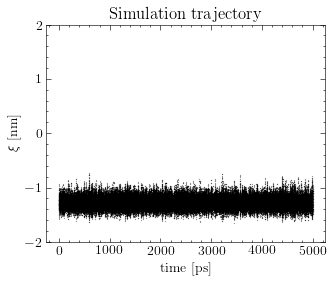

In [6]:
os.chdir(path +  "/simple_simulation")

#plot trajectory
data = plumed.read_as_pandas("position")
time = data["time"]
position = data["p.x"]

plt.scatter(time, position, color="black",marker=".", s=0.1)
plt.ylim(-2,2)
plt.xlabel("time [ps]")
plt.ylabel(r"$\xi$ [nm]")
plt.title("Simulation trajectory")

From the trajectory above, it can be seen that the value of $\xi$ fluctuates between roughly $-1.4$ and $-1.0$. Next, the histogram and the free energy surface is plotted.

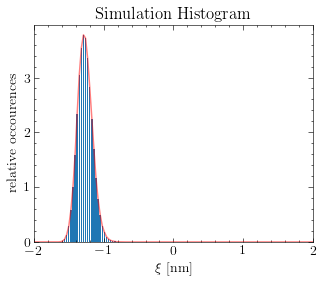

In [7]:
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/simple_simulation")

#load histogram data
data = plumed.read_as_pandas("histo")  
histogram = data["hh"]
position = data["p.x"]

#plot the histogram
plt.bar(position, histogram, width=0.02, align="center", label="Histogram")
plt.plot(position, histogram, color="red", alpha=0.5, label="Probability density")
plt.xlim(-2,2)
plt.xlabel(r"$\xi$ [nm]")
plt.ylabel("relative occourences")
plt.title("Simulation Histogram")
plt.show()
#The lines are very fine. Depending of your display, you might have to make the picture bigger.

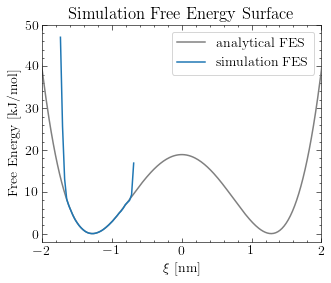

In [8]:
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/simple_simulation")

#plot analytical fes
x = np.linspace(-3,3,400)
y = 7*x**4-23*x**2
y = y - np.min(y)
plt.plot(x, y, color="grey", label="analytical FES")

#load free energy surface data
data = plumed.read_as_pandas("fes.dat")
fes = data["fes"]
fes = fes - min(fes)
position = data["p.x"]

#plot free energy surface
plt.plot(position, fes, label="simulation FES")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Simulation Free Energy Surface")
plt.show()

From the historgram, it can be interpreted that the simulation mainly visited the same CV value. 
The FES is correct for the range $-1.7$ to $-0.7$, but not available for the rest of the CV-range.

Next, a metadynamics simulation is conducted to enhance sampling and overcome the energy barrier.

# Metadynamic Simulation

In a Metadynamics simulation, a repulsive bias is deposited in areas that are freqently sampled, so that new areas are explored and the energy barrier can be overcome.

In the plumed.dat file, following lines have to be added to make it a metadynamics simulations:

METAD ARG=p.x PACE=100 SIGMA=0.1 HEIGHT=0.1 GRID_MIN=-3 GRID_MAX=3 GRID_BIN=300 TEMP=120 CALC_RCT

bias: REWEIGHT_METAD TEMP=120

In [11]:
#length of simulation
length=1000000

#Make new folder for the metadynamics simulation
os.chdir(path)
try: os.mkdir("MetaD_simulation")
except: print("folder \"MetaD_simulation\" already exists")
os.chdir("MetaD_simulation")

folder "MetaD_simulation" already exists


In [12]:
#Prepare the input files
#The plumed.dat file:
with open("plumed.dat","w") as f:
    print("""#Define system as distance between two atoms
p: DISTANCE ATOMS=1,2 COMPONENTS
#Define Force field
ff: MATHEVAL ARG=p.x PERIODIC=NO FUNC=(7*x^4-23*x^2)
bb: BIASVALUE ARG=ff
#Define Histroy dependet bias potentail (baisfactor very large so that height stays constant)
METAD ARG=p.x PACE=100 SIGMA=0.1 HEIGHT=0.1 GRID_MIN=-3 GRID_MAX=3 GRID_BIN=300 TEMP=120 CALC_RCT
#Reweight Bias
bias: REWEIGHT_METAD TEMP=120
#Make Histogram
hh: HISTOGRAM ARG=p.x GRID_MIN=-3 GRID_MAX=3 GRID_BIN=200 BANDWIDTH=0.01 LOGWEIGHTS=bias
#Convert Histogram to FES
fes: CONVERT_TO_FES GRID=hh TEMP=120
#Save Histogram and FES at the end. Save position every 10 time-steps    
DUMPGRID GRID=hh FILE=histo STRIDE={}
DUMPGRID GRID=fes FILE=fes.dat STRIDE={}
PRINT FILE=position ARG=p.x STRIDE=10
""".format(length,length),file=f)
        
#The input file:
with open("input","w") as f:
    print("""temperature 1
tstep 0.005
friction 1
dimension 1
nstep {}
ipos -1.0
periodic false""".format(length),file=f)
    
#Start Meta Dynamic simulation
!plumed pesmd < input    

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodi

Doing step 6120
Doing step 6140
Doing step 6160
Doing step 6180
Doing step 6200
Doing step 6220
Doing step 6240
Doing step 6260
Doing step 6280
Doing step 6300
Doing step 6320
Doing step 6340
Doing step 6360
Doing step 6380
Doing step 6400
Doing step 6420
Doing step 6440
Doing step 6460
Doing step 6480
Doing step 6500
Doing step 6520
Doing step 6540
Doing step 6560
Doing step 6580
Doing step 6600
Doing step 6620
Doing step 6640
Doing step 6660
Doing step 6680
Doing step 6700
Doing step 6720
Doing step 6740
Doing step 6760
Doing step 6780
Doing step 6800
Doing step 6820
Doing step 6840
Doing step 6860
Doing step 6880
Doing step 6900
Doing step 6920
Doing step 6940
Doing step 6960
Doing step 6980
Doing step 7000
Doing step 7020
Doing step 7040
Doing step 7060
Doing step 7080
Doing step 7100
Doing step 7120
Doing step 7140
Doing step 7160
Doing step 7180
Doing step 7200
Doing step 7220
Doing step 7240
Doing step 7260
Doing step 7280
Doing step 7300
Doing step 7320
Doing step 7340
Doing st

Doing step 16780
Doing step 16800
Doing step 16820
Doing step 16840
Doing step 16860
Doing step 16880
Doing step 16900
Doing step 16920
Doing step 16940
Doing step 16960
Doing step 16980
Doing step 17000
Doing step 17020
Doing step 17040
Doing step 17060
Doing step 17080
Doing step 17100
Doing step 17120
Doing step 17140
Doing step 17160
Doing step 17180
Doing step 17200
Doing step 17220
Doing step 17240
Doing step 17260
Doing step 17280
Doing step 17300
Doing step 17320
Doing step 17340
Doing step 17360
Doing step 17380
Doing step 17400
Doing step 17420
Doing step 17440
Doing step 17460
Doing step 17480
Doing step 17500
Doing step 17520
Doing step 17540
Doing step 17560
Doing step 17580
Doing step 17600
Doing step 17620
Doing step 17640
Doing step 17660
Doing step 17680
Doing step 17700
Doing step 17720
Doing step 17740
Doing step 17760
Doing step 17780
Doing step 17800
Doing step 17820
Doing step 17840
Doing step 17860
Doing step 17880
Doing step 17900
Doing step 17920
Doing step 179

Doing step 26920
Doing step 26940
Doing step 26960
Doing step 26980
Doing step 27000
Doing step 27020
Doing step 27040
Doing step 27060
Doing step 27080
Doing step 27100
Doing step 27120
Doing step 27140
Doing step 27160
Doing step 27180
Doing step 27200
Doing step 27220
Doing step 27240
Doing step 27260
Doing step 27280
Doing step 27300
Doing step 27320
Doing step 27340
Doing step 27360
Doing step 27380
Doing step 27400
Doing step 27420
Doing step 27440
Doing step 27460
Doing step 27480
Doing step 27500
Doing step 27520
Doing step 27540
Doing step 27560
Doing step 27580
Doing step 27600
Doing step 27620
Doing step 27640
Doing step 27660
Doing step 27680
Doing step 27700
Doing step 27720
Doing step 27740
Doing step 27760
Doing step 27780
Doing step 27800
Doing step 27820
Doing step 27840
Doing step 27860
Doing step 27880
Doing step 27900
Doing step 27920
Doing step 27940
Doing step 27960
Doing step 27980
Doing step 28000
Doing step 28020
Doing step 28040
Doing step 28060
Doing step 280

Doing step 37500
Doing step 37520
Doing step 37540
Doing step 37560
Doing step 37580
Doing step 37600
Doing step 37620
Doing step 37640
Doing step 37660
Doing step 37680
Doing step 37700
Doing step 37720
Doing step 37740
Doing step 37760
Doing step 37780
Doing step 37800
Doing step 37820
Doing step 37840
Doing step 37860
Doing step 37880
Doing step 37900
Doing step 37920
Doing step 37940
Doing step 37960
Doing step 37980
Doing step 38000
Doing step 38020
Doing step 38040
Doing step 38060
Doing step 38080
Doing step 38100
Doing step 38120
Doing step 38140
Doing step 38160
Doing step 38180
Doing step 38200
Doing step 38220
Doing step 38240
Doing step 38260
Doing step 38280
Doing step 38300
Doing step 38320
Doing step 38340
Doing step 38360
Doing step 38380
Doing step 38400
Doing step 38420
Doing step 38440
Doing step 38460
Doing step 38480
Doing step 38500
Doing step 38520
Doing step 38540
Doing step 38560
Doing step 38580
Doing step 38600
Doing step 38620
Doing step 38640
Doing step 386

Doing step 48280
Doing step 48300
Doing step 48320
Doing step 48340
Doing step 48360
Doing step 48380
Doing step 48400
Doing step 48420
Doing step 48440
Doing step 48460
Doing step 48480
Doing step 48500
Doing step 48520
Doing step 48540
Doing step 48560
Doing step 48580
Doing step 48600
Doing step 48620
Doing step 48640
Doing step 48660
Doing step 48680
Doing step 48700
Doing step 48720
Doing step 48740
Doing step 48760
Doing step 48780
Doing step 48800
Doing step 48820
Doing step 48840
Doing step 48860
Doing step 48880
Doing step 48900
Doing step 48920
Doing step 48940
Doing step 48960
Doing step 48980
Doing step 49000
Doing step 49020
Doing step 49040
Doing step 49060
Doing step 49080
Doing step 49100
Doing step 49120
Doing step 49140
Doing step 49160
Doing step 49180
Doing step 49200
Doing step 49220
Doing step 49240
Doing step 49260
Doing step 49280
Doing step 49300
Doing step 49320
Doing step 49340
Doing step 49360
Doing step 49380
Doing step 49400
Doing step 49420
Doing step 494

Doing step 58660
Doing step 58680
Doing step 58700
Doing step 58720
Doing step 58740
Doing step 58760
Doing step 58780
Doing step 58800
Doing step 58820
Doing step 58840
Doing step 58860
Doing step 58880
Doing step 58900
Doing step 58920
Doing step 58940
Doing step 58960
Doing step 58980
Doing step 59000
Doing step 59020
Doing step 59040
Doing step 59060
Doing step 59080
Doing step 59100
Doing step 59120
Doing step 59140
Doing step 59160
Doing step 59180
Doing step 59200
Doing step 59220
Doing step 59240
Doing step 59260
Doing step 59280
Doing step 59300
Doing step 59320
Doing step 59340
Doing step 59360
Doing step 59380
Doing step 59400
Doing step 59420
Doing step 59440
Doing step 59460
Doing step 59480
Doing step 59500
Doing step 59520
Doing step 59540
Doing step 59560
Doing step 59580
Doing step 59600
Doing step 59620
Doing step 59640
Doing step 59660
Doing step 59680
Doing step 59700
Doing step 59720
Doing step 59740
Doing step 59760
Doing step 59780
Doing step 59800
Doing step 598

Doing step 78420
Doing step 78440
Doing step 78460
Doing step 78480
Doing step 78500
Doing step 78520
Doing step 78540
Doing step 78560
Doing step 78580
Doing step 78600
Doing step 78620
Doing step 78640
Doing step 78660
Doing step 78680
Doing step 78700
Doing step 78720
Doing step 78740
Doing step 78760
Doing step 78780
Doing step 78800
Doing step 78820
Doing step 78840
Doing step 78860
Doing step 78880
Doing step 78900
Doing step 78920
Doing step 78940
Doing step 78960
Doing step 78980
Doing step 79000
Doing step 79020
Doing step 79040
Doing step 79060
Doing step 79080
Doing step 79100
Doing step 79120
Doing step 79140
Doing step 79160
Doing step 79180
Doing step 79200
Doing step 79220
Doing step 79240
Doing step 79260
Doing step 79280
Doing step 79300
Doing step 79320
Doing step 79340
Doing step 79360
Doing step 79380
Doing step 79400
Doing step 79420
Doing step 79440
Doing step 79460
Doing step 79480
Doing step 79500
Doing step 79520
Doing step 79540
Doing step 79560
Doing step 795

Doing step 88740
Doing step 88760
Doing step 88780
Doing step 88800
Doing step 88820
Doing step 88840
Doing step 88860
Doing step 88880
Doing step 88900
Doing step 88920
Doing step 88940
Doing step 88960
Doing step 88980
Doing step 89000
Doing step 89020
Doing step 89040
Doing step 89060
Doing step 89080
Doing step 89100
Doing step 89120
Doing step 89140
Doing step 89160
Doing step 89180
Doing step 89200
Doing step 89220
Doing step 89240
Doing step 89260
Doing step 89280
Doing step 89300
Doing step 89320
Doing step 89340
Doing step 89360
Doing step 89380
Doing step 89400
Doing step 89420
Doing step 89440
Doing step 89460
Doing step 89480
Doing step 89500
Doing step 89520
Doing step 89540
Doing step 89560
Doing step 89580
Doing step 89600
Doing step 89620
Doing step 89640
Doing step 89660
Doing step 89680
Doing step 89700
Doing step 89720
Doing step 89740
Doing step 89760
Doing step 89780
Doing step 89800
Doing step 89820
Doing step 89840
Doing step 89860
Doing step 89880
Doing step 899

Doing step 99880
Doing step 99900
Doing step 99920
Doing step 99940
Doing step 99960
Doing step 99980
Doing step 100000
Doing step 100020
Doing step 100040
Doing step 100060
Doing step 100080
Doing step 100100
Doing step 100120
Doing step 100140
Doing step 100160
Doing step 100180
Doing step 100200
Doing step 100220
Doing step 100240
Doing step 100260
Doing step 100280
Doing step 100300
Doing step 100320
Doing step 100340
Doing step 100360
Doing step 100380
Doing step 100400
Doing step 100420
Doing step 100440
Doing step 100460
Doing step 100480
Doing step 100500
Doing step 100520
Doing step 100540
Doing step 100560
Doing step 100580
Doing step 100600
Doing step 100620
Doing step 100640
Doing step 100660
Doing step 100680
Doing step 100700
Doing step 100720
Doing step 100740
Doing step 100760
Doing step 100780
Doing step 100800
Doing step 100820
Doing step 100840
Doing step 100860
Doing step 100880
Doing step 100900
Doing step 100920
Doing step 100940
Doing step 100960
Doing step 10098

Doing step 109780
Doing step 109800
Doing step 109820
Doing step 109840
Doing step 109860
Doing step 109880
Doing step 109900
Doing step 109920
Doing step 109940
Doing step 109960
Doing step 109980
Doing step 110000
Doing step 110020
Doing step 110040
Doing step 110060
Doing step 110080
Doing step 110100
Doing step 110120
Doing step 110140
Doing step 110160
Doing step 110180
Doing step 110200
Doing step 110220
Doing step 110240
Doing step 110260
Doing step 110280
Doing step 110300
Doing step 110320
Doing step 110340
Doing step 110360
Doing step 110380
Doing step 110400
Doing step 110420
Doing step 110440
Doing step 110460
Doing step 110480
Doing step 110500
Doing step 110520
Doing step 110540
Doing step 110560
Doing step 110580
Doing step 110600
Doing step 110620
Doing step 110640
Doing step 110660
Doing step 110680
Doing step 110700
Doing step 110720
Doing step 110740
Doing step 110760
Doing step 110780
Doing step 110800
Doing step 110820
Doing step 110840
Doing step 110860
Doing step

Doing step 119960
Doing step 119980
Doing step 120000
Doing step 120020
Doing step 120040
Doing step 120060
Doing step 120080
Doing step 120100
Doing step 120120
Doing step 120140
Doing step 120160
Doing step 120180
Doing step 120200
Doing step 120220
Doing step 120240
Doing step 120260
Doing step 120280
Doing step 120300
Doing step 120320
Doing step 120340
Doing step 120360
Doing step 120380
Doing step 120400
Doing step 120420
Doing step 120440
Doing step 120460
Doing step 120480
Doing step 120500
Doing step 120520
Doing step 120540
Doing step 120560
Doing step 120580
Doing step 120600
Doing step 120620
Doing step 120640
Doing step 120660
Doing step 120680
Doing step 120700
Doing step 120720
Doing step 120740
Doing step 120760
Doing step 120780
Doing step 120800
Doing step 120820
Doing step 120840
Doing step 120860
Doing step 120880
Doing step 120900
Doing step 120920
Doing step 120940
Doing step 120960
Doing step 120980
Doing step 121000
Doing step 121020
Doing step 121040
Doing step

Doing step 130460
Doing step 130480
Doing step 130500
Doing step 130520
Doing step 130540
Doing step 130560
Doing step 130580
Doing step 130600
Doing step 130620
Doing step 130640
Doing step 130660
Doing step 130680
Doing step 130700
Doing step 130720
Doing step 130740
Doing step 130760
Doing step 130780
Doing step 130800
Doing step 130820
Doing step 130840
Doing step 130860
Doing step 130880
Doing step 130900
Doing step 130920
Doing step 130940
Doing step 130960
Doing step 130980
Doing step 131000
Doing step 131020
Doing step 131040
Doing step 131060
Doing step 131080
Doing step 131100
Doing step 131120
Doing step 131140
Doing step 131160
Doing step 131180
Doing step 131200
Doing step 131220
Doing step 131240
Doing step 131260
Doing step 131280
Doing step 131300
Doing step 131320
Doing step 131340
Doing step 131360
Doing step 131380
Doing step 131400
Doing step 131420
Doing step 131440
Doing step 131460
Doing step 131480
Doing step 131500
Doing step 131520
Doing step 131540
Doing step

Doing step 141060
Doing step 141080
Doing step 141100
Doing step 141120
Doing step 141140
Doing step 141160
Doing step 141180
Doing step 141200
Doing step 141220
Doing step 141240
Doing step 141260
Doing step 141280
Doing step 141300
Doing step 141320
Doing step 141340
Doing step 141360
Doing step 141380
Doing step 141400
Doing step 141420
Doing step 141440
Doing step 141460
Doing step 141480
Doing step 141500
Doing step 141520
Doing step 141540
Doing step 141560
Doing step 141580
Doing step 141600
Doing step 141620
Doing step 141640
Doing step 141660
Doing step 141680
Doing step 141700
Doing step 141720
Doing step 141740
Doing step 141760
Doing step 141780
Doing step 141800
Doing step 141820
Doing step 141840
Doing step 141860
Doing step 141880
Doing step 141900
Doing step 141920
Doing step 141940
Doing step 141960
Doing step 141980
Doing step 142000
Doing step 142020
Doing step 142040
Doing step 142060
Doing step 142080
Doing step 142100
Doing step 142120
Doing step 142140
Doing step

Doing step 151360
Doing step 151380
Doing step 151400
Doing step 151420
Doing step 151440
Doing step 151460
Doing step 151480
Doing step 151500
Doing step 151520
Doing step 151540
Doing step 151560
Doing step 151580
Doing step 151600
Doing step 151620
Doing step 151640
Doing step 151660
Doing step 151680
Doing step 151700
Doing step 151720
Doing step 151740
Doing step 151760
Doing step 151780
Doing step 151800
Doing step 151820
Doing step 151840
Doing step 151860
Doing step 151880
Doing step 151900
Doing step 151920
Doing step 151940
Doing step 151960
Doing step 151980
Doing step 152000
Doing step 152020
Doing step 152040
Doing step 152060
Doing step 152080
Doing step 152100
Doing step 152120
Doing step 152140
Doing step 152160
Doing step 152180
Doing step 152200
Doing step 152220
Doing step 152240
Doing step 152260
Doing step 152280
Doing step 152300
Doing step 152320
Doing step 152340
Doing step 152360
Doing step 152380
Doing step 152400
Doing step 152420
Doing step 152440
Doing step

Doing step 161060
Doing step 161080
Doing step 161100
Doing step 161120
Doing step 161140
Doing step 161160
Doing step 161180
Doing step 161200
Doing step 161220
Doing step 161240
Doing step 161260
Doing step 161280
Doing step 161300
Doing step 161320
Doing step 161340
Doing step 161360
Doing step 161380
Doing step 161400
Doing step 161420
Doing step 161440
Doing step 161460
Doing step 161480
Doing step 161500
Doing step 161520
Doing step 161540
Doing step 161560
Doing step 161580
Doing step 161600
Doing step 161620
Doing step 161640
Doing step 161660
Doing step 161680
Doing step 161700
Doing step 161720
Doing step 161740
Doing step 161760
Doing step 161780
Doing step 161800
Doing step 161820
Doing step 161840
Doing step 161860
Doing step 161880
Doing step 161900
Doing step 161920
Doing step 161940
Doing step 161960
Doing step 161980
Doing step 162000
Doing step 162020
Doing step 162040
Doing step 162060
Doing step 162080
Doing step 162100
Doing step 162120
Doing step 162140
Doing step

Doing step 171000
Doing step 171020
Doing step 171040
Doing step 171060
Doing step 171080
Doing step 171100
Doing step 171120
Doing step 171140
Doing step 171160
Doing step 171180
Doing step 171200
Doing step 171220
Doing step 171240
Doing step 171260
Doing step 171280
Doing step 171300
Doing step 171320
Doing step 171340
Doing step 171360
Doing step 171380
Doing step 171400
Doing step 171420
Doing step 171440
Doing step 171460
Doing step 171480
Doing step 171500
Doing step 171520
Doing step 171540
Doing step 171560
Doing step 171580
Doing step 171600
Doing step 171620
Doing step 171640
Doing step 171660
Doing step 171680
Doing step 171700
Doing step 171720
Doing step 171740
Doing step 171760
Doing step 171780
Doing step 171800
Doing step 171820
Doing step 171840
Doing step 171860
Doing step 171880
Doing step 171900
Doing step 171920
Doing step 171940
Doing step 171960
Doing step 171980
Doing step 172000
Doing step 172020
Doing step 172040
Doing step 172060
Doing step 172080
Doing step

Doing step 184840
Doing step 184860
Doing step 184880
Doing step 184900
Doing step 184920
Doing step 184940
Doing step 184960
Doing step 184980
Doing step 185000
Doing step 185020
Doing step 185040
Doing step 185060
Doing step 185080
Doing step 185100
Doing step 185120
Doing step 185140
Doing step 185160
Doing step 185180
Doing step 185200
Doing step 185220
Doing step 185240
Doing step 185260
Doing step 185280
Doing step 185300
Doing step 185320
Doing step 185340
Doing step 185360
Doing step 185380
Doing step 185400
Doing step 185420
Doing step 185440
Doing step 185460
Doing step 185480
Doing step 185500
Doing step 185520
Doing step 185540
Doing step 185560
Doing step 185580
Doing step 185600
Doing step 185620
Doing step 185640
Doing step 185660
Doing step 185680
Doing step 185700
Doing step 185720
Doing step 185740
Doing step 185760
Doing step 185780
Doing step 185800
Doing step 185820
Doing step 185840
Doing step 185860
Doing step 185880
Doing step 185900
Doing step 185920
Doing step

Doing step 195500
Doing step 195520
Doing step 195540
Doing step 195560
Doing step 195580
Doing step 195600
Doing step 195620
Doing step 195640
Doing step 195660
Doing step 195680
Doing step 195700
Doing step 195720
Doing step 195740
Doing step 195760
Doing step 195780
Doing step 195800
Doing step 195820
Doing step 195840
Doing step 195860
Doing step 195880
Doing step 195900
Doing step 195920
Doing step 195940
Doing step 195960
Doing step 195980
Doing step 196000
Doing step 196020
Doing step 196040
Doing step 196060
Doing step 196080
Doing step 196100
Doing step 196120
Doing step 196140
Doing step 196160
Doing step 196180
Doing step 196200
Doing step 196220
Doing step 196240
Doing step 196260
Doing step 196280
Doing step 196300
Doing step 196320
Doing step 196340
Doing step 196360
Doing step 196380
Doing step 196400
Doing step 196420
Doing step 196440
Doing step 196460
Doing step 196480
Doing step 196500
Doing step 196520
Doing step 196540
Doing step 196560
Doing step 196580
Doing step

Doing step 205400
Doing step 205420
Doing step 205440
Doing step 205460
Doing step 205480
Doing step 205500
Doing step 205520
Doing step 205540
Doing step 205560
Doing step 205580
Doing step 205600
Doing step 205620
Doing step 205640
Doing step 205660
Doing step 205680
Doing step 205700
Doing step 205720
Doing step 205740
Doing step 205760
Doing step 205780
Doing step 205800
Doing step 205820
Doing step 205840
Doing step 205860
Doing step 205880
Doing step 205900
Doing step 205920
Doing step 205940
Doing step 205960
Doing step 205980
Doing step 206000
Doing step 206020
Doing step 206040
Doing step 206060
Doing step 206080
Doing step 206100
Doing step 206120
Doing step 206140
Doing step 206160
Doing step 206180
Doing step 206200
Doing step 206220
Doing step 206240
Doing step 206260
Doing step 206280
Doing step 206300
Doing step 206320
Doing step 206340
Doing step 206360
Doing step 206380
Doing step 206400
Doing step 206420
Doing step 206440
Doing step 206460
Doing step 206480
Doing step

Doing step 215780
Doing step 215800
Doing step 215820
Doing step 215840
Doing step 215860
Doing step 215880
Doing step 215900
Doing step 215920
Doing step 215940
Doing step 215960
Doing step 215980
Doing step 216000
Doing step 216020
Doing step 216040
Doing step 216060
Doing step 216080
Doing step 216100
Doing step 216120
Doing step 216140
Doing step 216160
Doing step 216180
Doing step 216200
Doing step 216220
Doing step 216240
Doing step 216260
Doing step 216280
Doing step 216300
Doing step 216320
Doing step 216340
Doing step 216360
Doing step 216380
Doing step 216400
Doing step 216420
Doing step 216440
Doing step 216460
Doing step 216480
Doing step 216500
Doing step 216520
Doing step 216540
Doing step 216560
Doing step 216580
Doing step 216600
Doing step 216620
Doing step 216640
Doing step 216660
Doing step 216680
Doing step 216700
Doing step 216720
Doing step 216740
Doing step 216760
Doing step 216780
Doing step 216800
Doing step 216820
Doing step 216840
Doing step 216860
Doing step

Doing step 226320
Doing step 226340
Doing step 226360
Doing step 226380
Doing step 226400
Doing step 226420
Doing step 226440
Doing step 226460
Doing step 226480
Doing step 226500
Doing step 226520
Doing step 226540
Doing step 226560
Doing step 226580
Doing step 226600
Doing step 226620
Doing step 226640
Doing step 226660
Doing step 226680
Doing step 226700
Doing step 226720
Doing step 226740
Doing step 226760
Doing step 226780
Doing step 226800
Doing step 226820
Doing step 226840
Doing step 226860
Doing step 226880
Doing step 226900
Doing step 226920
Doing step 226940
Doing step 226960
Doing step 226980
Doing step 227000
Doing step 227020
Doing step 227040
Doing step 227060
Doing step 227080
Doing step 227100
Doing step 227120
Doing step 227140
Doing step 227160
Doing step 227180
Doing step 227200
Doing step 227220
Doing step 227240
Doing step 227260
Doing step 227280
Doing step 227300
Doing step 227320
Doing step 227340
Doing step 227360
Doing step 227380
Doing step 227400
Doing step

Doing step 236360
Doing step 236380
Doing step 236400
Doing step 236420
Doing step 236440
Doing step 236460
Doing step 236480
Doing step 236500
Doing step 236520
Doing step 236540
Doing step 236560
Doing step 236580
Doing step 236600
Doing step 236620
Doing step 236640
Doing step 236660
Doing step 236680
Doing step 236700
Doing step 236720
Doing step 236740
Doing step 236760
Doing step 236780
Doing step 236800
Doing step 236820
Doing step 236840
Doing step 236860
Doing step 236880
Doing step 236900
Doing step 236920
Doing step 236940
Doing step 236960
Doing step 236980
Doing step 237000
Doing step 237020
Doing step 237040
Doing step 237060
Doing step 237080
Doing step 237100
Doing step 237120
Doing step 237140
Doing step 237160
Doing step 237180
Doing step 237200
Doing step 237220
Doing step 237240
Doing step 237260
Doing step 237280
Doing step 237300
Doing step 237320
Doing step 237340
Doing step 237360
Doing step 237380
Doing step 237400
Doing step 237420
Doing step 237440
Doing step

Doing step 245860
Doing step 245880
Doing step 245900
Doing step 245920
Doing step 245940
Doing step 245960
Doing step 245980
Doing step 246000
Doing step 246020
Doing step 246040
Doing step 246060
Doing step 246080
Doing step 246100
Doing step 246120
Doing step 246140
Doing step 246160
Doing step 246180
Doing step 246200
Doing step 246220
Doing step 246240
Doing step 246260
Doing step 246280
Doing step 246300
Doing step 246320
Doing step 246340
Doing step 246360
Doing step 246380
Doing step 246400
Doing step 246420
Doing step 246440
Doing step 246460
Doing step 246480
Doing step 246500
Doing step 246520
Doing step 246540
Doing step 246560
Doing step 246580
Doing step 246600
Doing step 246620
Doing step 246640
Doing step 246660
Doing step 246680
Doing step 246700
Doing step 246720
Doing step 246740
Doing step 246760
Doing step 246780
Doing step 246800
Doing step 246820
Doing step 246840
Doing step 246860
Doing step 246880
Doing step 246900
Doing step 246920
Doing step 246940
Doing step

Doing step 255420
Doing step 255440
Doing step 255460
Doing step 255480
Doing step 255500
Doing step 255520
Doing step 255540
Doing step 255560
Doing step 255580
Doing step 255600
Doing step 255620
Doing step 255640
Doing step 255660
Doing step 255680
Doing step 255700
Doing step 255720
Doing step 255740
Doing step 255760
Doing step 255780
Doing step 255800
Doing step 255820
Doing step 255840
Doing step 255860
Doing step 255880
Doing step 255900
Doing step 255920
Doing step 255940
Doing step 255960
Doing step 255980
Doing step 256000
Doing step 256020
Doing step 256040
Doing step 256060
Doing step 256080
Doing step 256100
Doing step 256120
Doing step 256140
Doing step 256160
Doing step 256180
Doing step 256200
Doing step 256220
Doing step 256240
Doing step 256260
Doing step 256280
Doing step 256300
Doing step 256320
Doing step 256340
Doing step 256360
Doing step 256380
Doing step 256400
Doing step 256420
Doing step 256440
Doing step 256460
Doing step 256480
Doing step 256500
Doing step

Doing step 265140
Doing step 265160
Doing step 265180
Doing step 265200
Doing step 265220
Doing step 265240
Doing step 265260
Doing step 265280
Doing step 265300
Doing step 265320
Doing step 265340
Doing step 265360
Doing step 265380
Doing step 265400
Doing step 265420
Doing step 265440
Doing step 265460
Doing step 265480
Doing step 265500
Doing step 265520
Doing step 265540
Doing step 265560
Doing step 265580
Doing step 265600
Doing step 265620
Doing step 265640
Doing step 265660
Doing step 265680
Doing step 265700
Doing step 265720
Doing step 265740
Doing step 265760
Doing step 265780
Doing step 265800
Doing step 265820
Doing step 265840
Doing step 265860
Doing step 265880
Doing step 265900
Doing step 265920
Doing step 265940
Doing step 265960
Doing step 265980
Doing step 266000
Doing step 266020
Doing step 266040
Doing step 266060
Doing step 266080
Doing step 266100
Doing step 266120
Doing step 266140
Doing step 266160
Doing step 266180
Doing step 266200
Doing step 266220
Doing step

Doing step 274840
Doing step 274860
Doing step 274880
Doing step 274900
Doing step 274920
Doing step 274940
Doing step 274960
Doing step 274980
Doing step 275000
Doing step 275020
Doing step 275040
Doing step 275060
Doing step 275080
Doing step 275100
Doing step 275120
Doing step 275140
Doing step 275160
Doing step 275180
Doing step 275200
Doing step 275220
Doing step 275240
Doing step 275260
Doing step 275280
Doing step 275300
Doing step 275320
Doing step 275340
Doing step 275360
Doing step 275380
Doing step 275400
Doing step 275420
Doing step 275440
Doing step 275460
Doing step 275480
Doing step 275500
Doing step 275520
Doing step 275540
Doing step 275560
Doing step 275580
Doing step 275600
Doing step 275620
Doing step 275640
Doing step 275660
Doing step 275680
Doing step 275700
Doing step 275720
Doing step 275740
Doing step 275760
Doing step 275780
Doing step 275800
Doing step 275820
Doing step 275840
Doing step 275860
Doing step 275880
Doing step 275900
Doing step 275920
Doing step

Doing step 284400
Doing step 284420
Doing step 284440
Doing step 284460
Doing step 284480
Doing step 284500
Doing step 284520
Doing step 284540
Doing step 284560
Doing step 284580
Doing step 284600
Doing step 284620
Doing step 284640
Doing step 284660
Doing step 284680
Doing step 284700
Doing step 284720
Doing step 284740
Doing step 284760
Doing step 284780
Doing step 284800
Doing step 284820
Doing step 284840
Doing step 284860
Doing step 284880
Doing step 284900
Doing step 284920
Doing step 284940
Doing step 284960
Doing step 284980
Doing step 285000
Doing step 285020
Doing step 285040
Doing step 285060
Doing step 285080
Doing step 285100
Doing step 285120
Doing step 285140
Doing step 285160
Doing step 285180
Doing step 285200
Doing step 285220
Doing step 285240
Doing step 285260
Doing step 285280
Doing step 285300
Doing step 285320
Doing step 285340
Doing step 285360
Doing step 285380
Doing step 285400
Doing step 285420
Doing step 285440
Doing step 285460
Doing step 285480
Doing step

Doing step 295180
Doing step 295200
Doing step 295220
Doing step 295240
Doing step 295260
Doing step 295280
Doing step 295300
Doing step 295320
Doing step 295340
Doing step 295360
Doing step 295380
Doing step 295400
Doing step 295420
Doing step 295440
Doing step 295460
Doing step 295480
Doing step 295500
Doing step 295520
Doing step 295540
Doing step 295560
Doing step 295580
Doing step 295600
Doing step 295620
Doing step 295640
Doing step 295660
Doing step 295680
Doing step 295700
Doing step 295720
Doing step 295740
Doing step 295760
Doing step 295780
Doing step 295800
Doing step 295820
Doing step 295840
Doing step 295860
Doing step 295880
Doing step 295900
Doing step 295920
Doing step 295940
Doing step 295960
Doing step 295980
Doing step 296000
Doing step 296020
Doing step 296040
Doing step 296060
Doing step 296080
Doing step 296100
Doing step 296120
Doing step 296140
Doing step 296160
Doing step 296180
Doing step 296200
Doing step 296220
Doing step 296240
Doing step 296260
Doing step

Doing step 305260
Doing step 305280
Doing step 305300
Doing step 305320
Doing step 305340
Doing step 305360
Doing step 305380
Doing step 305400
Doing step 305420
Doing step 305440
Doing step 305460
Doing step 305480
Doing step 305500
Doing step 305520
Doing step 305540
Doing step 305560
Doing step 305580
Doing step 305600
Doing step 305620
Doing step 305640
Doing step 305660
Doing step 305680
Doing step 305700
Doing step 305720
Doing step 305740
Doing step 305760
Doing step 305780
Doing step 305800
Doing step 305820
Doing step 305840
Doing step 305860
Doing step 305880
Doing step 305900
Doing step 305920
Doing step 305940
Doing step 305960
Doing step 305980
Doing step 306000
Doing step 306020
Doing step 306040
Doing step 306060
Doing step 306080
Doing step 306100
Doing step 306120
Doing step 306140
Doing step 306160
Doing step 306180
Doing step 306200
Doing step 306220
Doing step 306240
Doing step 306260
Doing step 306280
Doing step 306300
Doing step 306320
Doing step 306340
Doing step

Doing step 315480
Doing step 315500
Doing step 315520
Doing step 315540
Doing step 315560
Doing step 315580
Doing step 315600
Doing step 315620
Doing step 315640
Doing step 315660
Doing step 315680
Doing step 315700
Doing step 315720
Doing step 315740
Doing step 315760
Doing step 315780
Doing step 315800
Doing step 315820
Doing step 315840
Doing step 315860
Doing step 315880
Doing step 315900
Doing step 315920
Doing step 315940
Doing step 315960
Doing step 315980
Doing step 316000
Doing step 316020
Doing step 316040
Doing step 316060
Doing step 316080
Doing step 316100
Doing step 316120
Doing step 316140
Doing step 316160
Doing step 316180
Doing step 316200
Doing step 316220
Doing step 316240
Doing step 316260
Doing step 316280
Doing step 316300
Doing step 316320
Doing step 316340
Doing step 316360
Doing step 316380
Doing step 316400
Doing step 316420
Doing step 316440
Doing step 316460
Doing step 316480
Doing step 316500
Doing step 316520
Doing step 316540
Doing step 316560
Doing step

Doing step 325840
Doing step 325860
Doing step 325880
Doing step 325900
Doing step 325920
Doing step 325940
Doing step 325960
Doing step 325980
Doing step 326000
Doing step 326020
Doing step 326040
Doing step 326060
Doing step 326080
Doing step 326100
Doing step 326120
Doing step 326140
Doing step 326160
Doing step 326180
Doing step 326200
Doing step 326220
Doing step 326240
Doing step 326260
Doing step 326280
Doing step 326300
Doing step 326320
Doing step 326340
Doing step 326360
Doing step 326380
Doing step 326400
Doing step 326420
Doing step 326440
Doing step 326460
Doing step 326480
Doing step 326500
Doing step 326520
Doing step 326540
Doing step 326560
Doing step 326580
Doing step 326600
Doing step 326620
Doing step 326640
Doing step 326660
Doing step 326680
Doing step 326700
Doing step 326720
Doing step 326740
Doing step 326760
Doing step 326780
Doing step 326800
Doing step 326820
Doing step 326840
Doing step 326860
Doing step 326880
Doing step 326900
Doing step 326920
Doing step

Doing step 336300
Doing step 336320
Doing step 336340
Doing step 336360
Doing step 336380
Doing step 336400
Doing step 336420
Doing step 336440
Doing step 336460
Doing step 336480
Doing step 336500
Doing step 336520
Doing step 336540
Doing step 336560
Doing step 336580
Doing step 336600
Doing step 336620
Doing step 336640
Doing step 336660
Doing step 336680
Doing step 336700
Doing step 336720
Doing step 336740
Doing step 336760
Doing step 336780
Doing step 336800
Doing step 336820
Doing step 336840
Doing step 336860
Doing step 336880
Doing step 336900
Doing step 336920
Doing step 336940
Doing step 336960
Doing step 336980
Doing step 337000
Doing step 337020
Doing step 337040
Doing step 337060
Doing step 337080
Doing step 337100
Doing step 337120
Doing step 337140
Doing step 337160
Doing step 337180
Doing step 337200
Doing step 337220
Doing step 337240
Doing step 337260
Doing step 337280
Doing step 337300
Doing step 337320
Doing step 337340
Doing step 337360
Doing step 337380
Doing step

Doing step 345420
Doing step 345440
Doing step 345460
Doing step 345480
Doing step 345500
Doing step 345520
Doing step 345540
Doing step 345560
Doing step 345580
Doing step 345600
Doing step 345620
Doing step 345640
Doing step 345660
Doing step 345680
Doing step 345700
Doing step 345720
Doing step 345740
Doing step 345760
Doing step 345780
Doing step 345800
Doing step 345820
Doing step 345840
Doing step 345860
Doing step 345880
Doing step 345900
Doing step 345920
Doing step 345940
Doing step 345960
Doing step 345980
Doing step 346000
Doing step 346020
Doing step 346040
Doing step 346060
Doing step 346080
Doing step 346100
Doing step 346120
Doing step 346140
Doing step 346160
Doing step 346180
Doing step 346200
Doing step 346220
Doing step 346240
Doing step 346260
Doing step 346280
Doing step 346300
Doing step 346320
Doing step 346340
Doing step 346360
Doing step 346380
Doing step 346400
Doing step 346420
Doing step 346440
Doing step 346460
Doing step 346480
Doing step 346500
Doing step

Doing step 355020
Doing step 355040
Doing step 355060
Doing step 355080
Doing step 355100
Doing step 355120
Doing step 355140
Doing step 355160
Doing step 355180
Doing step 355200
Doing step 355220
Doing step 355240
Doing step 355260
Doing step 355280
Doing step 355300
Doing step 355320
Doing step 355340
Doing step 355360
Doing step 355380
Doing step 355400
Doing step 355420
Doing step 355440
Doing step 355460
Doing step 355480
Doing step 355500
Doing step 355520
Doing step 355540
Doing step 355560
Doing step 355580
Doing step 355600
Doing step 355620
Doing step 355640
Doing step 355660
Doing step 355680
Doing step 355700
Doing step 355720
Doing step 355740
Doing step 355760
Doing step 355780
Doing step 355800
Doing step 355820
Doing step 355840
Doing step 355860
Doing step 355880
Doing step 355900
Doing step 355920
Doing step 355940
Doing step 355960
Doing step 355980
Doing step 356000
Doing step 356020
Doing step 356040
Doing step 356060
Doing step 356080
Doing step 356100
Doing step

Doing step 365360
Doing step 365380
Doing step 365400
Doing step 365420
Doing step 365440
Doing step 365460
Doing step 365480
Doing step 365500
Doing step 365520
Doing step 365540
Doing step 365560
Doing step 365580
Doing step 365600
Doing step 365620
Doing step 365640
Doing step 365660
Doing step 365680
Doing step 365700
Doing step 365720
Doing step 365740
Doing step 365760
Doing step 365780
Doing step 365800
Doing step 365820
Doing step 365840
Doing step 365860
Doing step 365880
Doing step 365900
Doing step 365920
Doing step 365940
Doing step 365960
Doing step 365980
Doing step 366000
Doing step 366020
Doing step 366040
Doing step 366060
Doing step 366080
Doing step 366100
Doing step 366120
Doing step 366140
Doing step 366160
Doing step 366180
Doing step 366200
Doing step 366220
Doing step 366240
Doing step 366260
Doing step 366280
Doing step 366300
Doing step 366320
Doing step 366340
Doing step 366360
Doing step 366380
Doing step 366400
Doing step 366420
Doing step 366440
Doing step

Doing step 376200
Doing step 376220
Doing step 376240
Doing step 376260
Doing step 376280
Doing step 376300
Doing step 376320
Doing step 376340
Doing step 376360
Doing step 376380
Doing step 376400
Doing step 376420
Doing step 376440
Doing step 376460
Doing step 376480
Doing step 376500
Doing step 376520
Doing step 376540
Doing step 376560
Doing step 376580
Doing step 376600
Doing step 376620
Doing step 376640
Doing step 376660
Doing step 376680
Doing step 376700
Doing step 376720
Doing step 376740
Doing step 376760
Doing step 376780
Doing step 376800
Doing step 376820
Doing step 376840
Doing step 376860
Doing step 376880
Doing step 376900
Doing step 376920
Doing step 376940
Doing step 376960
Doing step 376980
Doing step 377000
Doing step 377020
Doing step 377040
Doing step 377060
Doing step 377080
Doing step 377100
Doing step 377120
Doing step 377140
Doing step 377160
Doing step 377180
Doing step 377200
Doing step 377220
Doing step 377240
Doing step 377260
Doing step 377280
Doing step

Doing step 386660
Doing step 386680
Doing step 386700
Doing step 386720
Doing step 386740
Doing step 386760
Doing step 386780
Doing step 386800
Doing step 386820
Doing step 386840
Doing step 386860
Doing step 386880
Doing step 386900
Doing step 386920
Doing step 386940
Doing step 386960
Doing step 386980
Doing step 387000
Doing step 387020
Doing step 387040
Doing step 387060
Doing step 387080
Doing step 387100
Doing step 387120
Doing step 387140
Doing step 387160
Doing step 387180
Doing step 387200
Doing step 387220
Doing step 387240
Doing step 387260
Doing step 387280
Doing step 387300
Doing step 387320
Doing step 387340
Doing step 387360
Doing step 387380
Doing step 387400
Doing step 387420
Doing step 387440
Doing step 387460
Doing step 387480
Doing step 387500
Doing step 387520
Doing step 387540
Doing step 387560
Doing step 387580
Doing step 387600
Doing step 387620
Doing step 387640
Doing step 387660
Doing step 387680
Doing step 387700
Doing step 387720
Doing step 387740
Doing step

Doing step 405220
Doing step 405240
Doing step 405260
Doing step 405280
Doing step 405300
Doing step 405320
Doing step 405340
Doing step 405360
Doing step 405380
Doing step 405400
Doing step 405420
Doing step 405440
Doing step 405460
Doing step 405480
Doing step 405500
Doing step 405520
Doing step 405540
Doing step 405560
Doing step 405580
Doing step 405600
Doing step 405620
Doing step 405640
Doing step 405660
Doing step 405680
Doing step 405700
Doing step 405720
Doing step 405740
Doing step 405760
Doing step 405780
Doing step 405800
Doing step 405820
Doing step 405840
Doing step 405860
Doing step 405880
Doing step 405900
Doing step 405920
Doing step 405940
Doing step 405960
Doing step 405980
Doing step 406000
Doing step 406020
Doing step 406040
Doing step 406060
Doing step 406080
Doing step 406100
Doing step 406120
Doing step 406140
Doing step 406160
Doing step 406180
Doing step 406200
Doing step 406220
Doing step 406240
Doing step 406260
Doing step 406280
Doing step 406300
Doing step

Doing step 415380
Doing step 415400
Doing step 415420
Doing step 415440
Doing step 415460
Doing step 415480
Doing step 415500
Doing step 415520
Doing step 415540
Doing step 415560
Doing step 415580
Doing step 415600
Doing step 415620
Doing step 415640
Doing step 415660
Doing step 415680
Doing step 415700
Doing step 415720
Doing step 415740
Doing step 415760
Doing step 415780
Doing step 415800
Doing step 415820
Doing step 415840
Doing step 415860
Doing step 415880
Doing step 415900
Doing step 415920
Doing step 415940
Doing step 415960
Doing step 415980
Doing step 416000
Doing step 416020
Doing step 416040
Doing step 416060
Doing step 416080
Doing step 416100
Doing step 416120
Doing step 416140
Doing step 416160
Doing step 416180
Doing step 416200
Doing step 416220
Doing step 416240
Doing step 416260
Doing step 416280
Doing step 416300
Doing step 416320
Doing step 416340
Doing step 416360
Doing step 416380
Doing step 416400
Doing step 416420
Doing step 416440
Doing step 416460
Doing step

Doing step 425600
Doing step 425620
Doing step 425640
Doing step 425660
Doing step 425680
Doing step 425700
Doing step 425720
Doing step 425740
Doing step 425760
Doing step 425780
Doing step 425800
Doing step 425820
Doing step 425840
Doing step 425860
Doing step 425880
Doing step 425900
Doing step 425920
Doing step 425940
Doing step 425960
Doing step 425980
Doing step 426000
Doing step 426020
Doing step 426040
Doing step 426060
Doing step 426080
Doing step 426100
Doing step 426120
Doing step 426140
Doing step 426160
Doing step 426180
Doing step 426200
Doing step 426220
Doing step 426240
Doing step 426260
Doing step 426280
Doing step 426300
Doing step 426320
Doing step 426340
Doing step 426360
Doing step 426380
Doing step 426400
Doing step 426420
Doing step 426440
Doing step 426460
Doing step 426480
Doing step 426500
Doing step 426520
Doing step 426540
Doing step 426560
Doing step 426580
Doing step 426600
Doing step 426620
Doing step 426640
Doing step 426660
Doing step 426680
Doing step

Doing step 434900
Doing step 434920
Doing step 434940
Doing step 434960
Doing step 434980
Doing step 435000
Doing step 435020
Doing step 435040
Doing step 435060
Doing step 435080
Doing step 435100
Doing step 435120
Doing step 435140
Doing step 435160
Doing step 435180
Doing step 435200
Doing step 435220
Doing step 435240
Doing step 435260
Doing step 435280
Doing step 435300
Doing step 435320
Doing step 435340
Doing step 435360
Doing step 435380
Doing step 435400
Doing step 435420
Doing step 435440
Doing step 435460
Doing step 435480
Doing step 435500
Doing step 435520
Doing step 435540
Doing step 435560
Doing step 435580
Doing step 435600
Doing step 435620
Doing step 435640
Doing step 435660
Doing step 435680
Doing step 435700
Doing step 435720
Doing step 435740
Doing step 435760
Doing step 435780
Doing step 435800
Doing step 435820
Doing step 435840
Doing step 435860
Doing step 435880
Doing step 435900
Doing step 435920
Doing step 435940
Doing step 435960
Doing step 435980
Doing step

Doing step 444360
Doing step 444380
Doing step 444400
Doing step 444420
Doing step 444440
Doing step 444460
Doing step 444480
Doing step 444500
Doing step 444520
Doing step 444540
Doing step 444560
Doing step 444580
Doing step 444600
Doing step 444620
Doing step 444640
Doing step 444660
Doing step 444680
Doing step 444700
Doing step 444720
Doing step 444740
Doing step 444760
Doing step 444780
Doing step 444800
Doing step 444820
Doing step 444840
Doing step 444860
Doing step 444880
Doing step 444900
Doing step 444920
Doing step 444940
Doing step 444960
Doing step 444980
Doing step 445000
Doing step 445020
Doing step 445040
Doing step 445060
Doing step 445080
Doing step 445100
Doing step 445120
Doing step 445140
Doing step 445160
Doing step 445180
Doing step 445200
Doing step 445220
Doing step 445240
Doing step 445260
Doing step 445280
Doing step 445300
Doing step 445320
Doing step 445340
Doing step 445360
Doing step 445380
Doing step 445400
Doing step 445420
Doing step 445440
Doing step

Doing step 455140
Doing step 455160
Doing step 455180
Doing step 455200
Doing step 455220
Doing step 455240
Doing step 455260
Doing step 455280
Doing step 455300
Doing step 455320
Doing step 455340
Doing step 455360
Doing step 455380
Doing step 455400
Doing step 455420
Doing step 455440
Doing step 455460
Doing step 455480
Doing step 455500
Doing step 455520
Doing step 455540
Doing step 455560
Doing step 455580
Doing step 455600
Doing step 455620
Doing step 455640
Doing step 455660
Doing step 455680
Doing step 455700
Doing step 455720
Doing step 455740
Doing step 455760
Doing step 455780
Doing step 455800
Doing step 455820
Doing step 455840
Doing step 455860
Doing step 455880
Doing step 455900
Doing step 455920
Doing step 455940
Doing step 455960
Doing step 455980
Doing step 456000
Doing step 456020
Doing step 456040
Doing step 456060
Doing step 456080
Doing step 456100
Doing step 456120
Doing step 456140
Doing step 456160
Doing step 456180
Doing step 456200
Doing step 456220
Doing step

Doing step 464800
Doing step 464820
Doing step 464840
Doing step 464860
Doing step 464880
Doing step 464900
Doing step 464920
Doing step 464940
Doing step 464960
Doing step 464980
Doing step 465000
Doing step 465020
Doing step 465040
Doing step 465060
Doing step 465080
Doing step 465100
Doing step 465120
Doing step 465140
Doing step 465160
Doing step 465180
Doing step 465200
Doing step 465220
Doing step 465240
Doing step 465260
Doing step 465280
Doing step 465300
Doing step 465320
Doing step 465340
Doing step 465360
Doing step 465380
Doing step 465400
Doing step 465420
Doing step 465440
Doing step 465460
Doing step 465480
Doing step 465500
Doing step 465520
Doing step 465540
Doing step 465560
Doing step 465580
Doing step 465600
Doing step 465620
Doing step 465640
Doing step 465660
Doing step 465680
Doing step 465700
Doing step 465720
Doing step 465740
Doing step 465760
Doing step 465780
Doing step 465800
Doing step 465820
Doing step 465840
Doing step 465860
Doing step 465880
Doing step

Doing step 474920
Doing step 474940
Doing step 474960
Doing step 474980
Doing step 475000
Doing step 475020
Doing step 475040
Doing step 475060
Doing step 475080
Doing step 475100
Doing step 475120
Doing step 475140
Doing step 475160
Doing step 475180
Doing step 475200
Doing step 475220
Doing step 475240
Doing step 475260
Doing step 475280
Doing step 475300
Doing step 475320
Doing step 475340
Doing step 475360
Doing step 475380
Doing step 475400
Doing step 475420
Doing step 475440
Doing step 475460
Doing step 475480
Doing step 475500
Doing step 475520
Doing step 475540
Doing step 475560
Doing step 475580
Doing step 475600
Doing step 475620
Doing step 475640
Doing step 475660
Doing step 475680
Doing step 475700
Doing step 475720
Doing step 475740
Doing step 475760
Doing step 475780
Doing step 475800
Doing step 475820
Doing step 475840
Doing step 475860
Doing step 475880
Doing step 475900
Doing step 475920
Doing step 475940
Doing step 475960
Doing step 475980
Doing step 476000
Doing step

Doing step 485120
Doing step 485140
Doing step 485160
Doing step 485180
Doing step 485200
Doing step 485220
Doing step 485240
Doing step 485260
Doing step 485280
Doing step 485300
Doing step 485320
Doing step 485340
Doing step 485360
Doing step 485380
Doing step 485400
Doing step 485420
Doing step 485440
Doing step 485460
Doing step 485480
Doing step 485500
Doing step 485520
Doing step 485540
Doing step 485560
Doing step 485580
Doing step 485600
Doing step 485620
Doing step 485640
Doing step 485660
Doing step 485680
Doing step 485700
Doing step 485720
Doing step 485740
Doing step 485760
Doing step 485780
Doing step 485800
Doing step 485820
Doing step 485840
Doing step 485860
Doing step 485880
Doing step 485900
Doing step 485920
Doing step 485940
Doing step 485960
Doing step 485980
Doing step 486000
Doing step 486020
Doing step 486040
Doing step 486060
Doing step 486080
Doing step 486100
Doing step 486120
Doing step 486140
Doing step 486160
Doing step 486180
Doing step 486200
Doing step

Doing step 495260
Doing step 495280
Doing step 495300
Doing step 495320
Doing step 495340
Doing step 495360
Doing step 495380
Doing step 495400
Doing step 495420
Doing step 495440
Doing step 495460
Doing step 495480
Doing step 495500
Doing step 495520
Doing step 495540
Doing step 495560
Doing step 495580
Doing step 495600
Doing step 495620
Doing step 495640
Doing step 495660
Doing step 495680
Doing step 495700
Doing step 495720
Doing step 495740
Doing step 495760
Doing step 495780
Doing step 495800
Doing step 495820
Doing step 495840
Doing step 495860
Doing step 495880
Doing step 495900
Doing step 495920
Doing step 495940
Doing step 495960
Doing step 495980
Doing step 496000
Doing step 496020
Doing step 496040
Doing step 496060
Doing step 496080
Doing step 496100
Doing step 496120
Doing step 496140
Doing step 496160
Doing step 496180
Doing step 496200
Doing step 496220
Doing step 496240
Doing step 496260
Doing step 496280
Doing step 496300
Doing step 496320
Doing step 496340
Doing step

Doing step 505860
Doing step 505880
Doing step 505900
Doing step 505920
Doing step 505940
Doing step 505960
Doing step 505980
Doing step 506000
Doing step 506020
Doing step 506040
Doing step 506060
Doing step 506080
Doing step 506100
Doing step 506120
Doing step 506140
Doing step 506160
Doing step 506180
Doing step 506200
Doing step 506220
Doing step 506240
Doing step 506260
Doing step 506280
Doing step 506300
Doing step 506320
Doing step 506340
Doing step 506360
Doing step 506380
Doing step 506400
Doing step 506420
Doing step 506440
Doing step 506460
Doing step 506480
Doing step 506500
Doing step 506520
Doing step 506540
Doing step 506560
Doing step 506580
Doing step 506600
Doing step 506620
Doing step 506640
Doing step 506660
Doing step 506680
Doing step 506700
Doing step 506720
Doing step 506740
Doing step 506760
Doing step 506780
Doing step 506800
Doing step 506820
Doing step 506840
Doing step 506860
Doing step 506880
Doing step 506900
Doing step 506920
Doing step 506940
Doing step

Doing step 515740
Doing step 515760
Doing step 515780
Doing step 515800
Doing step 515820
Doing step 515840
Doing step 515860
Doing step 515880
Doing step 515900
Doing step 515920
Doing step 515940
Doing step 515960
Doing step 515980
Doing step 516000
Doing step 516020
Doing step 516040
Doing step 516060
Doing step 516080
Doing step 516100
Doing step 516120
Doing step 516140
Doing step 516160
Doing step 516180
Doing step 516200
Doing step 516220
Doing step 516240
Doing step 516260
Doing step 516280
Doing step 516300
Doing step 516320
Doing step 516340
Doing step 516360
Doing step 516380
Doing step 516400
Doing step 516420
Doing step 516440
Doing step 516460
Doing step 516480
Doing step 516500
Doing step 516520
Doing step 516540
Doing step 516560
Doing step 516580
Doing step 516600
Doing step 516620
Doing step 516640
Doing step 516660
Doing step 516680
Doing step 516700
Doing step 516720
Doing step 516740
Doing step 516760
Doing step 516780
Doing step 516800
Doing step 516820
Doing step

Doing step 525980
Doing step 526000
Doing step 526020
Doing step 526040
Doing step 526060
Doing step 526080
Doing step 526100
Doing step 526120
Doing step 526140
Doing step 526160
Doing step 526180
Doing step 526200
Doing step 526220
Doing step 526240
Doing step 526260
Doing step 526280
Doing step 526300
Doing step 526320
Doing step 526340
Doing step 526360
Doing step 526380
Doing step 526400
Doing step 526420
Doing step 526440
Doing step 526460
Doing step 526480
Doing step 526500
Doing step 526520
Doing step 526540
Doing step 526560
Doing step 526580
Doing step 526600
Doing step 526620
Doing step 526640
Doing step 526660
Doing step 526680
Doing step 526700
Doing step 526720
Doing step 526740
Doing step 526760
Doing step 526780
Doing step 526800
Doing step 526820
Doing step 526840
Doing step 526860
Doing step 526880
Doing step 526900
Doing step 526920
Doing step 526940
Doing step 526960
Doing step 526980
Doing step 527000
Doing step 527020
Doing step 527040
Doing step 527060
Doing step

Doing step 535680
Doing step 535700
Doing step 535720
Doing step 535740
Doing step 535760
Doing step 535780
Doing step 535800
Doing step 535820
Doing step 535840
Doing step 535860
Doing step 535880
Doing step 535900
Doing step 535920
Doing step 535940
Doing step 535960
Doing step 535980
Doing step 536000
Doing step 536020
Doing step 536040
Doing step 536060
Doing step 536080
Doing step 536100
Doing step 536120
Doing step 536140
Doing step 536160
Doing step 536180
Doing step 536200
Doing step 536220
Doing step 536240
Doing step 536260
Doing step 536280
Doing step 536300
Doing step 536320
Doing step 536340
Doing step 536360
Doing step 536380
Doing step 536400
Doing step 536420
Doing step 536440
Doing step 536460
Doing step 536480
Doing step 536500
Doing step 536520
Doing step 536540
Doing step 536560
Doing step 536580
Doing step 536600
Doing step 536620
Doing step 536640
Doing step 536660
Doing step 536680
Doing step 536700
Doing step 536720
Doing step 536740
Doing step 536760
Doing step

Doing step 545620
Doing step 545640
Doing step 545660
Doing step 545680
Doing step 545700
Doing step 545720
Doing step 545740
Doing step 545760
Doing step 545780
Doing step 545800
Doing step 545820
Doing step 545840
Doing step 545860
Doing step 545880
Doing step 545900
Doing step 545920
Doing step 545940
Doing step 545960
Doing step 545980
Doing step 546000
Doing step 546020
Doing step 546040
Doing step 546060
Doing step 546080
Doing step 546100
Doing step 546120
Doing step 546140
Doing step 546160
Doing step 546180
Doing step 546200
Doing step 546220
Doing step 546240
Doing step 546260
Doing step 546280
Doing step 546300
Doing step 546320
Doing step 546340
Doing step 546360
Doing step 546380
Doing step 546400
Doing step 546420
Doing step 546440
Doing step 546460
Doing step 546480
Doing step 546500
Doing step 546520
Doing step 546540
Doing step 546560
Doing step 546580
Doing step 546600
Doing step 546620
Doing step 546640
Doing step 546660
Doing step 546680
Doing step 546700
Doing step

Doing step 556040
Doing step 556060
Doing step 556080
Doing step 556100
Doing step 556120
Doing step 556140
Doing step 556160
Doing step 556180
Doing step 556200
Doing step 556220
Doing step 556240
Doing step 556260
Doing step 556280
Doing step 556300
Doing step 556320
Doing step 556340
Doing step 556360
Doing step 556380
Doing step 556400
Doing step 556420
Doing step 556440
Doing step 556460
Doing step 556480
Doing step 556500
Doing step 556520
Doing step 556540
Doing step 556560
Doing step 556580
Doing step 556600
Doing step 556620
Doing step 556640
Doing step 556660
Doing step 556680
Doing step 556700
Doing step 556720
Doing step 556740
Doing step 556760
Doing step 556780
Doing step 556800
Doing step 556820
Doing step 556840
Doing step 556860
Doing step 556880
Doing step 556900
Doing step 556920
Doing step 556940
Doing step 556960
Doing step 556980
Doing step 557000
Doing step 557020
Doing step 557040
Doing step 557060
Doing step 557080
Doing step 557100
Doing step 557120
Doing step

Doing step 566280
Doing step 566300
Doing step 566320
Doing step 566340
Doing step 566360
Doing step 566380
Doing step 566400
Doing step 566420
Doing step 566440
Doing step 566460
Doing step 566480
Doing step 566500
Doing step 566520
Doing step 566540
Doing step 566560
Doing step 566580
Doing step 566600
Doing step 566620
Doing step 566640
Doing step 566660
Doing step 566680
Doing step 566700
Doing step 566720
Doing step 566740
Doing step 566760
Doing step 566780
Doing step 566800
Doing step 566820
Doing step 566840
Doing step 566860
Doing step 566880
Doing step 566900
Doing step 566920
Doing step 566940
Doing step 566960
Doing step 566980
Doing step 567000
Doing step 567020
Doing step 567040
Doing step 567060
Doing step 567080
Doing step 567100
Doing step 567120
Doing step 567140
Doing step 567160
Doing step 567180
Doing step 567200
Doing step 567220
Doing step 567240
Doing step 567260
Doing step 567280
Doing step 567300
Doing step 567320
Doing step 567340
Doing step 567360
Doing step

Doing step 576200
Doing step 576220
Doing step 576240
Doing step 576260
Doing step 576280
Doing step 576300
Doing step 576320
Doing step 576340
Doing step 576360
Doing step 576380
Doing step 576400
Doing step 576420
Doing step 576440
Doing step 576460
Doing step 576480
Doing step 576500
Doing step 576520
Doing step 576540
Doing step 576560
Doing step 576580
Doing step 576600
Doing step 576620
Doing step 576640
Doing step 576660
Doing step 576680
Doing step 576700
Doing step 576720
Doing step 576740
Doing step 576760
Doing step 576780
Doing step 576800
Doing step 576820
Doing step 576840
Doing step 576860
Doing step 576880
Doing step 576900
Doing step 576920
Doing step 576940
Doing step 576960
Doing step 576980
Doing step 577000
Doing step 577020
Doing step 577040
Doing step 577060
Doing step 577080
Doing step 577100
Doing step 577120
Doing step 577140
Doing step 577160
Doing step 577180
Doing step 577200
Doing step 577220
Doing step 577240
Doing step 577260
Doing step 577280
Doing step

Doing step 586680
Doing step 586700
Doing step 586720
Doing step 586740
Doing step 586760
Doing step 586780
Doing step 586800
Doing step 586820
Doing step 586840
Doing step 586860
Doing step 586880
Doing step 586900
Doing step 586920
Doing step 586940
Doing step 586960
Doing step 586980
Doing step 587000
Doing step 587020
Doing step 587040
Doing step 587060
Doing step 587080
Doing step 587100
Doing step 587120
Doing step 587140
Doing step 587160
Doing step 587180
Doing step 587200
Doing step 587220
Doing step 587240
Doing step 587260
Doing step 587280
Doing step 587300
Doing step 587320
Doing step 587340
Doing step 587360
Doing step 587380
Doing step 587400
Doing step 587420
Doing step 587440
Doing step 587460
Doing step 587480
Doing step 587500
Doing step 587520
Doing step 587540
Doing step 587560
Doing step 587580
Doing step 587600
Doing step 587620
Doing step 587640
Doing step 587660
Doing step 587680
Doing step 587700
Doing step 587720
Doing step 587740
Doing step 587760
Doing step

Doing step 596760
Doing step 596780
Doing step 596800
Doing step 596820
Doing step 596840
Doing step 596860
Doing step 596880
Doing step 596900
Doing step 596920
Doing step 596940
Doing step 596960
Doing step 596980
Doing step 597000
Doing step 597020
Doing step 597040
Doing step 597060
Doing step 597080
Doing step 597100
Doing step 597120
Doing step 597140
Doing step 597160
Doing step 597180
Doing step 597200
Doing step 597220
Doing step 597240
Doing step 597260
Doing step 597280
Doing step 597300
Doing step 597320
Doing step 597340
Doing step 597360
Doing step 597380
Doing step 597400
Doing step 597420
Doing step 597440
Doing step 597460
Doing step 597480
Doing step 597500
Doing step 597520
Doing step 597540
Doing step 597560
Doing step 597580
Doing step 597600
Doing step 597620
Doing step 597640
Doing step 597660
Doing step 597680
Doing step 597700
Doing step 597720
Doing step 597740
Doing step 597760
Doing step 597780
Doing step 597800
Doing step 597820
Doing step 597840
Doing step

Doing step 607240
Doing step 607260
Doing step 607280
Doing step 607300
Doing step 607320
Doing step 607340
Doing step 607360
Doing step 607380
Doing step 607400
Doing step 607420
Doing step 607440
Doing step 607460
Doing step 607480
Doing step 607500
Doing step 607520
Doing step 607540
Doing step 607560
Doing step 607580
Doing step 607600
Doing step 607620
Doing step 607640
Doing step 607660
Doing step 607680
Doing step 607700
Doing step 607720
Doing step 607740
Doing step 607760
Doing step 607780
Doing step 607800
Doing step 607820
Doing step 607840
Doing step 607860
Doing step 607880
Doing step 607900
Doing step 607920
Doing step 607940
Doing step 607960
Doing step 607980
Doing step 608000
Doing step 608020
Doing step 608040
Doing step 608060
Doing step 608080
Doing step 608100
Doing step 608120
Doing step 608140
Doing step 608160
Doing step 608180
Doing step 608200
Doing step 608220
Doing step 608240
Doing step 608260
Doing step 608280
Doing step 608300
Doing step 608320
Doing step

Doing step 617300
Doing step 617320
Doing step 617340
Doing step 617360
Doing step 617380
Doing step 617400
Doing step 617420
Doing step 617440
Doing step 617460
Doing step 617480
Doing step 617500
Doing step 617520
Doing step 617540
Doing step 617560
Doing step 617580
Doing step 617600
Doing step 617620
Doing step 617640
Doing step 617660
Doing step 617680
Doing step 617700
Doing step 617720
Doing step 617740
Doing step 617760
Doing step 617780
Doing step 617800
Doing step 617820
Doing step 617840
Doing step 617860
Doing step 617880
Doing step 617900
Doing step 617920
Doing step 617940
Doing step 617960
Doing step 617980
Doing step 618000
Doing step 618020
Doing step 618040
Doing step 618060
Doing step 618080
Doing step 618100
Doing step 618120
Doing step 618140
Doing step 618160
Doing step 618180
Doing step 618200
Doing step 618220
Doing step 618240
Doing step 618260
Doing step 618280
Doing step 618300
Doing step 618320
Doing step 618340
Doing step 618360
Doing step 618380
Doing step

Doing step 627780
Doing step 627800
Doing step 627820
Doing step 627840
Doing step 627860
Doing step 627880
Doing step 627900
Doing step 627920
Doing step 627940
Doing step 627960
Doing step 627980
Doing step 628000
Doing step 628020
Doing step 628040
Doing step 628060
Doing step 628080
Doing step 628100
Doing step 628120
Doing step 628140
Doing step 628160
Doing step 628180
Doing step 628200
Doing step 628220
Doing step 628240
Doing step 628260
Doing step 628280
Doing step 628300
Doing step 628320
Doing step 628340
Doing step 628360
Doing step 628380
Doing step 628400
Doing step 628420
Doing step 628440
Doing step 628460
Doing step 628480
Doing step 628500
Doing step 628520
Doing step 628540
Doing step 628560
Doing step 628580
Doing step 628600
Doing step 628620
Doing step 628640
Doing step 628660
Doing step 628680
Doing step 628700
Doing step 628720
Doing step 628740
Doing step 628760
Doing step 628780
Doing step 628800
Doing step 628820
Doing step 628840
Doing step 628860
Doing step

Doing step 637880
Doing step 637900
Doing step 637920
Doing step 637940
Doing step 637960
Doing step 637980
Doing step 638000
Doing step 638020
Doing step 638040
Doing step 638060
Doing step 638080
Doing step 638100
Doing step 638120
Doing step 638140
Doing step 638160
Doing step 638180
Doing step 638200
Doing step 638220
Doing step 638240
Doing step 638260
Doing step 638280
Doing step 638300
Doing step 638320
Doing step 638340
Doing step 638360
Doing step 638380
Doing step 638400
Doing step 638420
Doing step 638440
Doing step 638460
Doing step 638480
Doing step 638500
Doing step 638520
Doing step 638540
Doing step 638560
Doing step 638580
Doing step 638600
Doing step 638620
Doing step 638640
Doing step 638660
Doing step 638680
Doing step 638700
Doing step 638720
Doing step 638740
Doing step 638760
Doing step 638780
Doing step 638800
Doing step 638820
Doing step 638840
Doing step 638860
Doing step 638880
Doing step 638900
Doing step 638920
Doing step 638940
Doing step 638960
Doing step

Doing step 647880
Doing step 647900
Doing step 647920
Doing step 647940
Doing step 647960
Doing step 647980
Doing step 648000
Doing step 648020
Doing step 648040
Doing step 648060
Doing step 648080
Doing step 648100
Doing step 648120
Doing step 648140
Doing step 648160
Doing step 648180
Doing step 648200
Doing step 648220
Doing step 648240
Doing step 648260
Doing step 648280
Doing step 648300
Doing step 648320
Doing step 648340
Doing step 648360
Doing step 648380
Doing step 648400
Doing step 648420
Doing step 648440
Doing step 648460
Doing step 648480
Doing step 648500
Doing step 648520
Doing step 648540
Doing step 648560
Doing step 648580
Doing step 648600
Doing step 648620
Doing step 648640
Doing step 648660
Doing step 648680
Doing step 648700
Doing step 648720
Doing step 648740
Doing step 648760
Doing step 648780
Doing step 648800
Doing step 648820
Doing step 648840
Doing step 648860
Doing step 648880
Doing step 648900
Doing step 648920
Doing step 648940
Doing step 648960
Doing step

Doing step 657900
Doing step 657920
Doing step 657940
Doing step 657960
Doing step 657980
Doing step 658000
Doing step 658020
Doing step 658040
Doing step 658060
Doing step 658080
Doing step 658100
Doing step 658120
Doing step 658140
Doing step 658160
Doing step 658180
Doing step 658200
Doing step 658220
Doing step 658240
Doing step 658260
Doing step 658280
Doing step 658300
Doing step 658320
Doing step 658340
Doing step 658360
Doing step 658380
Doing step 658400
Doing step 658420
Doing step 658440
Doing step 658460
Doing step 658480
Doing step 658500
Doing step 658520
Doing step 658540
Doing step 658560
Doing step 658580
Doing step 658600
Doing step 658620
Doing step 658640
Doing step 658660
Doing step 658680
Doing step 658700
Doing step 658720
Doing step 658740
Doing step 658760
Doing step 658780
Doing step 658800
Doing step 658820
Doing step 658840
Doing step 658860
Doing step 658880
Doing step 658900
Doing step 658920
Doing step 658940
Doing step 658960
Doing step 658980
Doing step

Doing step 667040
Doing step 667060
Doing step 667080
Doing step 667100
Doing step 667120
Doing step 667140
Doing step 667160
Doing step 667180
Doing step 667200
Doing step 667220
Doing step 667240
Doing step 667260
Doing step 667280
Doing step 667300
Doing step 667320
Doing step 667340
Doing step 667360
Doing step 667380
Doing step 667400
Doing step 667420
Doing step 667440
Doing step 667460
Doing step 667480
Doing step 667500
Doing step 667520
Doing step 667540
Doing step 667560
Doing step 667580
Doing step 667600
Doing step 667620
Doing step 667640
Doing step 667660
Doing step 667680
Doing step 667700
Doing step 667720
Doing step 667740
Doing step 667760
Doing step 667780
Doing step 667800
Doing step 667820
Doing step 667840
Doing step 667860
Doing step 667880
Doing step 667900
Doing step 667920
Doing step 667940
Doing step 667960
Doing step 667980
Doing step 668000
Doing step 668020
Doing step 668040
Doing step 668060
Doing step 668080
Doing step 668100
Doing step 668120
Doing step

Doing step 677220
Doing step 677240
Doing step 677260
Doing step 677280
Doing step 677300
Doing step 677320
Doing step 677340
Doing step 677360
Doing step 677380
Doing step 677400
Doing step 677420
Doing step 677440
Doing step 677460
Doing step 677480
Doing step 677500
Doing step 677520
Doing step 677540
Doing step 677560
Doing step 677580
Doing step 677600
Doing step 677620
Doing step 677640
Doing step 677660
Doing step 677680
Doing step 677700
Doing step 677720
Doing step 677740
Doing step 677760
Doing step 677780
Doing step 677800
Doing step 677820
Doing step 677840
Doing step 677860
Doing step 677880
Doing step 677900
Doing step 677920
Doing step 677940
Doing step 677960
Doing step 677980
Doing step 678000
Doing step 678020
Doing step 678040
Doing step 678060
Doing step 678080
Doing step 678100
Doing step 678120
Doing step 678140
Doing step 678160
Doing step 678180
Doing step 678200
Doing step 678220
Doing step 678240
Doing step 678260
Doing step 678280
Doing step 678300
Doing step

Doing step 686420
Doing step 686440
Doing step 686460
Doing step 686480
Doing step 686500
Doing step 686520
Doing step 686540
Doing step 686560
Doing step 686580
Doing step 686600
Doing step 686620
Doing step 686640
Doing step 686660
Doing step 686680
Doing step 686700
Doing step 686720
Doing step 686740
Doing step 686760
Doing step 686780
Doing step 686800
Doing step 686820
Doing step 686840
Doing step 686860
Doing step 686880
Doing step 686900
Doing step 686920
Doing step 686940
Doing step 686960
Doing step 686980
Doing step 687000
Doing step 687020
Doing step 687040
Doing step 687060
Doing step 687080
Doing step 687100
Doing step 687120
Doing step 687140
Doing step 687160
Doing step 687180
Doing step 687200
Doing step 687220
Doing step 687240
Doing step 687260
Doing step 687280
Doing step 687300
Doing step 687320
Doing step 687340
Doing step 687360
Doing step 687380
Doing step 687400
Doing step 687420
Doing step 687440
Doing step 687460
Doing step 687480
Doing step 687500
Doing step

Doing step 696660
Doing step 696680
Doing step 696700
Doing step 696720
Doing step 696740
Doing step 696760
Doing step 696780
Doing step 696800
Doing step 696820
Doing step 696840
Doing step 696860
Doing step 696880
Doing step 696900
Doing step 696920
Doing step 696940
Doing step 696960
Doing step 696980
Doing step 697000
Doing step 697020
Doing step 697040
Doing step 697060
Doing step 697080
Doing step 697100
Doing step 697120
Doing step 697140
Doing step 697160
Doing step 697180
Doing step 697200
Doing step 697220
Doing step 697240
Doing step 697260
Doing step 697280
Doing step 697300
Doing step 697320
Doing step 697340
Doing step 697360
Doing step 697380
Doing step 697400
Doing step 697420
Doing step 697440
Doing step 697460
Doing step 697480
Doing step 697500
Doing step 697520
Doing step 697540
Doing step 697560
Doing step 697580
Doing step 697600
Doing step 697620
Doing step 697640
Doing step 697660
Doing step 697680
Doing step 697700
Doing step 697720
Doing step 697740
Doing step

Doing step 706380
Doing step 706400
Doing step 706420
Doing step 706440
Doing step 706460
Doing step 706480
Doing step 706500
Doing step 706520
Doing step 706540
Doing step 706560
Doing step 706580
Doing step 706600
Doing step 706620
Doing step 706640
Doing step 706660
Doing step 706680
Doing step 706700
Doing step 706720
Doing step 706740
Doing step 706760
Doing step 706780
Doing step 706800
Doing step 706820
Doing step 706840
Doing step 706860
Doing step 706880
Doing step 706900
Doing step 706920
Doing step 706940
Doing step 706960
Doing step 706980
Doing step 707000
Doing step 707020
Doing step 707040
Doing step 707060
Doing step 707080
Doing step 707100
Doing step 707120
Doing step 707140
Doing step 707160
Doing step 707180
Doing step 707200
Doing step 707220
Doing step 707240
Doing step 707260
Doing step 707280
Doing step 707300
Doing step 707320
Doing step 707340
Doing step 707360
Doing step 707380
Doing step 707400
Doing step 707420
Doing step 707440
Doing step 707460
Doing step

Doing step 716860
Doing step 716880
Doing step 716900
Doing step 716920
Doing step 716940
Doing step 716960
Doing step 716980
Doing step 717000
Doing step 717020
Doing step 717040
Doing step 717060
Doing step 717080
Doing step 717100
Doing step 717120
Doing step 717140
Doing step 717160
Doing step 717180
Doing step 717200
Doing step 717220
Doing step 717240
Doing step 717260
Doing step 717280
Doing step 717300
Doing step 717320
Doing step 717340
Doing step 717360
Doing step 717380
Doing step 717400
Doing step 717420
Doing step 717440
Doing step 717460
Doing step 717480
Doing step 717500
Doing step 717520
Doing step 717540
Doing step 717560
Doing step 717580
Doing step 717600
Doing step 717620
Doing step 717640
Doing step 717660
Doing step 717680
Doing step 717700
Doing step 717720
Doing step 717740
Doing step 717760
Doing step 717780
Doing step 717800
Doing step 717820
Doing step 717840
Doing step 717860
Doing step 717880
Doing step 717900
Doing step 717920
Doing step 717940
Doing step

Doing step 726960
Doing step 726980
Doing step 727000
Doing step 727020
Doing step 727040
Doing step 727060
Doing step 727080
Doing step 727100
Doing step 727120
Doing step 727140
Doing step 727160
Doing step 727180
Doing step 727200
Doing step 727220
Doing step 727240
Doing step 727260
Doing step 727280
Doing step 727300
Doing step 727320
Doing step 727340
Doing step 727360
Doing step 727380
Doing step 727400
Doing step 727420
Doing step 727440
Doing step 727460
Doing step 727480
Doing step 727500
Doing step 727520
Doing step 727540
Doing step 727560
Doing step 727580
Doing step 727600
Doing step 727620
Doing step 727640
Doing step 727660
Doing step 727680
Doing step 727700
Doing step 727720
Doing step 727740
Doing step 727760
Doing step 727780
Doing step 727800
Doing step 727820
Doing step 727840
Doing step 727860
Doing step 727880
Doing step 727900
Doing step 727920
Doing step 727940
Doing step 727960
Doing step 727980
Doing step 728000
Doing step 728020
Doing step 728040
Doing step

Doing step 736500
Doing step 736520
Doing step 736540
Doing step 736560
Doing step 736580
Doing step 736600
Doing step 736620
Doing step 736640
Doing step 736660
Doing step 736680
Doing step 736700
Doing step 736720
Doing step 736740
Doing step 736760
Doing step 736780
Doing step 736800
Doing step 736820
Doing step 736840
Doing step 736860
Doing step 736880
Doing step 736900
Doing step 736920
Doing step 736940
Doing step 736960
Doing step 736980
Doing step 737000
Doing step 737020
Doing step 737040
Doing step 737060
Doing step 737080
Doing step 737100
Doing step 737120
Doing step 737140
Doing step 737160
Doing step 737180
Doing step 737200
Doing step 737220
Doing step 737240
Doing step 737260
Doing step 737280
Doing step 737300
Doing step 737320
Doing step 737340
Doing step 737360
Doing step 737380
Doing step 737400
Doing step 737420
Doing step 737440
Doing step 737460
Doing step 737480
Doing step 737500
Doing step 737520
Doing step 737540
Doing step 737560
Doing step 737580
Doing step

Doing step 747100
Doing step 747120
Doing step 747140
Doing step 747160
Doing step 747180
Doing step 747200
Doing step 747220
Doing step 747240
Doing step 747260
Doing step 747280
Doing step 747300
Doing step 747320
Doing step 747340
Doing step 747360
Doing step 747380
Doing step 747400
Doing step 747420
Doing step 747440
Doing step 747460
Doing step 747480
Doing step 747500
Doing step 747520
Doing step 747540
Doing step 747560
Doing step 747580
Doing step 747600
Doing step 747620
Doing step 747640
Doing step 747660
Doing step 747680
Doing step 747700
Doing step 747720
Doing step 747740
Doing step 747760
Doing step 747780
Doing step 747800
Doing step 747820
Doing step 747840
Doing step 747860
Doing step 747880
Doing step 747900
Doing step 747920
Doing step 747940
Doing step 747960
Doing step 747980
Doing step 748000
Doing step 748020
Doing step 748040
Doing step 748060
Doing step 748080
Doing step 748100
Doing step 748120
Doing step 748140
Doing step 748160
Doing step 748180
Doing step

Doing step 757540
Doing step 757560
Doing step 757580
Doing step 757600
Doing step 757620
Doing step 757640
Doing step 757660
Doing step 757680
Doing step 757700
Doing step 757720
Doing step 757740
Doing step 757760
Doing step 757780
Doing step 757800
Doing step 757820
Doing step 757840
Doing step 757860
Doing step 757880
Doing step 757900
Doing step 757920
Doing step 757940
Doing step 757960
Doing step 757980
Doing step 758000
Doing step 758020
Doing step 758040
Doing step 758060
Doing step 758080
Doing step 758100
Doing step 758120
Doing step 758140
Doing step 758160
Doing step 758180
Doing step 758200
Doing step 758220
Doing step 758240
Doing step 758260
Doing step 758280
Doing step 758300
Doing step 758320
Doing step 758340
Doing step 758360
Doing step 758380
Doing step 758400
Doing step 758420
Doing step 758440
Doing step 758460
Doing step 758480
Doing step 758500
Doing step 758520
Doing step 758540
Doing step 758560
Doing step 758580
Doing step 758600
Doing step 758620
Doing step

Doing step 767740
Doing step 767760
Doing step 767780
Doing step 767800
Doing step 767820
Doing step 767840
Doing step 767860
Doing step 767880
Doing step 767900
Doing step 767920
Doing step 767940
Doing step 767960
Doing step 767980
Doing step 768000
Doing step 768020
Doing step 768040
Doing step 768060
Doing step 768080
Doing step 768100
Doing step 768120
Doing step 768140
Doing step 768160
Doing step 768180
Doing step 768200
Doing step 768220
Doing step 768240
Doing step 768260
Doing step 768280
Doing step 768300
Doing step 768320
Doing step 768340
Doing step 768360
Doing step 768380
Doing step 768400
Doing step 768420
Doing step 768440
Doing step 768460
Doing step 768480
Doing step 768500
Doing step 768520
Doing step 768540
Doing step 768560
Doing step 768580
Doing step 768600
Doing step 768620
Doing step 768640
Doing step 768660
Doing step 768680
Doing step 768700
Doing step 768720
Doing step 768740
Doing step 768760
Doing step 768780
Doing step 768800
Doing step 768820
Doing step

Doing step 777680
Doing step 777700
Doing step 777720
Doing step 777740
Doing step 777760
Doing step 777780
Doing step 777800
Doing step 777820
Doing step 777840
Doing step 777860
Doing step 777880
Doing step 777900
Doing step 777920
Doing step 777940
Doing step 777960
Doing step 777980
Doing step 778000
Doing step 778020
Doing step 778040
Doing step 778060
Doing step 778080
Doing step 778100
Doing step 778120
Doing step 778140
Doing step 778160
Doing step 778180
Doing step 778200
Doing step 778220
Doing step 778240
Doing step 778260
Doing step 778280
Doing step 778300
Doing step 778320
Doing step 778340
Doing step 778360
Doing step 778380
Doing step 778400
Doing step 778420
Doing step 778440
Doing step 778460
Doing step 778480
Doing step 778500
Doing step 778520
Doing step 778540
Doing step 778560
Doing step 778580
Doing step 778600
Doing step 778620
Doing step 778640
Doing step 778660
Doing step 778680
Doing step 778700
Doing step 778720
Doing step 778740
Doing step 778760
Doing step

Doing step 788460
Doing step 788480
Doing step 788500
Doing step 788520
Doing step 788540
Doing step 788560
Doing step 788580
Doing step 788600
Doing step 788620
Doing step 788640
Doing step 788660
Doing step 788680
Doing step 788700
Doing step 788720
Doing step 788740
Doing step 788760
Doing step 788780
Doing step 788800
Doing step 788820
Doing step 788840
Doing step 788860
Doing step 788880
Doing step 788900
Doing step 788920
Doing step 788940
Doing step 788960
Doing step 788980
Doing step 789000
Doing step 789020
Doing step 789040
Doing step 789060
Doing step 789080
Doing step 789100
Doing step 789120
Doing step 789140
Doing step 789160
Doing step 789180
Doing step 789200
Doing step 789220
Doing step 789240
Doing step 789260
Doing step 789280
Doing step 789300
Doing step 789320
Doing step 789340
Doing step 789360
Doing step 789380
Doing step 789400
Doing step 789420
Doing step 789440
Doing step 789460
Doing step 789480
Doing step 789500
Doing step 789520
Doing step 789540
Doing step

Doing step 798660
Doing step 798680
Doing step 798700
Doing step 798720
Doing step 798740
Doing step 798760
Doing step 798780
Doing step 798800
Doing step 798820
Doing step 798840
Doing step 798860
Doing step 798880
Doing step 798900
Doing step 798920
Doing step 798940
Doing step 798960
Doing step 798980
Doing step 799000
Doing step 799020
Doing step 799040
Doing step 799060
Doing step 799080
Doing step 799100
Doing step 799120
Doing step 799140
Doing step 799160
Doing step 799180
Doing step 799200
Doing step 799220
Doing step 799240
Doing step 799260
Doing step 799280
Doing step 799300
Doing step 799320
Doing step 799340
Doing step 799360
Doing step 799380
Doing step 799400
Doing step 799420
Doing step 799440
Doing step 799460
Doing step 799480
Doing step 799500
Doing step 799520
Doing step 799540
Doing step 799560
Doing step 799580
Doing step 799600
Doing step 799620
Doing step 799640
Doing step 799660
Doing step 799680
Doing step 799700
Doing step 799720
Doing step 799740
Doing step

Doing step 808960
Doing step 808980
Doing step 809000
Doing step 809020
Doing step 809040
Doing step 809060
Doing step 809080
Doing step 809100
Doing step 809120
Doing step 809140
Doing step 809160
Doing step 809180
Doing step 809200
Doing step 809220
Doing step 809240
Doing step 809260
Doing step 809280
Doing step 809300
Doing step 809320
Doing step 809340
Doing step 809360
Doing step 809380
Doing step 809400
Doing step 809420
Doing step 809440
Doing step 809460
Doing step 809480
Doing step 809500
Doing step 809520
Doing step 809540
Doing step 809560
Doing step 809580
Doing step 809600
Doing step 809620
Doing step 809640
Doing step 809660
Doing step 809680
Doing step 809700
Doing step 809720
Doing step 809740
Doing step 809760
Doing step 809780
Doing step 809800
Doing step 809820
Doing step 809840
Doing step 809860
Doing step 809880
Doing step 809900
Doing step 809920
Doing step 809940
Doing step 809960
Doing step 809980
Doing step 810000
Doing step 810020
Doing step 810040
Doing step

Doing step 819840
Doing step 819860
Doing step 819880
Doing step 819900
Doing step 819920
Doing step 819940
Doing step 819960
Doing step 819980
Doing step 820000
Doing step 820020
Doing step 820040
Doing step 820060
Doing step 820080
Doing step 820100
Doing step 820120
Doing step 820140
Doing step 820160
Doing step 820180
Doing step 820200
Doing step 820220
Doing step 820240
Doing step 820260
Doing step 820280
Doing step 820300
Doing step 820320
Doing step 820340
Doing step 820360
Doing step 820380
Doing step 820400
Doing step 820420
Doing step 820440
Doing step 820460
Doing step 820480
Doing step 820500
Doing step 820520
Doing step 820540
Doing step 820560
Doing step 820580
Doing step 820600
Doing step 820620
Doing step 820640
Doing step 820660
Doing step 820680
Doing step 820700
Doing step 820720
Doing step 820740
Doing step 820760
Doing step 820780
Doing step 820800
Doing step 820820
Doing step 820840
Doing step 820860
Doing step 820880
Doing step 820900
Doing step 820920
Doing step

Doing step 830020
Doing step 830040
Doing step 830060
Doing step 830080
Doing step 830100
Doing step 830120
Doing step 830140
Doing step 830160
Doing step 830180
Doing step 830200
Doing step 830220
Doing step 830240
Doing step 830260
Doing step 830280
Doing step 830300
Doing step 830320
Doing step 830340
Doing step 830360
Doing step 830380
Doing step 830400
Doing step 830420
Doing step 830440
Doing step 830460
Doing step 830480
Doing step 830500
Doing step 830520
Doing step 830540
Doing step 830560
Doing step 830580
Doing step 830600
Doing step 830620
Doing step 830640
Doing step 830660
Doing step 830680
Doing step 830700
Doing step 830720
Doing step 830740
Doing step 830760
Doing step 830780
Doing step 830800
Doing step 830820
Doing step 830840
Doing step 830860
Doing step 830880
Doing step 830900
Doing step 830920
Doing step 830940
Doing step 830960
Doing step 830980
Doing step 831000
Doing step 831020
Doing step 831040
Doing step 831060
Doing step 831080
Doing step 831100
Doing step

Doing step 839320
Doing step 839340
Doing step 839360
Doing step 839380
Doing step 839400
Doing step 839420
Doing step 839440
Doing step 839460
Doing step 839480
Doing step 839500
Doing step 839520
Doing step 839540
Doing step 839560
Doing step 839580
Doing step 839600
Doing step 839620
Doing step 839640
Doing step 839660
Doing step 839680
Doing step 839700
Doing step 839720
Doing step 839740
Doing step 839760
Doing step 839780
Doing step 839800
Doing step 839820
Doing step 839840
Doing step 839860
Doing step 839880
Doing step 839900
Doing step 839920
Doing step 839940
Doing step 839960
Doing step 839980
Doing step 840000
Doing step 840020
Doing step 840040
Doing step 840060
Doing step 840080
Doing step 840100
Doing step 840120
Doing step 840140
Doing step 840160
Doing step 840180
Doing step 840200
Doing step 840220
Doing step 840240
Doing step 840260
Doing step 840280
Doing step 840300
Doing step 840320
Doing step 840340
Doing step 840360
Doing step 840380
Doing step 840400
Doing step

Doing step 849180
Doing step 849200
Doing step 849220
Doing step 849240
Doing step 849260
Doing step 849280
Doing step 849300
Doing step 849320
Doing step 849340
Doing step 849360
Doing step 849380
Doing step 849400
Doing step 849420
Doing step 849440
Doing step 849460
Doing step 849480
Doing step 849500
Doing step 849520
Doing step 849540
Doing step 849560
Doing step 849580
Doing step 849600
Doing step 849620
Doing step 849640
Doing step 849660
Doing step 849680
Doing step 849700
Doing step 849720
Doing step 849740
Doing step 849760
Doing step 849780
Doing step 849800
Doing step 849820
Doing step 849840
Doing step 849860
Doing step 849880
Doing step 849900
Doing step 849920
Doing step 849940
Doing step 849960
Doing step 849980
Doing step 850000
Doing step 850020
Doing step 850040
Doing step 850060
Doing step 850080
Doing step 850100
Doing step 850120
Doing step 850140
Doing step 850160
Doing step 850180
Doing step 850200
Doing step 850220
Doing step 850240
Doing step 850260
Doing step

Doing step 859460
Doing step 859480
Doing step 859500
Doing step 859520
Doing step 859540
Doing step 859560
Doing step 859580
Doing step 859600
Doing step 859620
Doing step 859640
Doing step 859660
Doing step 859680
Doing step 859700
Doing step 859720
Doing step 859740
Doing step 859760
Doing step 859780
Doing step 859800
Doing step 859820
Doing step 859840
Doing step 859860
Doing step 859880
Doing step 859900
Doing step 859920
Doing step 859940
Doing step 859960
Doing step 859980
Doing step 860000
Doing step 860020
Doing step 860040
Doing step 860060
Doing step 860080
Doing step 860100
Doing step 860120
Doing step 860140
Doing step 860160
Doing step 860180
Doing step 860200
Doing step 860220
Doing step 860240
Doing step 860260
Doing step 860280
Doing step 860300
Doing step 860320
Doing step 860340
Doing step 860360
Doing step 860380
Doing step 860400
Doing step 860420
Doing step 860440
Doing step 860460
Doing step 860480
Doing step 860500
Doing step 860520
Doing step 860540
Doing step

Doing step 869560
Doing step 869580
Doing step 869600
Doing step 869620
Doing step 869640
Doing step 869660
Doing step 869680
Doing step 869700
Doing step 869720
Doing step 869740
Doing step 869760
Doing step 869780
Doing step 869800
Doing step 869820
Doing step 869840
Doing step 869860
Doing step 869880
Doing step 869900
Doing step 869920
Doing step 869940
Doing step 869960
Doing step 869980
Doing step 870000
Doing step 870020
Doing step 870040
Doing step 870060
Doing step 870080
Doing step 870100
Doing step 870120
Doing step 870140
Doing step 870160
Doing step 870180
Doing step 870200
Doing step 870220
Doing step 870240
Doing step 870260
Doing step 870280
Doing step 870300
Doing step 870320
Doing step 870340
Doing step 870360
Doing step 870380
Doing step 870400
Doing step 870420
Doing step 870440
Doing step 870460
Doing step 870480
Doing step 870500
Doing step 870520
Doing step 870540
Doing step 870560
Doing step 870580
Doing step 870600
Doing step 870620
Doing step 870640
Doing step

Doing step 879880
Doing step 879900
Doing step 879920
Doing step 879940
Doing step 879960
Doing step 879980
Doing step 880000
Doing step 880020
Doing step 880040
Doing step 880060
Doing step 880080
Doing step 880100
Doing step 880120
Doing step 880140
Doing step 880160
Doing step 880180
Doing step 880200
Doing step 880220
Doing step 880240
Doing step 880260
Doing step 880280
Doing step 880300
Doing step 880320
Doing step 880340
Doing step 880360
Doing step 880380
Doing step 880400
Doing step 880420
Doing step 880440
Doing step 880460
Doing step 880480
Doing step 880500
Doing step 880520
Doing step 880540
Doing step 880560
Doing step 880580
Doing step 880600
Doing step 880620
Doing step 880640
Doing step 880660
Doing step 880680
Doing step 880700
Doing step 880720
Doing step 880740
Doing step 880760
Doing step 880780
Doing step 880800
Doing step 880820
Doing step 880840
Doing step 880860
Doing step 880880
Doing step 880900
Doing step 880920
Doing step 880940
Doing step 880960
Doing step

Doing step 890360
Doing step 890380
Doing step 890400
Doing step 890420
Doing step 890440
Doing step 890460
Doing step 890480
Doing step 890500
Doing step 890520
Doing step 890540
Doing step 890560
Doing step 890580
Doing step 890600
Doing step 890620
Doing step 890640
Doing step 890660
Doing step 890680
Doing step 890700
Doing step 890720
Doing step 890740
Doing step 890760
Doing step 890780
Doing step 890800
Doing step 890820
Doing step 890840
Doing step 890860
Doing step 890880
Doing step 890900
Doing step 890920
Doing step 890940
Doing step 890960
Doing step 890980
Doing step 891000
Doing step 891020
Doing step 891040
Doing step 891060
Doing step 891080
Doing step 891100
Doing step 891120
Doing step 891140
Doing step 891160
Doing step 891180
Doing step 891200
Doing step 891220
Doing step 891240
Doing step 891260
Doing step 891280
Doing step 891300
Doing step 891320
Doing step 891340
Doing step 891360
Doing step 891380
Doing step 891400
Doing step 891420
Doing step 891440
Doing step

Doing step 900480
Doing step 900500
Doing step 900520
Doing step 900540
Doing step 900560
Doing step 900580
Doing step 900600
Doing step 900620
Doing step 900640
Doing step 900660
Doing step 900680
Doing step 900700
Doing step 900720
Doing step 900740
Doing step 900760
Doing step 900780
Doing step 900800
Doing step 900820
Doing step 900840
Doing step 900860
Doing step 900880
Doing step 900900
Doing step 900920
Doing step 900940
Doing step 900960
Doing step 900980
Doing step 901000
Doing step 901020
Doing step 901040
Doing step 901060
Doing step 901080
Doing step 901100
Doing step 901120
Doing step 901140
Doing step 901160
Doing step 901180
Doing step 901200
Doing step 901220
Doing step 901240
Doing step 901260
Doing step 901280
Doing step 901300
Doing step 901320
Doing step 901340
Doing step 901360
Doing step 901380
Doing step 901400
Doing step 901420
Doing step 901440
Doing step 901460
Doing step 901480
Doing step 901500
Doing step 901520
Doing step 901540
Doing step 901560
Doing step

Doing step 911060
Doing step 911080
Doing step 911100
Doing step 911120
Doing step 911140
Doing step 911160
Doing step 911180
Doing step 911200
Doing step 911220
Doing step 911240
Doing step 911260
Doing step 911280
Doing step 911300
Doing step 911320
Doing step 911340
Doing step 911360
Doing step 911380
Doing step 911400
Doing step 911420
Doing step 911440
Doing step 911460
Doing step 911480
Doing step 911500
Doing step 911520
Doing step 911540
Doing step 911560
Doing step 911580
Doing step 911600
Doing step 911620
Doing step 911640
Doing step 911660
Doing step 911680
Doing step 911700
Doing step 911720
Doing step 911740
Doing step 911760
Doing step 911780
Doing step 911800
Doing step 911820
Doing step 911840
Doing step 911860
Doing step 911880
Doing step 911900
Doing step 911920
Doing step 911940
Doing step 911960
Doing step 911980
Doing step 912000
Doing step 912020
Doing step 912040
Doing step 912060
Doing step 912080
Doing step 912100
Doing step 912120
Doing step 912140
Doing step

Doing step 921260
Doing step 921280
Doing step 921300
Doing step 921320
Doing step 921340
Doing step 921360
Doing step 921380
Doing step 921400
Doing step 921420
Doing step 921440
Doing step 921460
Doing step 921480
Doing step 921500
Doing step 921520
Doing step 921540
Doing step 921560
Doing step 921580
Doing step 921600
Doing step 921620
Doing step 921640
Doing step 921660
Doing step 921680
Doing step 921700
Doing step 921720
Doing step 921740
Doing step 921760
Doing step 921780
Doing step 921800
Doing step 921820
Doing step 921840
Doing step 921860
Doing step 921880
Doing step 921900
Doing step 921920
Doing step 921940
Doing step 921960
Doing step 921980
Doing step 922000
Doing step 922020
Doing step 922040
Doing step 922060
Doing step 922080
Doing step 922100
Doing step 922120
Doing step 922140
Doing step 922160
Doing step 922180
Doing step 922200
Doing step 922220
Doing step 922240
Doing step 922260
Doing step 922280
Doing step 922300
Doing step 922320
Doing step 922340
Doing step

Doing step 932100
Doing step 932120
Doing step 932140
Doing step 932160
Doing step 932180
Doing step 932200
Doing step 932220
Doing step 932240
Doing step 932260
Doing step 932280
Doing step 932300
Doing step 932320
Doing step 932340
Doing step 932360
Doing step 932380
Doing step 932400
Doing step 932420
Doing step 932440
Doing step 932460
Doing step 932480
Doing step 932500
Doing step 932520
Doing step 932540
Doing step 932560
Doing step 932580
Doing step 932600
Doing step 932620
Doing step 932640
Doing step 932660
Doing step 932680
Doing step 932700
Doing step 932720
Doing step 932740
Doing step 932760
Doing step 932780
Doing step 932800
Doing step 932820
Doing step 932840
Doing step 932860
Doing step 932880
Doing step 932900
Doing step 932920
Doing step 932940
Doing step 932960
Doing step 932980
Doing step 933000
Doing step 933020
Doing step 933040
Doing step 933060
Doing step 933080
Doing step 933100
Doing step 933120
Doing step 933140
Doing step 933160
Doing step 933180
Doing step

Doing step 942380
Doing step 942400
Doing step 942420
Doing step 942440
Doing step 942460
Doing step 942480
Doing step 942500
Doing step 942520
Doing step 942540
Doing step 942560
Doing step 942580
Doing step 942600
Doing step 942620
Doing step 942640
Doing step 942660
Doing step 942680
Doing step 942700
Doing step 942720
Doing step 942740
Doing step 942760
Doing step 942780
Doing step 942800
Doing step 942820
Doing step 942840
Doing step 942860
Doing step 942880
Doing step 942900
Doing step 942920
Doing step 942940
Doing step 942960
Doing step 942980
Doing step 943000
Doing step 943020
Doing step 943040
Doing step 943060
Doing step 943080
Doing step 943100
Doing step 943120
Doing step 943140
Doing step 943160
Doing step 943180
Doing step 943200
Doing step 943220
Doing step 943240
Doing step 943260
Doing step 943280
Doing step 943300
Doing step 943320
Doing step 943340
Doing step 943360
Doing step 943380
Doing step 943400
Doing step 943420
Doing step 943440
Doing step 943460
Doing step

Doing step 952700
Doing step 952720
Doing step 952740
Doing step 952760
Doing step 952780
Doing step 952800
Doing step 952820
Doing step 952840
Doing step 952860
Doing step 952880
Doing step 952900
Doing step 952920
Doing step 952940
Doing step 952960
Doing step 952980
Doing step 953000
Doing step 953020
Doing step 953040
Doing step 953060
Doing step 953080
Doing step 953100
Doing step 953120
Doing step 953140
Doing step 953160
Doing step 953180
Doing step 953200
Doing step 953220
Doing step 953240
Doing step 953260
Doing step 953280
Doing step 953300
Doing step 953320
Doing step 953340
Doing step 953360
Doing step 953380
Doing step 953400
Doing step 953420
Doing step 953440
Doing step 953460
Doing step 953480
Doing step 953500
Doing step 953520
Doing step 953540
Doing step 953560
Doing step 953580
Doing step 953600
Doing step 953620
Doing step 953640
Doing step 953660
Doing step 953680
Doing step 953700
Doing step 953720
Doing step 953740
Doing step 953760
Doing step 953780
Doing step

Doing step 962820
Doing step 962840
Doing step 962860
Doing step 962880
Doing step 962900
Doing step 962920
Doing step 962940
Doing step 962960
Doing step 962980
Doing step 963000
Doing step 963020
Doing step 963040
Doing step 963060
Doing step 963080
Doing step 963100
Doing step 963120
Doing step 963140
Doing step 963160
Doing step 963180
Doing step 963200
Doing step 963220
Doing step 963240
Doing step 963260
Doing step 963280
Doing step 963300
Doing step 963320
Doing step 963340
Doing step 963360
Doing step 963380
Doing step 963400
Doing step 963420
Doing step 963440
Doing step 963460
Doing step 963480
Doing step 963500
Doing step 963520
Doing step 963540
Doing step 963560
Doing step 963580
Doing step 963600
Doing step 963620
Doing step 963640
Doing step 963660
Doing step 963680
Doing step 963700
Doing step 963720
Doing step 963740
Doing step 963760
Doing step 963780
Doing step 963800
Doing step 963820
Doing step 963840
Doing step 963860
Doing step 963880
Doing step 963900
Doing step

Doing step 972960
Doing step 972980
Doing step 973000
Doing step 973020
Doing step 973040
Doing step 973060
Doing step 973080
Doing step 973100
Doing step 973120
Doing step 973140
Doing step 973160
Doing step 973180
Doing step 973200
Doing step 973220
Doing step 973240
Doing step 973260
Doing step 973280
Doing step 973300
Doing step 973320
Doing step 973340
Doing step 973360
Doing step 973380
Doing step 973400
Doing step 973420
Doing step 973440
Doing step 973460
Doing step 973480
Doing step 973500
Doing step 973520
Doing step 973540
Doing step 973560
Doing step 973580
Doing step 973600
Doing step 973620
Doing step 973640
Doing step 973660
Doing step 973680
Doing step 973700
Doing step 973720
Doing step 973740
Doing step 973760
Doing step 973780
Doing step 973800
Doing step 973820
Doing step 973840
Doing step 973860
Doing step 973880
Doing step 973900
Doing step 973920
Doing step 973940
Doing step 973960
Doing step 973980
Doing step 974000
Doing step 974020
Doing step 974040
Doing step

Doing step 983640
Doing step 983660
Doing step 983680
Doing step 983700
Doing step 983720
Doing step 983740
Doing step 983760
Doing step 983780
Doing step 983800
Doing step 983820
Doing step 983840
Doing step 983860
Doing step 983880
Doing step 983900
Doing step 983920
Doing step 983940
Doing step 983960
Doing step 983980
Doing step 984000
Doing step 984020
Doing step 984040
Doing step 984060
Doing step 984080
Doing step 984100
Doing step 984120
Doing step 984140
Doing step 984160
Doing step 984180
Doing step 984200
Doing step 984220
Doing step 984240
Doing step 984260
Doing step 984280
Doing step 984300
Doing step 984320
Doing step 984340
Doing step 984360
Doing step 984380
Doing step 984400
Doing step 984420
Doing step 984440
Doing step 984460
Doing step 984480
Doing step 984500
Doing step 984520
Doing step 984540
Doing step 984560
Doing step 984580
Doing step 984600
Doing step 984620
Doing step 984640
Doing step 984660
Doing step 984680
Doing step 984700
Doing step 984720
Doing step

Doing step 993980
Doing step 994000
Doing step 994020
Doing step 994040
Doing step 994060
Doing step 994080
Doing step 994100
Doing step 994120
Doing step 994140
Doing step 994160
Doing step 994180
Doing step 994200
Doing step 994220
Doing step 994240
Doing step 994260
Doing step 994280
Doing step 994300
Doing step 994320
Doing step 994340
Doing step 994360
Doing step 994380
Doing step 994400
Doing step 994420
Doing step 994440
Doing step 994460
Doing step 994480
Doing step 994500
Doing step 994520
Doing step 994540
Doing step 994560
Doing step 994580
Doing step 994600
Doing step 994620
Doing step 994640
Doing step 994660
Doing step 994680
Doing step 994700
Doing step 994720
Doing step 994740
Doing step 994760
Doing step 994780
Doing step 994800
Doing step 994820
Doing step 994840
Doing step 994860
Doing step 994880
Doing step 994900
Doing step 994920
Doing step 994940
Doing step 994960
Doing step 994980
Doing step 995000
Doing step 995020
Doing step 995040
Doing step 995060
Doing step

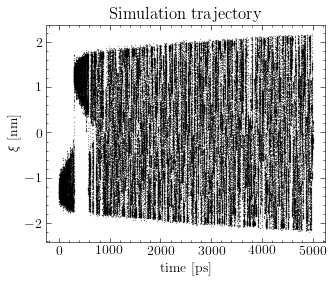

In [14]:
#Load the trajectory data
data = plumed.read_as_pandas("position")
time = data["time"]
position = data["p.x"]

#plot trajectory
plt.scatter(time, position, color="black",marker=".", s=0.1)
plt.xlabel("time [ps]")
plt.ylabel(r"$\xi$ [nm]")
plt.title("Simulation trajectory")
plt.show()

From the trajectory above, it can be seen that the value of $\xi$ now quickly explores the whole range between $-2.0$ and $2.0$ and beyond. Next, the histogram and the free energy surface is plotted.

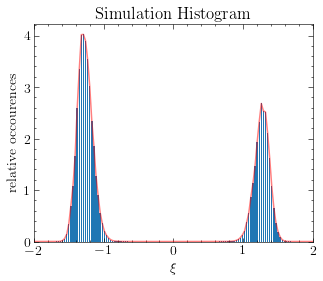

In [15]:
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/MetaD_simulation")

#load histogram data
data = plumed.read_as_pandas("histo")
histogram = data["hh"]
position = data["p.x"]

#plot histogram
plt.bar(position, histogram, width=0.02, align="center", label="Histogram")#, range=(-np.pi, np.pi))
plt.plot(position, histogram, color="red", alpha=0.5, label="Probability density")
plt.xlim(-2,2)
plt.xlabel(r"$\xi$")
plt.ylabel("relative occourences")
plt.title("Simulation Histogram")
plt.show()

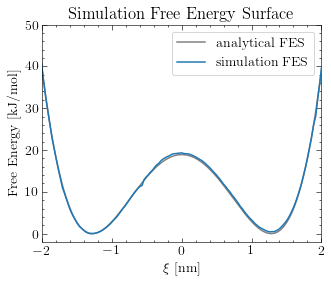

In [16]:
#plot free energy surface
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/MetaD_simulation")

#plot analytical fes
plt.plot(x, y, color="grey", label="analytical FES")

#plot simulation fes
data = plumed.read_as_pandas("fes.dat")
fes = data["fes"]
fes = fes - min(fes)
position = data["p.x"]

plt.plot(position, fes, label="simulation FES")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Simulation Free Energy Surface")
plt.show()

From the historgram, it can be interpreted that the simulation mainly visited the two basins, but also the region between them, although much less. 
The FES is is in very good agreement with the analytical surface.

In order to visualise the build-up of the bias potential, the analticical surface + the bias at various times is plotted.

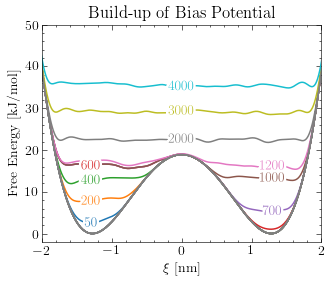

In [17]:
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/MetaD_simulation")

data = plumed.read_as_pandas("HILLS")
position = data["p.x"]
height = data["height"][0]
sigma = data["sigma_p.x"][0]

bias = np.zeros_like(x)
for i in range(int(len(data))):
    bias += height * np.exp(- (x - position[i])**2 / (2 * sigma**2))
    
    if i in [50, 200, 400, 600,700, 1000, 1200, 2000, 3000, 4000]:
        plt.figure(2)
        plt.plot(x, y, color="grey")
        plt.plot(x, bias+y, label=str(i))

xvals = [-1.3, -1.3, -1.3, -1.3, 1.3, 1.3, 1.3, 0, 0, 0]
labelLines(plt.gca().get_lines(), align=False, xvals=xvals)
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Build-up of Bias Potential")
plt.show()

# Well Tempered MetaDynamic Simulation

In Well Tempered Metadynamics, the height of the repulsive bias is a function of the position where it is deposited. The height of the repulsive bias at a particular position becommes smaller, as more biases are deposited at that position. 

In the plumed.dat file, a "BIASFACTOR" needs to be specified in the "METAD" line to make it a well tempered metadynamics simulations:

METAD ARG=p.x PACE=100 SIGMA=0.1 HEIGHT=0.1 GRID_MIN=-3 GRID_MAX=3 GRID_BIN=200 BIASFACTOR=10 TEMP=120 CALC_RCT

In [18]:
os.chdir(path)
try: os.mkdir("MetaD_WT_simulation")
except: print("folder \"MetaD_WT_simulation\" already exists")
os.chdir("MetaD_WT_simulation")

folder "MetaD_WT_simulation" already exists


In [20]:
def run_langevin1D_plumed_fes(length, sigma=0.1, height=0.1, biasfactor=10):
    with open("plumed.dat","w") as f:
        print("""#Define system as distance between two atoms
p: DISTANCE ATOMS=1,2 COMPONENTS
#Define Force field
ff: MATHEVAL ARG=p.x PERIODIC=NO FUNC=(7*x^4-23*x^2)
bb: BIASVALUE ARG=ff
#Define Histroy dependet bias potentail (baisfactor very large so that height stays constant)
# METAD ARG=p.x PACE=100 SIGMA=0.1 HEIGHT=0.1 TEMP=120 BIASFACTOR=10000
METAD ARG=p.x PACE=100 SIGMA={} HEIGHT={} GRID_MIN=-3 GRID_MAX=3 GRID_BIN=200 BIASFACTOR={} TEMP=120 CALC_RCT
#Reweight Bias
bias: REWEIGHT_METAD TEMP=120
#Make Histogram
hh: HISTOGRAM ARG=p.x GRID_MIN=-3 GRID_MAX=3 GRID_BIN=300 BANDWIDTH=0.01 LOGWEIGHTS=bias
#Convert Histogram to FES
fes: CONVERT_TO_FES GRID=hh TEMP=120
#Save Histogram and FES at the end. Save position every 10 time-steps    
DUMPGRID GRID=hh FILE=histo STRIDE={}
DUMPGRID GRID=fes FILE=fes.dat STRIDE={}
PRINT FILE=position ARG=p.x STRIDE=10""".format(sigma, height, biasfactor, length, length),file=f)

    with open("input","w") as f:
        print("""temperature 1
tstep 0.005
friction 1
dimension 1
nstep {}
ipos -1.0
periodic false""".format(length),file=f)

    #Start WT-Metadynamic simulation
    !plumed pesmd < input
    
run_langevin1D_plumed_fes(length)

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodi

Doing step 7160
Doing step 7180
Doing step 7200
Doing step 7220
Doing step 7240
Doing step 7260
Doing step 7280
Doing step 7300
Doing step 7320
Doing step 7340
Doing step 7360
Doing step 7380
Doing step 7400
Doing step 7420
Doing step 7440
Doing step 7460
Doing step 7480
Doing step 7500
Doing step 7520
Doing step 7540
Doing step 7560
Doing step 7580
Doing step 7600
Doing step 7620
Doing step 7640
Doing step 7660
Doing step 7680
Doing step 7700
Doing step 7720
Doing step 7740
Doing step 7760
Doing step 7780
Doing step 7800
Doing step 7820
Doing step 7840
Doing step 7860
Doing step 7880
Doing step 7900
Doing step 7920
Doing step 7940
Doing step 7960
Doing step 7980
Doing step 8000
Doing step 8020
Doing step 8040
Doing step 8060
Doing step 8080
Doing step 8100
Doing step 8120
Doing step 8140
Doing step 8160
Doing step 8180
Doing step 8200
Doing step 8220
Doing step 8240
Doing step 8260
Doing step 8280
Doing step 8300
Doing step 8320
Doing step 8340
Doing step 8360
Doing step 8380
Doing st

Doing step 17640
Doing step 17660
Doing step 17680
Doing step 17700
Doing step 17720
Doing step 17740
Doing step 17760
Doing step 17780
Doing step 17800
Doing step 17820
Doing step 17840
Doing step 17860
Doing step 17880
Doing step 17900
Doing step 17920
Doing step 17940
Doing step 17960
Doing step 17980
Doing step 18000
Doing step 18020
Doing step 18040
Doing step 18060
Doing step 18080
Doing step 18100
Doing step 18120
Doing step 18140
Doing step 18160
Doing step 18180
Doing step 18200
Doing step 18220
Doing step 18240
Doing step 18260
Doing step 18280
Doing step 18300
Doing step 18320
Doing step 18340
Doing step 18360
Doing step 18380
Doing step 18400
Doing step 18420
Doing step 18440
Doing step 18460
Doing step 18480
Doing step 18500
Doing step 18520
Doing step 18540
Doing step 18560
Doing step 18580
Doing step 18600
Doing step 18620
Doing step 18640
Doing step 18660
Doing step 18680
Doing step 18700
Doing step 18720
Doing step 18740
Doing step 18760
Doing step 18780
Doing step 188

Doing step 27920
Doing step 27940
Doing step 27960
Doing step 27980
Doing step 28000
Doing step 28020
Doing step 28040
Doing step 28060
Doing step 28080
Doing step 28100
Doing step 28120
Doing step 28140
Doing step 28160
Doing step 28180
Doing step 28200
Doing step 28220
Doing step 28240
Doing step 28260
Doing step 28280
Doing step 28300
Doing step 28320
Doing step 28340
Doing step 28360
Doing step 28380
Doing step 28400
Doing step 28420
Doing step 28440
Doing step 28460
Doing step 28480
Doing step 28500
Doing step 28520
Doing step 28540
Doing step 28560
Doing step 28580
Doing step 28600
Doing step 28620
Doing step 28640
Doing step 28660
Doing step 28680
Doing step 28700
Doing step 28720
Doing step 28740
Doing step 28760
Doing step 28780
Doing step 28800
Doing step 28820
Doing step 28840
Doing step 28860
Doing step 28880
Doing step 28900
Doing step 28920
Doing step 28940
Doing step 28960
Doing step 28980
Doing step 29000
Doing step 29020
Doing step 29040
Doing step 29060
Doing step 290

Doing step 37740
Doing step 37760
Doing step 37780
Doing step 37800
Doing step 37820
Doing step 37840
Doing step 37860
Doing step 37880
Doing step 37900
Doing step 37920
Doing step 37940
Doing step 37960
Doing step 37980
Doing step 38000
Doing step 38020
Doing step 38040
Doing step 38060
Doing step 38080
Doing step 38100
Doing step 38120
Doing step 38140
Doing step 38160
Doing step 38180
Doing step 38200
Doing step 38220
Doing step 38240
Doing step 38260
Doing step 38280
Doing step 38300
Doing step 38320
Doing step 38340
Doing step 38360
Doing step 38380
Doing step 38400
Doing step 38420
Doing step 38440
Doing step 38460
Doing step 38480
Doing step 38500
Doing step 38520
Doing step 38540
Doing step 38560
Doing step 38580
Doing step 38600
Doing step 38620
Doing step 38640
Doing step 38660
Doing step 38680
Doing step 38700
Doing step 38720
Doing step 38740
Doing step 38760
Doing step 38780
Doing step 38800
Doing step 38820
Doing step 38840
Doing step 38860
Doing step 38880
Doing step 389

Doing step 47560
Doing step 47580
Doing step 47600
Doing step 47620
Doing step 47640
Doing step 47660
Doing step 47680
Doing step 47700
Doing step 47720
Doing step 47740
Doing step 47760
Doing step 47780
Doing step 47800
Doing step 47820
Doing step 47840
Doing step 47860
Doing step 47880
Doing step 47900
Doing step 47920
Doing step 47940
Doing step 47960
Doing step 47980
Doing step 48000
Doing step 48020
Doing step 48040
Doing step 48060
Doing step 48080
Doing step 48100
Doing step 48120
Doing step 48140
Doing step 48160
Doing step 48180
Doing step 48200
Doing step 48220
Doing step 48240
Doing step 48260
Doing step 48280
Doing step 48300
Doing step 48320
Doing step 48340
Doing step 48360
Doing step 48380
Doing step 48400
Doing step 48420
Doing step 48440
Doing step 48460
Doing step 48480
Doing step 48500
Doing step 48520
Doing step 48540
Doing step 48560
Doing step 48580
Doing step 48600
Doing step 48620
Doing step 48640
Doing step 48660
Doing step 48680
Doing step 48700
Doing step 487

Doing step 57380
Doing step 57400
Doing step 57420
Doing step 57440
Doing step 57460
Doing step 57480
Doing step 57500
Doing step 57520
Doing step 57540
Doing step 57560
Doing step 57580
Doing step 57600
Doing step 57620
Doing step 57640
Doing step 57660
Doing step 57680
Doing step 57700
Doing step 57720
Doing step 57740
Doing step 57760
Doing step 57780
Doing step 57800
Doing step 57820
Doing step 57840
Doing step 57860
Doing step 57880
Doing step 57900
Doing step 57920
Doing step 57940
Doing step 57960
Doing step 57980
Doing step 58000
Doing step 58020
Doing step 58040
Doing step 58060
Doing step 58080
Doing step 58100
Doing step 58120
Doing step 58140
Doing step 58160
Doing step 58180
Doing step 58200
Doing step 58220
Doing step 58240
Doing step 58260
Doing step 58280
Doing step 58300
Doing step 58320
Doing step 58340
Doing step 58360
Doing step 58380
Doing step 58400
Doing step 58420
Doing step 58440
Doing step 58460
Doing step 58480
Doing step 58500
Doing step 58520
Doing step 585

Doing step 68340
Doing step 68360
Doing step 68380
Doing step 68400
Doing step 68420
Doing step 68440
Doing step 68460
Doing step 68480
Doing step 68500
Doing step 68520
Doing step 68540
Doing step 68560
Doing step 68580
Doing step 68600
Doing step 68620
Doing step 68640
Doing step 68660
Doing step 68680
Doing step 68700
Doing step 68720
Doing step 68740
Doing step 68760
Doing step 68780
Doing step 68800
Doing step 68820
Doing step 68840
Doing step 68860
Doing step 68880
Doing step 68900
Doing step 68920
Doing step 68940
Doing step 68960
Doing step 68980
Doing step 69000
Doing step 69020
Doing step 69040
Doing step 69060
Doing step 69080
Doing step 69100
Doing step 69120
Doing step 69140
Doing step 69160
Doing step 69180
Doing step 69200
Doing step 69220
Doing step 69240
Doing step 69260
Doing step 69280
Doing step 69300
Doing step 69320
Doing step 69340
Doing step 69360
Doing step 69380
Doing step 69400
Doing step 69420
Doing step 69440
Doing step 69460
Doing step 69480
Doing step 695

Doing step 78680
Doing step 78700
Doing step 78720
Doing step 78740
Doing step 78760
Doing step 78780
Doing step 78800
Doing step 78820
Doing step 78840
Doing step 78860
Doing step 78880
Doing step 78900
Doing step 78920
Doing step 78940
Doing step 78960
Doing step 78980
Doing step 79000
Doing step 79020
Doing step 79040
Doing step 79060
Doing step 79080
Doing step 79100
Doing step 79120
Doing step 79140
Doing step 79160
Doing step 79180
Doing step 79200
Doing step 79220
Doing step 79240
Doing step 79260
Doing step 79280
Doing step 79300
Doing step 79320
Doing step 79340
Doing step 79360
Doing step 79380
Doing step 79400
Doing step 79420
Doing step 79440
Doing step 79460
Doing step 79480
Doing step 79500
Doing step 79520
Doing step 79540
Doing step 79560
Doing step 79580
Doing step 79600
Doing step 79620
Doing step 79640
Doing step 79660
Doing step 79680
Doing step 79700
Doing step 79720
Doing step 79740
Doing step 79760
Doing step 79780
Doing step 79800
Doing step 79820
Doing step 798

Doing step 89660
Doing step 89680
Doing step 89700
Doing step 89720
Doing step 89740
Doing step 89760
Doing step 89780
Doing step 89800
Doing step 89820
Doing step 89840
Doing step 89860
Doing step 89880
Doing step 89900
Doing step 89920
Doing step 89940
Doing step 89960
Doing step 89980
Doing step 90000
Doing step 90020
Doing step 90040
Doing step 90060
Doing step 90080
Doing step 90100
Doing step 90120
Doing step 90140
Doing step 90160
Doing step 90180
Doing step 90200
Doing step 90220
Doing step 90240
Doing step 90260
Doing step 90280
Doing step 90300
Doing step 90320
Doing step 90340
Doing step 90360
Doing step 90380
Doing step 90400
Doing step 90420
Doing step 90440
Doing step 90460
Doing step 90480
Doing step 90500
Doing step 90520
Doing step 90540
Doing step 90560
Doing step 90580
Doing step 90600
Doing step 90620
Doing step 90640
Doing step 90660
Doing step 90680
Doing step 90700
Doing step 90720
Doing step 90740
Doing step 90760
Doing step 90780
Doing step 90800
Doing step 908

Doing step 99620
Doing step 99640
Doing step 99660
Doing step 99680
Doing step 99700
Doing step 99720
Doing step 99740
Doing step 99760
Doing step 99780
Doing step 99800
Doing step 99820
Doing step 99840
Doing step 99860
Doing step 99880
Doing step 99900
Doing step 99920
Doing step 99940
Doing step 99960
Doing step 99980
Doing step 100000
Doing step 100020
Doing step 100040
Doing step 100060
Doing step 100080
Doing step 100100
Doing step 100120
Doing step 100140
Doing step 100160
Doing step 100180
Doing step 100200
Doing step 100220
Doing step 100240
Doing step 100260
Doing step 100280
Doing step 100300
Doing step 100320
Doing step 100340
Doing step 100360
Doing step 100380
Doing step 100400
Doing step 100420
Doing step 100440
Doing step 100460
Doing step 100480
Doing step 100500
Doing step 100520
Doing step 100540
Doing step 100560
Doing step 100580
Doing step 100600
Doing step 100620
Doing step 100640
Doing step 100660
Doing step 100680
Doing step 100700
Doing step 100720
Doing step 

Doing step 109560
Doing step 109580
Doing step 109600
Doing step 109620
Doing step 109640
Doing step 109660
Doing step 109680
Doing step 109700
Doing step 109720
Doing step 109740
Doing step 109760
Doing step 109780
Doing step 109800
Doing step 109820
Doing step 109840
Doing step 109860
Doing step 109880
Doing step 109900
Doing step 109920
Doing step 109940
Doing step 109960
Doing step 109980
Doing step 110000
Doing step 110020
Doing step 110040
Doing step 110060
Doing step 110080
Doing step 110100
Doing step 110120
Doing step 110140
Doing step 110160
Doing step 110180
Doing step 110200
Doing step 110220
Doing step 110240
Doing step 110260
Doing step 110280
Doing step 110300
Doing step 110320
Doing step 110340
Doing step 110360
Doing step 110380
Doing step 110400
Doing step 110420
Doing step 110440
Doing step 110460
Doing step 110480
Doing step 110500
Doing step 110520
Doing step 110540
Doing step 110560
Doing step 110580
Doing step 110600
Doing step 110620
Doing step 110640
Doing step

Doing step 119600
Doing step 119620
Doing step 119640
Doing step 119660
Doing step 119680
Doing step 119700
Doing step 119720
Doing step 119740
Doing step 119760
Doing step 119780
Doing step 119800
Doing step 119820
Doing step 119840
Doing step 119860
Doing step 119880
Doing step 119900
Doing step 119920
Doing step 119940
Doing step 119960
Doing step 119980
Doing step 120000
Doing step 120020
Doing step 120040
Doing step 120060
Doing step 120080
Doing step 120100
Doing step 120120
Doing step 120140
Doing step 120160
Doing step 120180
Doing step 120200
Doing step 120220
Doing step 120240
Doing step 120260
Doing step 120280
Doing step 120300
Doing step 120320
Doing step 120340
Doing step 120360
Doing step 120380
Doing step 120400
Doing step 120420
Doing step 120440
Doing step 120460
Doing step 120480
Doing step 120500
Doing step 120520
Doing step 120540
Doing step 120560
Doing step 120580
Doing step 120600
Doing step 120620
Doing step 120640
Doing step 120660
Doing step 120680
Doing step

Doing step 130180
Doing step 130200
Doing step 130220
Doing step 130240
Doing step 130260
Doing step 130280
Doing step 130300
Doing step 130320
Doing step 130340
Doing step 130360
Doing step 130380
Doing step 130400
Doing step 130420
Doing step 130440
Doing step 130460
Doing step 130480
Doing step 130500
Doing step 130520
Doing step 130540
Doing step 130560
Doing step 130580
Doing step 130600
Doing step 130620
Doing step 130640
Doing step 130660
Doing step 130680
Doing step 130700
Doing step 130720
Doing step 130740
Doing step 130760
Doing step 130780
Doing step 130800
Doing step 130820
Doing step 130840
Doing step 130860
Doing step 130880
Doing step 130900
Doing step 130920
Doing step 130940
Doing step 130960
Doing step 130980
Doing step 131000
Doing step 131020
Doing step 131040
Doing step 131060
Doing step 131080
Doing step 131100
Doing step 131120
Doing step 131140
Doing step 131160
Doing step 131180
Doing step 131200
Doing step 131220
Doing step 131240
Doing step 131260
Doing step

Doing step 139400
Doing step 139420
Doing step 139440
Doing step 139460
Doing step 139480
Doing step 139500
Doing step 139520
Doing step 139540
Doing step 139560
Doing step 139580
Doing step 139600
Doing step 139620
Doing step 139640
Doing step 139660
Doing step 139680
Doing step 139700
Doing step 139720
Doing step 139740
Doing step 139760
Doing step 139780
Doing step 139800
Doing step 139820
Doing step 139840
Doing step 139860
Doing step 139880
Doing step 139900
Doing step 139920
Doing step 139940
Doing step 139960
Doing step 139980
Doing step 140000
Doing step 140020
Doing step 140040
Doing step 140060
Doing step 140080
Doing step 140100
Doing step 140120
Doing step 140140
Doing step 140160
Doing step 140180
Doing step 140200
Doing step 140220
Doing step 140240
Doing step 140260
Doing step 140280
Doing step 140300
Doing step 140320
Doing step 140340
Doing step 140360
Doing step 140380
Doing step 140400
Doing step 140420
Doing step 140440
Doing step 140460
Doing step 140480
Doing step

Doing step 149620
Doing step 149640
Doing step 149660
Doing step 149680
Doing step 149700
Doing step 149720
Doing step 149740
Doing step 149760
Doing step 149780
Doing step 149800
Doing step 149820
Doing step 149840
Doing step 149860
Doing step 149880
Doing step 149900
Doing step 149920
Doing step 149940
Doing step 149960
Doing step 149980
Doing step 150000
Doing step 150020
Doing step 150040
Doing step 150060
Doing step 150080
Doing step 150100
Doing step 150120
Doing step 150140
Doing step 150160
Doing step 150180
Doing step 150200
Doing step 150220
Doing step 150240
Doing step 150260
Doing step 150280
Doing step 150300
Doing step 150320
Doing step 150340
Doing step 150360
Doing step 150380
Doing step 150400
Doing step 150420
Doing step 150440
Doing step 150460
Doing step 150480
Doing step 150500
Doing step 150520
Doing step 150540
Doing step 150560
Doing step 150580
Doing step 150600
Doing step 150620
Doing step 150640
Doing step 150660
Doing step 150680
Doing step 150700
Doing step

Doing step 159380
Doing step 159400
Doing step 159420
Doing step 159440
Doing step 159460
Doing step 159480
Doing step 159500
Doing step 159520
Doing step 159540
Doing step 159560
Doing step 159580
Doing step 159600
Doing step 159620
Doing step 159640
Doing step 159660
Doing step 159680
Doing step 159700
Doing step 159720
Doing step 159740
Doing step 159760
Doing step 159780
Doing step 159800
Doing step 159820
Doing step 159840
Doing step 159860
Doing step 159880
Doing step 159900
Doing step 159920
Doing step 159940
Doing step 159960
Doing step 159980
Doing step 160000
Doing step 160020
Doing step 160040
Doing step 160060
Doing step 160080
Doing step 160100
Doing step 160120
Doing step 160140
Doing step 160160
Doing step 160180
Doing step 160200
Doing step 160220
Doing step 160240
Doing step 160260
Doing step 160280
Doing step 160300
Doing step 160320
Doing step 160340
Doing step 160360
Doing step 160380
Doing step 160400
Doing step 160420
Doing step 160440
Doing step 160460
Doing step

Doing step 169780
Doing step 169800
Doing step 169820
Doing step 169840
Doing step 169860
Doing step 169880
Doing step 169900
Doing step 169920
Doing step 169940
Doing step 169960
Doing step 169980
Doing step 170000
Doing step 170020
Doing step 170040
Doing step 170060
Doing step 170080
Doing step 170100
Doing step 170120
Doing step 170140
Doing step 170160
Doing step 170180
Doing step 170200
Doing step 170220
Doing step 170240
Doing step 170260
Doing step 170280
Doing step 170300
Doing step 170320
Doing step 170340
Doing step 170360
Doing step 170380
Doing step 170400
Doing step 170420
Doing step 170440
Doing step 170460
Doing step 170480
Doing step 170500
Doing step 170520
Doing step 170540
Doing step 170560
Doing step 170580
Doing step 170600
Doing step 170620
Doing step 170640
Doing step 170660
Doing step 170680
Doing step 170700
Doing step 170720
Doing step 170740
Doing step 170760
Doing step 170780
Doing step 170800
Doing step 170820
Doing step 170840
Doing step 170860
Doing step

Doing step 180080
Doing step 180100
Doing step 180120
Doing step 180140
Doing step 180160
Doing step 180180
Doing step 180200
Doing step 180220
Doing step 180240
Doing step 180260
Doing step 180280
Doing step 180300
Doing step 180320
Doing step 180340
Doing step 180360
Doing step 180380
Doing step 180400
Doing step 180420
Doing step 180440
Doing step 180460
Doing step 180480
Doing step 180500
Doing step 180520
Doing step 180540
Doing step 180560
Doing step 180580
Doing step 180600
Doing step 180620
Doing step 180640
Doing step 180660
Doing step 180680
Doing step 180700
Doing step 180720
Doing step 180740
Doing step 180760
Doing step 180780
Doing step 180800
Doing step 180820
Doing step 180840
Doing step 180860
Doing step 180880
Doing step 180900
Doing step 180920
Doing step 180940
Doing step 180960
Doing step 180980
Doing step 181000
Doing step 181020
Doing step 181040
Doing step 181060
Doing step 181080
Doing step 181100
Doing step 181120
Doing step 181140
Doing step 181160
Doing step

Doing step 190080
Doing step 190100
Doing step 190120
Doing step 190140
Doing step 190160
Doing step 190180
Doing step 190200
Doing step 190220
Doing step 190240
Doing step 190260
Doing step 190280
Doing step 190300
Doing step 190320
Doing step 190340
Doing step 190360
Doing step 190380
Doing step 190400
Doing step 190420
Doing step 190440
Doing step 190460
Doing step 190480
Doing step 190500
Doing step 190520
Doing step 190540
Doing step 190560
Doing step 190580
Doing step 190600
Doing step 190620
Doing step 190640
Doing step 190660
Doing step 190680
Doing step 190700
Doing step 190720
Doing step 190740
Doing step 190760
Doing step 190780
Doing step 190800
Doing step 190820
Doing step 190840
Doing step 190860
Doing step 190880
Doing step 190900
Doing step 190920
Doing step 190940
Doing step 190960
Doing step 190980
Doing step 191000
Doing step 191020
Doing step 191040
Doing step 191060
Doing step 191080
Doing step 191100
Doing step 191120
Doing step 191140
Doing step 191160
Doing step

Doing step 200340
Doing step 200360
Doing step 200380
Doing step 200400
Doing step 200420
Doing step 200440
Doing step 200460
Doing step 200480
Doing step 200500
Doing step 200520
Doing step 200540
Doing step 200560
Doing step 200580
Doing step 200600
Doing step 200620
Doing step 200640
Doing step 200660
Doing step 200680
Doing step 200700
Doing step 200720
Doing step 200740
Doing step 200760
Doing step 200780
Doing step 200800
Doing step 200820
Doing step 200840
Doing step 200860
Doing step 200880
Doing step 200900
Doing step 200920
Doing step 200940
Doing step 200960
Doing step 200980
Doing step 201000
Doing step 201020
Doing step 201040
Doing step 201060
Doing step 201080
Doing step 201100
Doing step 201120
Doing step 201140
Doing step 201160
Doing step 201180
Doing step 201200
Doing step 201220
Doing step 201240
Doing step 201260
Doing step 201280
Doing step 201300
Doing step 201320
Doing step 201340
Doing step 201360
Doing step 201380
Doing step 201400
Doing step 201420
Doing step

Doing step 210620
Doing step 210640
Doing step 210660
Doing step 210680
Doing step 210700
Doing step 210720
Doing step 210740
Doing step 210760
Doing step 210780
Doing step 210800
Doing step 210820
Doing step 210840
Doing step 210860
Doing step 210880
Doing step 210900
Doing step 210920
Doing step 210940
Doing step 210960
Doing step 210980
Doing step 211000
Doing step 211020
Doing step 211040
Doing step 211060
Doing step 211080
Doing step 211100
Doing step 211120
Doing step 211140
Doing step 211160
Doing step 211180
Doing step 211200
Doing step 211220
Doing step 211240
Doing step 211260
Doing step 211280
Doing step 211300
Doing step 211320
Doing step 211340
Doing step 211360
Doing step 211380
Doing step 211400
Doing step 211420
Doing step 211440
Doing step 211460
Doing step 211480
Doing step 211500
Doing step 211520
Doing step 211540
Doing step 211560
Doing step 211580
Doing step 211600
Doing step 211620
Doing step 211640
Doing step 211660
Doing step 211680
Doing step 211700
Doing step

Doing step 220280
Doing step 220300
Doing step 220320
Doing step 220340
Doing step 220360
Doing step 220380
Doing step 220400
Doing step 220420
Doing step 220440
Doing step 220460
Doing step 220480
Doing step 220500
Doing step 220520
Doing step 220540
Doing step 220560
Doing step 220580
Doing step 220600
Doing step 220620
Doing step 220640
Doing step 220660
Doing step 220680
Doing step 220700
Doing step 220720
Doing step 220740
Doing step 220760
Doing step 220780
Doing step 220800
Doing step 220820
Doing step 220840
Doing step 220860
Doing step 220880
Doing step 220900
Doing step 220920
Doing step 220940
Doing step 220960
Doing step 220980
Doing step 221000
Doing step 221020
Doing step 221040
Doing step 221060
Doing step 221080
Doing step 221100
Doing step 221120
Doing step 221140
Doing step 221160
Doing step 221180
Doing step 221200
Doing step 221220
Doing step 221240
Doing step 221260
Doing step 221280
Doing step 221300
Doing step 221320
Doing step 221340
Doing step 221360
Doing step

Doing step 230340
Doing step 230360
Doing step 230380
Doing step 230400
Doing step 230420
Doing step 230440
Doing step 230460
Doing step 230480
Doing step 230500
Doing step 230520
Doing step 230540
Doing step 230560
Doing step 230580
Doing step 230600
Doing step 230620
Doing step 230640
Doing step 230660
Doing step 230680
Doing step 230700
Doing step 230720
Doing step 230740
Doing step 230760
Doing step 230780
Doing step 230800
Doing step 230820
Doing step 230840
Doing step 230860
Doing step 230880
Doing step 230900
Doing step 230920
Doing step 230940
Doing step 230960
Doing step 230980
Doing step 231000
Doing step 231020
Doing step 231040
Doing step 231060
Doing step 231080
Doing step 231100
Doing step 231120
Doing step 231140
Doing step 231160
Doing step 231180
Doing step 231200
Doing step 231220
Doing step 231240
Doing step 231260
Doing step 231280
Doing step 231300
Doing step 231320
Doing step 231340
Doing step 231360
Doing step 231380
Doing step 231400
Doing step 231420
Doing step

Doing step 240940
Doing step 240960
Doing step 240980
Doing step 241000
Doing step 241020
Doing step 241040
Doing step 241060
Doing step 241080
Doing step 241100
Doing step 241120
Doing step 241140
Doing step 241160
Doing step 241180
Doing step 241200
Doing step 241220
Doing step 241240
Doing step 241260
Doing step 241280
Doing step 241300
Doing step 241320
Doing step 241340
Doing step 241360
Doing step 241380
Doing step 241400
Doing step 241420
Doing step 241440
Doing step 241460
Doing step 241480
Doing step 241500
Doing step 241520
Doing step 241540
Doing step 241560
Doing step 241580
Doing step 241600
Doing step 241620
Doing step 241640
Doing step 241660
Doing step 241680
Doing step 241700
Doing step 241720
Doing step 241740
Doing step 241760
Doing step 241780
Doing step 241800
Doing step 241820
Doing step 241840
Doing step 241860
Doing step 241880
Doing step 241900
Doing step 241920
Doing step 241940
Doing step 241960
Doing step 241980
Doing step 242000
Doing step 242020
Doing step

Doing step 250600
Doing step 250620
Doing step 250640
Doing step 250660
Doing step 250680
Doing step 250700
Doing step 250720
Doing step 250740
Doing step 250760
Doing step 250780
Doing step 250800
Doing step 250820
Doing step 250840
Doing step 250860
Doing step 250880
Doing step 250900
Doing step 250920
Doing step 250940
Doing step 250960
Doing step 250980
Doing step 251000
Doing step 251020
Doing step 251040
Doing step 251060
Doing step 251080
Doing step 251100
Doing step 251120
Doing step 251140
Doing step 251160
Doing step 251180
Doing step 251200
Doing step 251220
Doing step 251240
Doing step 251260
Doing step 251280
Doing step 251300
Doing step 251320
Doing step 251340
Doing step 251360
Doing step 251380
Doing step 251400
Doing step 251420
Doing step 251440
Doing step 251460
Doing step 251480
Doing step 251500
Doing step 251520
Doing step 251540
Doing step 251560
Doing step 251580
Doing step 251600
Doing step 251620
Doing step 251640
Doing step 251660
Doing step 251680
Doing step

Doing step 260500
Doing step 260520
Doing step 260540
Doing step 260560
Doing step 260580
Doing step 260600
Doing step 260620
Doing step 260640
Doing step 260660
Doing step 260680
Doing step 260700
Doing step 260720
Doing step 260740
Doing step 260760
Doing step 260780
Doing step 260800
Doing step 260820
Doing step 260840
Doing step 260860
Doing step 260880
Doing step 260900
Doing step 260920
Doing step 260940
Doing step 260960
Doing step 260980
Doing step 261000
Doing step 261020
Doing step 261040
Doing step 261060
Doing step 261080
Doing step 261100
Doing step 261120
Doing step 261140
Doing step 261160
Doing step 261180
Doing step 261200
Doing step 261220
Doing step 261240
Doing step 261260
Doing step 261280
Doing step 261300
Doing step 261320
Doing step 261340
Doing step 261360
Doing step 261380
Doing step 261400
Doing step 261420
Doing step 261440
Doing step 261460
Doing step 261480
Doing step 261500
Doing step 261520
Doing step 261540
Doing step 261560
Doing step 261580
Doing step

Doing step 270720
Doing step 270740
Doing step 270760
Doing step 270780
Doing step 270800
Doing step 270820
Doing step 270840
Doing step 270860
Doing step 270880
Doing step 270900
Doing step 270920
Doing step 270940
Doing step 270960
Doing step 270980
Doing step 271000
Doing step 271020
Doing step 271040
Doing step 271060
Doing step 271080
Doing step 271100
Doing step 271120
Doing step 271140
Doing step 271160
Doing step 271180
Doing step 271200
Doing step 271220
Doing step 271240
Doing step 271260
Doing step 271280
Doing step 271300
Doing step 271320
Doing step 271340
Doing step 271360
Doing step 271380
Doing step 271400
Doing step 271420
Doing step 271440
Doing step 271460
Doing step 271480
Doing step 271500
Doing step 271520
Doing step 271540
Doing step 271560
Doing step 271580
Doing step 271600
Doing step 271620
Doing step 271640
Doing step 271660
Doing step 271680
Doing step 271700
Doing step 271720
Doing step 271740
Doing step 271760
Doing step 271780
Doing step 271800
Doing step

Doing step 280960
Doing step 280980
Doing step 281000
Doing step 281020
Doing step 281040
Doing step 281060
Doing step 281080
Doing step 281100
Doing step 281120
Doing step 281140
Doing step 281160
Doing step 281180
Doing step 281200
Doing step 281220
Doing step 281240
Doing step 281260
Doing step 281280
Doing step 281300
Doing step 281320
Doing step 281340
Doing step 281360
Doing step 281380
Doing step 281400
Doing step 281420
Doing step 281440
Doing step 281460
Doing step 281480
Doing step 281500
Doing step 281520
Doing step 281540
Doing step 281560
Doing step 281580
Doing step 281600
Doing step 281620
Doing step 281640
Doing step 281660
Doing step 281680
Doing step 281700
Doing step 281720
Doing step 281740
Doing step 281760
Doing step 281780
Doing step 281800
Doing step 281820
Doing step 281840
Doing step 281860
Doing step 281880
Doing step 281900
Doing step 281920
Doing step 281940
Doing step 281960
Doing step 281980
Doing step 282000
Doing step 282020
Doing step 282040
Doing step

Doing step 290960
Doing step 290980
Doing step 291000
Doing step 291020
Doing step 291040
Doing step 291060
Doing step 291080
Doing step 291100
Doing step 291120
Doing step 291140
Doing step 291160
Doing step 291180
Doing step 291200
Doing step 291220
Doing step 291240
Doing step 291260
Doing step 291280
Doing step 291300
Doing step 291320
Doing step 291340
Doing step 291360
Doing step 291380
Doing step 291400
Doing step 291420
Doing step 291440
Doing step 291460
Doing step 291480
Doing step 291500
Doing step 291520
Doing step 291540
Doing step 291560
Doing step 291580
Doing step 291600
Doing step 291620
Doing step 291640
Doing step 291660
Doing step 291680
Doing step 291700
Doing step 291720
Doing step 291740
Doing step 291760
Doing step 291780
Doing step 291800
Doing step 291820
Doing step 291840
Doing step 291860
Doing step 291880
Doing step 291900
Doing step 291920
Doing step 291940
Doing step 291960
Doing step 291980
Doing step 292000
Doing step 292020
Doing step 292040
Doing step

Doing step 301000
Doing step 301020
Doing step 301040
Doing step 301060
Doing step 301080
Doing step 301100
Doing step 301120
Doing step 301140
Doing step 301160
Doing step 301180
Doing step 301200
Doing step 301220
Doing step 301240
Doing step 301260
Doing step 301280
Doing step 301300
Doing step 301320
Doing step 301340
Doing step 301360
Doing step 301380
Doing step 301400
Doing step 301420
Doing step 301440
Doing step 301460
Doing step 301480
Doing step 301500
Doing step 301520
Doing step 301540
Doing step 301560
Doing step 301580
Doing step 301600
Doing step 301620
Doing step 301640
Doing step 301660
Doing step 301680
Doing step 301700
Doing step 301720
Doing step 301740
Doing step 301760
Doing step 301780
Doing step 301800
Doing step 301820
Doing step 301840
Doing step 301860
Doing step 301880
Doing step 301900
Doing step 301920
Doing step 301940
Doing step 301960
Doing step 301980
Doing step 302000
Doing step 302020
Doing step 302040
Doing step 302060
Doing step 302080
Doing step

Doing step 312120
Doing step 312140
Doing step 312160
Doing step 312180
Doing step 312200
Doing step 312220
Doing step 312240
Doing step 312260
Doing step 312280
Doing step 312300
Doing step 312320
Doing step 312340
Doing step 312360
Doing step 312380
Doing step 312400
Doing step 312420
Doing step 312440
Doing step 312460
Doing step 312480
Doing step 312500
Doing step 312520
Doing step 312540
Doing step 312560
Doing step 312580
Doing step 312600
Doing step 312620
Doing step 312640
Doing step 312660
Doing step 312680
Doing step 312700
Doing step 312720
Doing step 312740
Doing step 312760
Doing step 312780
Doing step 312800
Doing step 312820
Doing step 312840
Doing step 312860
Doing step 312880
Doing step 312900
Doing step 312920
Doing step 312940
Doing step 312960
Doing step 312980
Doing step 313000
Doing step 313020
Doing step 313040
Doing step 313060
Doing step 313080
Doing step 313100
Doing step 313120
Doing step 313140
Doing step 313160
Doing step 313180
Doing step 313200
Doing step

Doing step 322760
Doing step 322780
Doing step 322800
Doing step 322820
Doing step 322840
Doing step 322860
Doing step 322880
Doing step 322900
Doing step 322920
Doing step 322940
Doing step 322960
Doing step 322980
Doing step 323000
Doing step 323020
Doing step 323040
Doing step 323060
Doing step 323080
Doing step 323100
Doing step 323120
Doing step 323140
Doing step 323160
Doing step 323180
Doing step 323200
Doing step 323220
Doing step 323240
Doing step 323260
Doing step 323280
Doing step 323300
Doing step 323320
Doing step 323340
Doing step 323360
Doing step 323380
Doing step 323400
Doing step 323420
Doing step 323440
Doing step 323460
Doing step 323480
Doing step 323500
Doing step 323520
Doing step 323540
Doing step 323560
Doing step 323580
Doing step 323600
Doing step 323620
Doing step 323640
Doing step 323660
Doing step 323680
Doing step 323700
Doing step 323720
Doing step 323740
Doing step 323760
Doing step 323780
Doing step 323800
Doing step 323820
Doing step 323840
Doing step

Doing step 332940
Doing step 332960
Doing step 332980
Doing step 333000
Doing step 333020
Doing step 333040
Doing step 333060
Doing step 333080
Doing step 333100
Doing step 333120
Doing step 333140
Doing step 333160
Doing step 333180
Doing step 333200
Doing step 333220
Doing step 333240
Doing step 333260
Doing step 333280
Doing step 333300
Doing step 333320
Doing step 333340
Doing step 333360
Doing step 333380
Doing step 333400
Doing step 333420
Doing step 333440
Doing step 333460
Doing step 333480
Doing step 333500
Doing step 333520
Doing step 333540
Doing step 333560
Doing step 333580
Doing step 333600
Doing step 333620
Doing step 333640
Doing step 333660
Doing step 333680
Doing step 333700
Doing step 333720
Doing step 333740
Doing step 333760
Doing step 333780
Doing step 333800
Doing step 333820
Doing step 333840
Doing step 333860
Doing step 333880
Doing step 333900
Doing step 333920
Doing step 333940
Doing step 333960
Doing step 333980
Doing step 334000
Doing step 334020
Doing step

Doing step 343300
Doing step 343320
Doing step 343340
Doing step 343360
Doing step 343380
Doing step 343400
Doing step 343420
Doing step 343440
Doing step 343460
Doing step 343480
Doing step 343500
Doing step 343520
Doing step 343540
Doing step 343560
Doing step 343580
Doing step 343600
Doing step 343620
Doing step 343640
Doing step 343660
Doing step 343680
Doing step 343700
Doing step 343720
Doing step 343740
Doing step 343760
Doing step 343780
Doing step 343800
Doing step 343820
Doing step 343840
Doing step 343860
Doing step 343880
Doing step 343900
Doing step 343920
Doing step 343940
Doing step 343960
Doing step 343980
Doing step 344000
Doing step 344020
Doing step 344040
Doing step 344060
Doing step 344080
Doing step 344100
Doing step 344120
Doing step 344140
Doing step 344160
Doing step 344180
Doing step 344200
Doing step 344220
Doing step 344240
Doing step 344260
Doing step 344280
Doing step 344300
Doing step 344320
Doing step 344340
Doing step 344360
Doing step 344380
Doing step

Doing step 353300
Doing step 353320
Doing step 353340
Doing step 353360
Doing step 353380
Doing step 353400
Doing step 353420
Doing step 353440
Doing step 353460
Doing step 353480
Doing step 353500
Doing step 353520
Doing step 353540
Doing step 353560
Doing step 353580
Doing step 353600
Doing step 353620
Doing step 353640
Doing step 353660
Doing step 353680
Doing step 353700
Doing step 353720
Doing step 353740
Doing step 353760
Doing step 353780
Doing step 353800
Doing step 353820
Doing step 353840
Doing step 353860
Doing step 353880
Doing step 353900
Doing step 353920
Doing step 353940
Doing step 353960
Doing step 353980
Doing step 354000
Doing step 354020
Doing step 354040
Doing step 354060
Doing step 354080
Doing step 354100
Doing step 354120
Doing step 354140
Doing step 354160
Doing step 354180
Doing step 354200
Doing step 354220
Doing step 354240
Doing step 354260
Doing step 354280
Doing step 354300
Doing step 354320
Doing step 354340
Doing step 354360
Doing step 354380
Doing step

Doing step 364020
Doing step 364040
Doing step 364060
Doing step 364080
Doing step 364100
Doing step 364120
Doing step 364140
Doing step 364160
Doing step 364180
Doing step 364200
Doing step 364220
Doing step 364240
Doing step 364260
Doing step 364280
Doing step 364300
Doing step 364320
Doing step 364340
Doing step 364360
Doing step 364380
Doing step 364400
Doing step 364420
Doing step 364440
Doing step 364460
Doing step 364480
Doing step 364500
Doing step 364520
Doing step 364540
Doing step 364560
Doing step 364580
Doing step 364600
Doing step 364620
Doing step 364640
Doing step 364660
Doing step 364680
Doing step 364700
Doing step 364720
Doing step 364740
Doing step 364760
Doing step 364780
Doing step 364800
Doing step 364820
Doing step 364840
Doing step 364860
Doing step 364880
Doing step 364900
Doing step 364920
Doing step 364940
Doing step 364960
Doing step 364980
Doing step 365000
Doing step 365020
Doing step 365040
Doing step 365060
Doing step 365080
Doing step 365100
Doing step

Doing step 374200
Doing step 374220
Doing step 374240
Doing step 374260
Doing step 374280
Doing step 374300
Doing step 374320
Doing step 374340
Doing step 374360
Doing step 374380
Doing step 374400
Doing step 374420
Doing step 374440
Doing step 374460
Doing step 374480
Doing step 374500
Doing step 374520
Doing step 374540
Doing step 374560
Doing step 374580
Doing step 374600
Doing step 374620
Doing step 374640
Doing step 374660
Doing step 374680
Doing step 374700
Doing step 374720
Doing step 374740
Doing step 374760
Doing step 374780
Doing step 374800
Doing step 374820
Doing step 374840
Doing step 374860
Doing step 374880
Doing step 374900
Doing step 374920
Doing step 374940
Doing step 374960
Doing step 374980
Doing step 375000
Doing step 375020
Doing step 375040
Doing step 375060
Doing step 375080
Doing step 375100
Doing step 375120
Doing step 375140
Doing step 375160
Doing step 375180
Doing step 375200
Doing step 375220
Doing step 375240
Doing step 375260
Doing step 375280
Doing step

Doing step 384820
Doing step 384840
Doing step 384860
Doing step 384880
Doing step 384900
Doing step 384920
Doing step 384940
Doing step 384960
Doing step 384980
Doing step 385000
Doing step 385020
Doing step 385040
Doing step 385060
Doing step 385080
Doing step 385100
Doing step 385120
Doing step 385140
Doing step 385160
Doing step 385180
Doing step 385200
Doing step 385220
Doing step 385240
Doing step 385260
Doing step 385280
Doing step 385300
Doing step 385320
Doing step 385340
Doing step 385360
Doing step 385380
Doing step 385400
Doing step 385420
Doing step 385440
Doing step 385460
Doing step 385480
Doing step 385500
Doing step 385520
Doing step 385540
Doing step 385560
Doing step 385580
Doing step 385600
Doing step 385620
Doing step 385640
Doing step 385660
Doing step 385680
Doing step 385700
Doing step 385720
Doing step 385740
Doing step 385760
Doing step 385780
Doing step 385800
Doing step 385820
Doing step 385840
Doing step 385860
Doing step 385880
Doing step 385900
Doing step

Doing step 394620
Doing step 394640
Doing step 394660
Doing step 394680
Doing step 394700
Doing step 394720
Doing step 394740
Doing step 394760
Doing step 394780
Doing step 394800
Doing step 394820
Doing step 394840
Doing step 394860
Doing step 394880
Doing step 394900
Doing step 394920
Doing step 394940
Doing step 394960
Doing step 394980
Doing step 395000
Doing step 395020
Doing step 395040
Doing step 395060
Doing step 395080
Doing step 395100
Doing step 395120
Doing step 395140
Doing step 395160
Doing step 395180
Doing step 395200
Doing step 395220
Doing step 395240
Doing step 395260
Doing step 395280
Doing step 395300
Doing step 395320
Doing step 395340
Doing step 395360
Doing step 395380
Doing step 395400
Doing step 395420
Doing step 395440
Doing step 395460
Doing step 395480
Doing step 395500
Doing step 395520
Doing step 395540
Doing step 395560
Doing step 395580
Doing step 395600
Doing step 395620
Doing step 395640
Doing step 395660
Doing step 395680
Doing step 395700
Doing step

Doing step 405040
Doing step 405060
Doing step 405080
Doing step 405100
Doing step 405120
Doing step 405140
Doing step 405160
Doing step 405180
Doing step 405200
Doing step 405220
Doing step 405240
Doing step 405260
Doing step 405280
Doing step 405300
Doing step 405320
Doing step 405340
Doing step 405360
Doing step 405380
Doing step 405400
Doing step 405420
Doing step 405440
Doing step 405460
Doing step 405480
Doing step 405500
Doing step 405520
Doing step 405540
Doing step 405560
Doing step 405580
Doing step 405600
Doing step 405620
Doing step 405640
Doing step 405660
Doing step 405680
Doing step 405700
Doing step 405720
Doing step 405740
Doing step 405760
Doing step 405780
Doing step 405800
Doing step 405820
Doing step 405840
Doing step 405860
Doing step 405880
Doing step 405900
Doing step 405920
Doing step 405940
Doing step 405960
Doing step 405980
Doing step 406000
Doing step 406020
Doing step 406040
Doing step 406060
Doing step 406080
Doing step 406100
Doing step 406120
Doing step

Doing step 415100
Doing step 415120
Doing step 415140
Doing step 415160
Doing step 415180
Doing step 415200
Doing step 415220
Doing step 415240
Doing step 415260
Doing step 415280
Doing step 415300
Doing step 415320
Doing step 415340
Doing step 415360
Doing step 415380
Doing step 415400
Doing step 415420
Doing step 415440
Doing step 415460
Doing step 415480
Doing step 415500
Doing step 415520
Doing step 415540
Doing step 415560
Doing step 415580
Doing step 415600
Doing step 415620
Doing step 415640
Doing step 415660
Doing step 415680
Doing step 415700
Doing step 415720
Doing step 415740
Doing step 415760
Doing step 415780
Doing step 415800
Doing step 415820
Doing step 415840
Doing step 415860
Doing step 415880
Doing step 415900
Doing step 415920
Doing step 415940
Doing step 415960
Doing step 415980
Doing step 416000
Doing step 416020
Doing step 416040
Doing step 416060
Doing step 416080
Doing step 416100
Doing step 416120
Doing step 416140
Doing step 416160
Doing step 416180
Doing step

Doing step 424960
Doing step 424980
Doing step 425000
Doing step 425020
Doing step 425040
Doing step 425060
Doing step 425080
Doing step 425100
Doing step 425120
Doing step 425140
Doing step 425160
Doing step 425180
Doing step 425200
Doing step 425220
Doing step 425240
Doing step 425260
Doing step 425280
Doing step 425300
Doing step 425320
Doing step 425340
Doing step 425360
Doing step 425380
Doing step 425400
Doing step 425420
Doing step 425440
Doing step 425460
Doing step 425480
Doing step 425500
Doing step 425520
Doing step 425540
Doing step 425560
Doing step 425580
Doing step 425600
Doing step 425620
Doing step 425640
Doing step 425660
Doing step 425680
Doing step 425700
Doing step 425720
Doing step 425740
Doing step 425760
Doing step 425780
Doing step 425800
Doing step 425820
Doing step 425840
Doing step 425860
Doing step 425880
Doing step 425900
Doing step 425920
Doing step 425940
Doing step 425960
Doing step 425980
Doing step 426000
Doing step 426020
Doing step 426040
Doing step

Doing step 434580
Doing step 434600
Doing step 434620
Doing step 434640
Doing step 434660
Doing step 434680
Doing step 434700
Doing step 434720
Doing step 434740
Doing step 434760
Doing step 434780
Doing step 434800
Doing step 434820
Doing step 434840
Doing step 434860
Doing step 434880
Doing step 434900
Doing step 434920
Doing step 434940
Doing step 434960
Doing step 434980
Doing step 435000
Doing step 435020
Doing step 435040
Doing step 435060
Doing step 435080
Doing step 435100
Doing step 435120
Doing step 435140
Doing step 435160
Doing step 435180
Doing step 435200
Doing step 435220
Doing step 435240
Doing step 435260
Doing step 435280
Doing step 435300
Doing step 435320
Doing step 435340
Doing step 435360
Doing step 435380
Doing step 435400
Doing step 435420
Doing step 435440
Doing step 435460
Doing step 435480
Doing step 435500
Doing step 435520
Doing step 435540
Doing step 435560
Doing step 435580
Doing step 435600
Doing step 435620
Doing step 435640
Doing step 435660
Doing step

Doing step 444840
Doing step 444860
Doing step 444880
Doing step 444900
Doing step 444920
Doing step 444940
Doing step 444960
Doing step 444980
Doing step 445000
Doing step 445020
Doing step 445040
Doing step 445060
Doing step 445080
Doing step 445100
Doing step 445120
Doing step 445140
Doing step 445160
Doing step 445180
Doing step 445200
Doing step 445220
Doing step 445240
Doing step 445260
Doing step 445280
Doing step 445300
Doing step 445320
Doing step 445340
Doing step 445360
Doing step 445380
Doing step 445400
Doing step 445420
Doing step 445440
Doing step 445460
Doing step 445480
Doing step 445500
Doing step 445520
Doing step 445540
Doing step 445560
Doing step 445580
Doing step 445600
Doing step 445620
Doing step 445640
Doing step 445660
Doing step 445680
Doing step 445700
Doing step 445720
Doing step 445740
Doing step 445760
Doing step 445780
Doing step 445800
Doing step 445820
Doing step 445840
Doing step 445860
Doing step 445880
Doing step 445900
Doing step 445920
Doing step

Doing step 455320
Doing step 455340
Doing step 455360
Doing step 455380
Doing step 455400
Doing step 455420
Doing step 455440
Doing step 455460
Doing step 455480
Doing step 455500
Doing step 455520
Doing step 455540
Doing step 455560
Doing step 455580
Doing step 455600
Doing step 455620
Doing step 455640
Doing step 455660
Doing step 455680
Doing step 455700
Doing step 455720
Doing step 455740
Doing step 455760
Doing step 455780
Doing step 455800
Doing step 455820
Doing step 455840
Doing step 455860
Doing step 455880
Doing step 455900
Doing step 455920
Doing step 455940
Doing step 455960
Doing step 455980
Doing step 456000
Doing step 456020
Doing step 456040
Doing step 456060
Doing step 456080
Doing step 456100
Doing step 456120
Doing step 456140
Doing step 456160
Doing step 456180
Doing step 456200
Doing step 456220
Doing step 456240
Doing step 456260
Doing step 456280
Doing step 456300
Doing step 456320
Doing step 456340
Doing step 456360
Doing step 456380
Doing step 456400
Doing step

Doing step 465400
Doing step 465420
Doing step 465440
Doing step 465460
Doing step 465480
Doing step 465500
Doing step 465520
Doing step 465540
Doing step 465560
Doing step 465580
Doing step 465600
Doing step 465620
Doing step 465640
Doing step 465660
Doing step 465680
Doing step 465700
Doing step 465720
Doing step 465740
Doing step 465760
Doing step 465780
Doing step 465800
Doing step 465820
Doing step 465840
Doing step 465860
Doing step 465880
Doing step 465900
Doing step 465920
Doing step 465940
Doing step 465960
Doing step 465980
Doing step 466000
Doing step 466020
Doing step 466040
Doing step 466060
Doing step 466080
Doing step 466100
Doing step 466120
Doing step 466140
Doing step 466160
Doing step 466180
Doing step 466200
Doing step 466220
Doing step 466240
Doing step 466260
Doing step 466280
Doing step 466300
Doing step 466320
Doing step 466340
Doing step 466360
Doing step 466380
Doing step 466400
Doing step 466420
Doing step 466440
Doing step 466460
Doing step 466480
Doing step

Doing step 475100
Doing step 475120
Doing step 475140
Doing step 475160
Doing step 475180
Doing step 475200
Doing step 475220
Doing step 475240
Doing step 475260
Doing step 475280
Doing step 475300
Doing step 475320
Doing step 475340
Doing step 475360
Doing step 475380
Doing step 475400
Doing step 475420
Doing step 475440
Doing step 475460
Doing step 475480
Doing step 475500
Doing step 475520
Doing step 475540
Doing step 475560
Doing step 475580
Doing step 475600
Doing step 475620
Doing step 475640
Doing step 475660
Doing step 475680
Doing step 475700
Doing step 475720
Doing step 475740
Doing step 475760
Doing step 475780
Doing step 475800
Doing step 475820
Doing step 475840
Doing step 475860
Doing step 475880
Doing step 475900
Doing step 475920
Doing step 475940
Doing step 475960
Doing step 475980
Doing step 476000
Doing step 476020
Doing step 476040
Doing step 476060
Doing step 476080
Doing step 476100
Doing step 476120
Doing step 476140
Doing step 476160
Doing step 476180
Doing step

Doing step 486820
Doing step 486840
Doing step 486860
Doing step 486880
Doing step 486900
Doing step 486920
Doing step 486940
Doing step 486960
Doing step 486980
Doing step 487000
Doing step 487020
Doing step 487040
Doing step 487060
Doing step 487080
Doing step 487100
Doing step 487120
Doing step 487140
Doing step 487160
Doing step 487180
Doing step 487200
Doing step 487220
Doing step 487240
Doing step 487260
Doing step 487280
Doing step 487300
Doing step 487320
Doing step 487340
Doing step 487360
Doing step 487380
Doing step 487400
Doing step 487420
Doing step 487440
Doing step 487460
Doing step 487480
Doing step 487500
Doing step 487520
Doing step 487540
Doing step 487560
Doing step 487580
Doing step 487600
Doing step 487620
Doing step 487640
Doing step 487660
Doing step 487680
Doing step 487700
Doing step 487720
Doing step 487740
Doing step 487760
Doing step 487780
Doing step 487800
Doing step 487820
Doing step 487840
Doing step 487860
Doing step 487880
Doing step 487900
Doing step

Doing step 496940
Doing step 496960
Doing step 496980
Doing step 497000
Doing step 497020
Doing step 497040
Doing step 497060
Doing step 497080
Doing step 497100
Doing step 497120
Doing step 497140
Doing step 497160
Doing step 497180
Doing step 497200
Doing step 497220
Doing step 497240
Doing step 497260
Doing step 497280
Doing step 497300
Doing step 497320
Doing step 497340
Doing step 497360
Doing step 497380
Doing step 497400
Doing step 497420
Doing step 497440
Doing step 497460
Doing step 497480
Doing step 497500
Doing step 497520
Doing step 497540
Doing step 497560
Doing step 497580
Doing step 497600
Doing step 497620
Doing step 497640
Doing step 497660
Doing step 497680
Doing step 497700
Doing step 497720
Doing step 497740
Doing step 497760
Doing step 497780
Doing step 497800
Doing step 497820
Doing step 497840
Doing step 497860
Doing step 497880
Doing step 497900
Doing step 497920
Doing step 497940
Doing step 497960
Doing step 497980
Doing step 498000
Doing step 498020
Doing step

Doing step 507000
Doing step 507020
Doing step 507040
Doing step 507060
Doing step 507080
Doing step 507100
Doing step 507120
Doing step 507140
Doing step 507160
Doing step 507180
Doing step 507200
Doing step 507220
Doing step 507240
Doing step 507260
Doing step 507280
Doing step 507300
Doing step 507320
Doing step 507340
Doing step 507360
Doing step 507380
Doing step 507400
Doing step 507420
Doing step 507440
Doing step 507460
Doing step 507480
Doing step 507500
Doing step 507520
Doing step 507540
Doing step 507560
Doing step 507580
Doing step 507600
Doing step 507620
Doing step 507640
Doing step 507660
Doing step 507680
Doing step 507700
Doing step 507720
Doing step 507740
Doing step 507760
Doing step 507780
Doing step 507800
Doing step 507820
Doing step 507840
Doing step 507860
Doing step 507880
Doing step 507900
Doing step 507920
Doing step 507940
Doing step 507960
Doing step 507980
Doing step 508000
Doing step 508020
Doing step 508040
Doing step 508060
Doing step 508080
Doing step

Doing step 517460
Doing step 517480
Doing step 517500
Doing step 517520
Doing step 517540
Doing step 517560
Doing step 517580
Doing step 517600
Doing step 517620
Doing step 517640
Doing step 517660
Doing step 517680
Doing step 517700
Doing step 517720
Doing step 517740
Doing step 517760
Doing step 517780
Doing step 517800
Doing step 517820
Doing step 517840
Doing step 517860
Doing step 517880
Doing step 517900
Doing step 517920
Doing step 517940
Doing step 517960
Doing step 517980
Doing step 518000
Doing step 518020
Doing step 518040
Doing step 518060
Doing step 518080
Doing step 518100
Doing step 518120
Doing step 518140
Doing step 518160
Doing step 518180
Doing step 518200
Doing step 518220
Doing step 518240
Doing step 518260
Doing step 518280
Doing step 518300
Doing step 518320
Doing step 518340
Doing step 518360
Doing step 518380
Doing step 518400
Doing step 518420
Doing step 518440
Doing step 518460
Doing step 518480
Doing step 518500
Doing step 518520
Doing step 518540
Doing step

Doing step 527500
Doing step 527520
Doing step 527540
Doing step 527560
Doing step 527580
Doing step 527600
Doing step 527620
Doing step 527640
Doing step 527660
Doing step 527680
Doing step 527700
Doing step 527720
Doing step 527740
Doing step 527760
Doing step 527780
Doing step 527800
Doing step 527820
Doing step 527840
Doing step 527860
Doing step 527880
Doing step 527900
Doing step 527920
Doing step 527940
Doing step 527960
Doing step 527980
Doing step 528000
Doing step 528020
Doing step 528040
Doing step 528060
Doing step 528080
Doing step 528100
Doing step 528120
Doing step 528140
Doing step 528160
Doing step 528180
Doing step 528200
Doing step 528220
Doing step 528240
Doing step 528260
Doing step 528280
Doing step 528300
Doing step 528320
Doing step 528340
Doing step 528360
Doing step 528380
Doing step 528400
Doing step 528420
Doing step 528440
Doing step 528460
Doing step 528480
Doing step 528500
Doing step 528520
Doing step 528540
Doing step 528560
Doing step 528580
Doing step

Doing step 537360
Doing step 537380
Doing step 537400
Doing step 537420
Doing step 537440
Doing step 537460
Doing step 537480
Doing step 537500
Doing step 537520
Doing step 537540
Doing step 537560
Doing step 537580
Doing step 537600
Doing step 537620
Doing step 537640
Doing step 537660
Doing step 537680
Doing step 537700
Doing step 537720
Doing step 537740
Doing step 537760
Doing step 537780
Doing step 537800
Doing step 537820
Doing step 537840
Doing step 537860
Doing step 537880
Doing step 537900
Doing step 537920
Doing step 537940
Doing step 537960
Doing step 537980
Doing step 538000
Doing step 538020
Doing step 538040
Doing step 538060
Doing step 538080
Doing step 538100
Doing step 538120
Doing step 538140
Doing step 538160
Doing step 538180
Doing step 538200
Doing step 538220
Doing step 538240
Doing step 538260
Doing step 538280
Doing step 538300
Doing step 538320
Doing step 538340
Doing step 538360
Doing step 538380
Doing step 538400
Doing step 538420
Doing step 538440
Doing step

Doing step 547340
Doing step 547360
Doing step 547380
Doing step 547400
Doing step 547420
Doing step 547440
Doing step 547460
Doing step 547480
Doing step 547500
Doing step 547520
Doing step 547540
Doing step 547560
Doing step 547580
Doing step 547600
Doing step 547620
Doing step 547640
Doing step 547660
Doing step 547680
Doing step 547700
Doing step 547720
Doing step 547740
Doing step 547760
Doing step 547780
Doing step 547800
Doing step 547820
Doing step 547840
Doing step 547860
Doing step 547880
Doing step 547900
Doing step 547920
Doing step 547940
Doing step 547960
Doing step 547980
Doing step 548000
Doing step 548020
Doing step 548040
Doing step 548060
Doing step 548080
Doing step 548100
Doing step 548120
Doing step 548140
Doing step 548160
Doing step 548180
Doing step 548200
Doing step 548220
Doing step 548240
Doing step 548260
Doing step 548280
Doing step 548300
Doing step 548320
Doing step 548340
Doing step 548360
Doing step 548380
Doing step 548400
Doing step 548420
Doing step

Doing step 557880
Doing step 557900
Doing step 557920
Doing step 557940
Doing step 557960
Doing step 557980
Doing step 558000
Doing step 558020
Doing step 558040
Doing step 558060
Doing step 558080
Doing step 558100
Doing step 558120
Doing step 558140
Doing step 558160
Doing step 558180
Doing step 558200
Doing step 558220
Doing step 558240
Doing step 558260
Doing step 558280
Doing step 558300
Doing step 558320
Doing step 558340
Doing step 558360
Doing step 558380
Doing step 558400
Doing step 558420
Doing step 558440
Doing step 558460
Doing step 558480
Doing step 558500
Doing step 558520
Doing step 558540
Doing step 558560
Doing step 558580
Doing step 558600
Doing step 558620
Doing step 558640
Doing step 558660
Doing step 558680
Doing step 558700
Doing step 558720
Doing step 558740
Doing step 558760
Doing step 558780
Doing step 558800
Doing step 558820
Doing step 558840
Doing step 558860
Doing step 558880
Doing step 558900
Doing step 558920
Doing step 558940
Doing step 558960
Doing step

Doing step 567980
Doing step 568000
Doing step 568020
Doing step 568040
Doing step 568060
Doing step 568080
Doing step 568100
Doing step 568120
Doing step 568140
Doing step 568160
Doing step 568180
Doing step 568200
Doing step 568220
Doing step 568240
Doing step 568260
Doing step 568280
Doing step 568300
Doing step 568320
Doing step 568340
Doing step 568360
Doing step 568380
Doing step 568400
Doing step 568420
Doing step 568440
Doing step 568460
Doing step 568480
Doing step 568500
Doing step 568520
Doing step 568540
Doing step 568560
Doing step 568580
Doing step 568600
Doing step 568620
Doing step 568640
Doing step 568660
Doing step 568680
Doing step 568700
Doing step 568720
Doing step 568740
Doing step 568760
Doing step 568780
Doing step 568800
Doing step 568820
Doing step 568840
Doing step 568860
Doing step 568880
Doing step 568900
Doing step 568920
Doing step 568940
Doing step 568960
Doing step 568980
Doing step 569000
Doing step 569020
Doing step 569040
Doing step 569060
Doing step

Doing step 578120
Doing step 578140
Doing step 578160
Doing step 578180
Doing step 578200
Doing step 578220
Doing step 578240
Doing step 578260
Doing step 578280
Doing step 578300
Doing step 578320
Doing step 578340
Doing step 578360
Doing step 578380
Doing step 578400
Doing step 578420
Doing step 578440
Doing step 578460
Doing step 578480
Doing step 578500
Doing step 578520
Doing step 578540
Doing step 578560
Doing step 578580
Doing step 578600
Doing step 578620
Doing step 578640
Doing step 578660
Doing step 578680
Doing step 578700
Doing step 578720
Doing step 578740
Doing step 578760
Doing step 578780
Doing step 578800
Doing step 578820
Doing step 578840
Doing step 578860
Doing step 578880
Doing step 578900
Doing step 578920
Doing step 578940
Doing step 578960
Doing step 578980
Doing step 579000
Doing step 579020
Doing step 579040
Doing step 579060
Doing step 579080
Doing step 579100
Doing step 579120
Doing step 579140
Doing step 579160
Doing step 579180
Doing step 579200
Doing step

Doing step 588020
Doing step 588040
Doing step 588060
Doing step 588080
Doing step 588100
Doing step 588120
Doing step 588140
Doing step 588160
Doing step 588180
Doing step 588200
Doing step 588220
Doing step 588240
Doing step 588260
Doing step 588280
Doing step 588300
Doing step 588320
Doing step 588340
Doing step 588360
Doing step 588380
Doing step 588400
Doing step 588420
Doing step 588440
Doing step 588460
Doing step 588480
Doing step 588500
Doing step 588520
Doing step 588540
Doing step 588560
Doing step 588580
Doing step 588600
Doing step 588620
Doing step 588640
Doing step 588660
Doing step 588680
Doing step 588700
Doing step 588720
Doing step 588740
Doing step 588760
Doing step 588780
Doing step 588800
Doing step 588820
Doing step 588840
Doing step 588860
Doing step 588880
Doing step 588900
Doing step 588920
Doing step 588940
Doing step 588960
Doing step 588980
Doing step 589000
Doing step 589020
Doing step 589040
Doing step 589060
Doing step 589080
Doing step 589100
Doing step

Doing step 598540
Doing step 598560
Doing step 598580
Doing step 598600
Doing step 598620
Doing step 598640
Doing step 598660
Doing step 598680
Doing step 598700
Doing step 598720
Doing step 598740
Doing step 598760
Doing step 598780
Doing step 598800
Doing step 598820
Doing step 598840
Doing step 598860
Doing step 598880
Doing step 598900
Doing step 598920
Doing step 598940
Doing step 598960
Doing step 598980
Doing step 599000
Doing step 599020
Doing step 599040
Doing step 599060
Doing step 599080
Doing step 599100
Doing step 599120
Doing step 599140
Doing step 599160
Doing step 599180
Doing step 599200
Doing step 599220
Doing step 599240
Doing step 599260
Doing step 599280
Doing step 599300
Doing step 599320
Doing step 599340
Doing step 599360
Doing step 599380
Doing step 599400
Doing step 599420
Doing step 599440
Doing step 599460
Doing step 599480
Doing step 599500
Doing step 599520
Doing step 599540
Doing step 599560
Doing step 599580
Doing step 599600
Doing step 599620
Doing step

Doing step 608360
Doing step 608380
Doing step 608400
Doing step 608420
Doing step 608440
Doing step 608460
Doing step 608480
Doing step 608500
Doing step 608520
Doing step 608540
Doing step 608560
Doing step 608580
Doing step 608600
Doing step 608620
Doing step 608640
Doing step 608660
Doing step 608680
Doing step 608700
Doing step 608720
Doing step 608740
Doing step 608760
Doing step 608780
Doing step 608800
Doing step 608820
Doing step 608840
Doing step 608860
Doing step 608880
Doing step 608900
Doing step 608920
Doing step 608940
Doing step 608960
Doing step 608980
Doing step 609000
Doing step 609020
Doing step 609040
Doing step 609060
Doing step 609080
Doing step 609100
Doing step 609120
Doing step 609140
Doing step 609160
Doing step 609180
Doing step 609200
Doing step 609220
Doing step 609240
Doing step 609260
Doing step 609280
Doing step 609300
Doing step 609320
Doing step 609340
Doing step 609360
Doing step 609380
Doing step 609400
Doing step 609420
Doing step 609440
Doing step

Doing step 618160
Doing step 618180
Doing step 618200
Doing step 618220
Doing step 618240
Doing step 618260
Doing step 618280
Doing step 618300
Doing step 618320
Doing step 618340
Doing step 618360
Doing step 618380
Doing step 618400
Doing step 618420
Doing step 618440
Doing step 618460
Doing step 618480
Doing step 618500
Doing step 618520
Doing step 618540
Doing step 618560
Doing step 618580
Doing step 618600
Doing step 618620
Doing step 618640
Doing step 618660
Doing step 618680
Doing step 618700
Doing step 618720
Doing step 618740
Doing step 618760
Doing step 618780
Doing step 618800
Doing step 618820
Doing step 618840
Doing step 618860
Doing step 618880
Doing step 618900
Doing step 618920
Doing step 618940
Doing step 618960
Doing step 618980
Doing step 619000
Doing step 619020
Doing step 619040
Doing step 619060
Doing step 619080
Doing step 619100
Doing step 619120
Doing step 619140
Doing step 619160
Doing step 619180
Doing step 619200
Doing step 619220
Doing step 619240
Doing step

Doing step 627660
Doing step 627680
Doing step 627700
Doing step 627720
Doing step 627740
Doing step 627760
Doing step 627780
Doing step 627800
Doing step 627820
Doing step 627840
Doing step 627860
Doing step 627880
Doing step 627900
Doing step 627920
Doing step 627940
Doing step 627960
Doing step 627980
Doing step 628000
Doing step 628020
Doing step 628040
Doing step 628060
Doing step 628080
Doing step 628100
Doing step 628120
Doing step 628140
Doing step 628160
Doing step 628180
Doing step 628200
Doing step 628220
Doing step 628240
Doing step 628260
Doing step 628280
Doing step 628300
Doing step 628320
Doing step 628340
Doing step 628360
Doing step 628380
Doing step 628400
Doing step 628420
Doing step 628440
Doing step 628460
Doing step 628480
Doing step 628500
Doing step 628520
Doing step 628540
Doing step 628560
Doing step 628580
Doing step 628600
Doing step 628620
Doing step 628640
Doing step 628660
Doing step 628680
Doing step 628700
Doing step 628720
Doing step 628740
Doing step

Doing step 640440
Doing step 640460
Doing step 640480
Doing step 640500
Doing step 640520
Doing step 640540
Doing step 640560
Doing step 640580
Doing step 640600
Doing step 640620
Doing step 640640
Doing step 640660
Doing step 640680
Doing step 640700
Doing step 640720
Doing step 640740
Doing step 640760
Doing step 640780
Doing step 640800
Doing step 640820
Doing step 640840
Doing step 640860
Doing step 640880
Doing step 640900
Doing step 640920
Doing step 640940
Doing step 640960
Doing step 640980
Doing step 641000
Doing step 641020
Doing step 641040
Doing step 641060
Doing step 641080
Doing step 641100
Doing step 641120
Doing step 641140
Doing step 641160
Doing step 641180
Doing step 641200
Doing step 641220
Doing step 641240
Doing step 641260
Doing step 641280
Doing step 641300
Doing step 641320
Doing step 641340
Doing step 641360
Doing step 641380
Doing step 641400
Doing step 641420
Doing step 641440
Doing step 641460
Doing step 641480
Doing step 641500
Doing step 641520
Doing step

Doing step 650300
Doing step 650320
Doing step 650340
Doing step 650360
Doing step 650380
Doing step 650400
Doing step 650420
Doing step 650440
Doing step 650460
Doing step 650480
Doing step 650500
Doing step 650520
Doing step 650540
Doing step 650560
Doing step 650580
Doing step 650600
Doing step 650620
Doing step 650640
Doing step 650660
Doing step 650680
Doing step 650700
Doing step 650720
Doing step 650740
Doing step 650760
Doing step 650780
Doing step 650800
Doing step 650820
Doing step 650840
Doing step 650860
Doing step 650880
Doing step 650900
Doing step 650920
Doing step 650940
Doing step 650960
Doing step 650980
Doing step 651000
Doing step 651020
Doing step 651040
Doing step 651060
Doing step 651080
Doing step 651100
Doing step 651120
Doing step 651140
Doing step 651160
Doing step 651180
Doing step 651200
Doing step 651220
Doing step 651240
Doing step 651260
Doing step 651280
Doing step 651300
Doing step 651320
Doing step 651340
Doing step 651360
Doing step 651380
Doing step

Doing step 660320
Doing step 660340
Doing step 660360
Doing step 660380
Doing step 660400
Doing step 660420
Doing step 660440
Doing step 660460
Doing step 660480
Doing step 660500
Doing step 660520
Doing step 660540
Doing step 660560
Doing step 660580
Doing step 660600
Doing step 660620
Doing step 660640
Doing step 660660
Doing step 660680
Doing step 660700
Doing step 660720
Doing step 660740
Doing step 660760
Doing step 660780
Doing step 660800
Doing step 660820
Doing step 660840
Doing step 660860
Doing step 660880
Doing step 660900
Doing step 660920
Doing step 660940
Doing step 660960
Doing step 660980
Doing step 661000
Doing step 661020
Doing step 661040
Doing step 661060
Doing step 661080
Doing step 661100
Doing step 661120
Doing step 661140
Doing step 661160
Doing step 661180
Doing step 661200
Doing step 661220
Doing step 661240
Doing step 661260
Doing step 661280
Doing step 661300
Doing step 661320
Doing step 661340
Doing step 661360
Doing step 661380
Doing step 661400
Doing step

Doing step 669820
Doing step 669840
Doing step 669860
Doing step 669880
Doing step 669900
Doing step 669920
Doing step 669940
Doing step 669960
Doing step 669980
Doing step 670000
Doing step 670020
Doing step 670040
Doing step 670060
Doing step 670080
Doing step 670100
Doing step 670120
Doing step 670140
Doing step 670160
Doing step 670180
Doing step 670200
Doing step 670220
Doing step 670240
Doing step 670260
Doing step 670280
Doing step 670300
Doing step 670320
Doing step 670340
Doing step 670360
Doing step 670380
Doing step 670400
Doing step 670420
Doing step 670440
Doing step 670460
Doing step 670480
Doing step 670500
Doing step 670520
Doing step 670540
Doing step 670560
Doing step 670580
Doing step 670600
Doing step 670620
Doing step 670640
Doing step 670660
Doing step 670680
Doing step 670700
Doing step 670720
Doing step 670740
Doing step 670760
Doing step 670780
Doing step 670800
Doing step 670820
Doing step 670840
Doing step 670860
Doing step 670880
Doing step 670900
Doing step

Doing step 679740
Doing step 679760
Doing step 679780
Doing step 679800
Doing step 679820
Doing step 679840
Doing step 679860
Doing step 679880
Doing step 679900
Doing step 679920
Doing step 679940
Doing step 679960
Doing step 679980
Doing step 680000
Doing step 680020
Doing step 680040
Doing step 680060
Doing step 680080
Doing step 680100
Doing step 680120
Doing step 680140
Doing step 680160
Doing step 680180
Doing step 680200
Doing step 680220
Doing step 680240
Doing step 680260
Doing step 680280
Doing step 680300
Doing step 680320
Doing step 680340
Doing step 680360
Doing step 680380
Doing step 680400
Doing step 680420
Doing step 680440
Doing step 680460
Doing step 680480
Doing step 680500
Doing step 680520
Doing step 680540
Doing step 680560
Doing step 680580
Doing step 680600
Doing step 680620
Doing step 680640
Doing step 680660
Doing step 680680
Doing step 680700
Doing step 680720
Doing step 680740
Doing step 680760
Doing step 680780
Doing step 680800
Doing step 680820
Doing step

Doing step 689560
Doing step 689580
Doing step 689600
Doing step 689620
Doing step 689640
Doing step 689660
Doing step 689680
Doing step 689700
Doing step 689720
Doing step 689740
Doing step 689760
Doing step 689780
Doing step 689800
Doing step 689820
Doing step 689840
Doing step 689860
Doing step 689880
Doing step 689900
Doing step 689920
Doing step 689940
Doing step 689960
Doing step 689980
Doing step 690000
Doing step 690020
Doing step 690040
Doing step 690060
Doing step 690080
Doing step 690100
Doing step 690120
Doing step 690140
Doing step 690160
Doing step 690180
Doing step 690200
Doing step 690220
Doing step 690240
Doing step 690260
Doing step 690280
Doing step 690300
Doing step 690320
Doing step 690340
Doing step 690360
Doing step 690380
Doing step 690400
Doing step 690420
Doing step 690440
Doing step 690460
Doing step 690480
Doing step 690500
Doing step 690520
Doing step 690540
Doing step 690560
Doing step 690580
Doing step 690600
Doing step 690620
Doing step 690640
Doing step

Doing step 699960
Doing step 699980
Doing step 700000
Doing step 700020
Doing step 700040
Doing step 700060
Doing step 700080
Doing step 700100
Doing step 700120
Doing step 700140
Doing step 700160
Doing step 700180
Doing step 700200
Doing step 700220
Doing step 700240
Doing step 700260
Doing step 700280
Doing step 700300
Doing step 700320
Doing step 700340
Doing step 700360
Doing step 700380
Doing step 700400
Doing step 700420
Doing step 700440
Doing step 700460
Doing step 700480
Doing step 700500
Doing step 700520
Doing step 700540
Doing step 700560
Doing step 700580
Doing step 700600
Doing step 700620
Doing step 700640
Doing step 700660
Doing step 700680
Doing step 700700
Doing step 700720
Doing step 700740
Doing step 700760
Doing step 700780
Doing step 700800
Doing step 700820
Doing step 700840
Doing step 700860
Doing step 700880
Doing step 700900
Doing step 700920
Doing step 700940
Doing step 700960
Doing step 700980
Doing step 701000
Doing step 701020
Doing step 701040
Doing step

Doing step 710320
Doing step 710340
Doing step 710360
Doing step 710380
Doing step 710400
Doing step 710420
Doing step 710440
Doing step 710460
Doing step 710480
Doing step 710500
Doing step 710520
Doing step 710540
Doing step 710560
Doing step 710580
Doing step 710600
Doing step 710620
Doing step 710640
Doing step 710660
Doing step 710680
Doing step 710700
Doing step 710720
Doing step 710740
Doing step 710760
Doing step 710780
Doing step 710800
Doing step 710820
Doing step 710840
Doing step 710860
Doing step 710880
Doing step 710900
Doing step 710920
Doing step 710940
Doing step 710960
Doing step 710980
Doing step 711000
Doing step 711020
Doing step 711040
Doing step 711060
Doing step 711080
Doing step 711100
Doing step 711120
Doing step 711140
Doing step 711160
Doing step 711180
Doing step 711200
Doing step 711220
Doing step 711240
Doing step 711260
Doing step 711280
Doing step 711300
Doing step 711320
Doing step 711340
Doing step 711360
Doing step 711380
Doing step 711400
Doing step

Doing step 720260
Doing step 720280
Doing step 720300
Doing step 720320
Doing step 720340
Doing step 720360
Doing step 720380
Doing step 720400
Doing step 720420
Doing step 720440
Doing step 720460
Doing step 720480
Doing step 720500
Doing step 720520
Doing step 720540
Doing step 720560
Doing step 720580
Doing step 720600
Doing step 720620
Doing step 720640
Doing step 720660
Doing step 720680
Doing step 720700
Doing step 720720
Doing step 720740
Doing step 720760
Doing step 720780
Doing step 720800
Doing step 720820
Doing step 720840
Doing step 720860
Doing step 720880
Doing step 720900
Doing step 720920
Doing step 720940
Doing step 720960
Doing step 720980
Doing step 721000
Doing step 721020
Doing step 721040
Doing step 721060
Doing step 721080
Doing step 721100
Doing step 721120
Doing step 721140
Doing step 721160
Doing step 721180
Doing step 721200
Doing step 721220
Doing step 721240
Doing step 721260
Doing step 721280
Doing step 721300
Doing step 721320
Doing step 721340
Doing step

Doing step 730300
Doing step 730320
Doing step 730340
Doing step 730360
Doing step 730380
Doing step 730400
Doing step 730420
Doing step 730440
Doing step 730460
Doing step 730480
Doing step 730500
Doing step 730520
Doing step 730540
Doing step 730560
Doing step 730580
Doing step 730600
Doing step 730620
Doing step 730640
Doing step 730660
Doing step 730680
Doing step 730700
Doing step 730720
Doing step 730740
Doing step 730760
Doing step 730780
Doing step 730800
Doing step 730820
Doing step 730840
Doing step 730860
Doing step 730880
Doing step 730900
Doing step 730920
Doing step 730940
Doing step 730960
Doing step 730980
Doing step 731000
Doing step 731020
Doing step 731040
Doing step 731060
Doing step 731080
Doing step 731100
Doing step 731120
Doing step 731140
Doing step 731160
Doing step 731180
Doing step 731200
Doing step 731220
Doing step 731240
Doing step 731260
Doing step 731280
Doing step 731300
Doing step 731320
Doing step 731340
Doing step 731360
Doing step 731380
Doing step

Doing step 740540
Doing step 740560
Doing step 740580
Doing step 740600
Doing step 740620
Doing step 740640
Doing step 740660
Doing step 740680
Doing step 740700
Doing step 740720
Doing step 740740
Doing step 740760
Doing step 740780
Doing step 740800
Doing step 740820
Doing step 740840
Doing step 740860
Doing step 740880
Doing step 740900
Doing step 740920
Doing step 740940
Doing step 740960
Doing step 740980
Doing step 741000
Doing step 741020
Doing step 741040
Doing step 741060
Doing step 741080
Doing step 741100
Doing step 741120
Doing step 741140
Doing step 741160
Doing step 741180
Doing step 741200
Doing step 741220
Doing step 741240
Doing step 741260
Doing step 741280
Doing step 741300
Doing step 741320
Doing step 741340
Doing step 741360
Doing step 741380
Doing step 741400
Doing step 741420
Doing step 741440
Doing step 741460
Doing step 741480
Doing step 741500
Doing step 741520
Doing step 741540
Doing step 741560
Doing step 741580
Doing step 741600
Doing step 741620
Doing step

Doing step 750580
Doing step 750600
Doing step 750620
Doing step 750640
Doing step 750660
Doing step 750680
Doing step 750700
Doing step 750720
Doing step 750740
Doing step 750760
Doing step 750780
Doing step 750800
Doing step 750820
Doing step 750840
Doing step 750860
Doing step 750880
Doing step 750900
Doing step 750920
Doing step 750940
Doing step 750960
Doing step 750980
Doing step 751000
Doing step 751020
Doing step 751040
Doing step 751060
Doing step 751080
Doing step 751100
Doing step 751120
Doing step 751140
Doing step 751160
Doing step 751180
Doing step 751200
Doing step 751220
Doing step 751240
Doing step 751260
Doing step 751280
Doing step 751300
Doing step 751320
Doing step 751340
Doing step 751360
Doing step 751380
Doing step 751400
Doing step 751420
Doing step 751440
Doing step 751460
Doing step 751480
Doing step 751500
Doing step 751520
Doing step 751540
Doing step 751560
Doing step 751580
Doing step 751600
Doing step 751620
Doing step 751640
Doing step 751660
Doing step

Doing step 761060
Doing step 761080
Doing step 761100
Doing step 761120
Doing step 761140
Doing step 761160
Doing step 761180
Doing step 761200
Doing step 761220
Doing step 761240
Doing step 761260
Doing step 761280
Doing step 761300
Doing step 761320
Doing step 761340
Doing step 761360
Doing step 761380
Doing step 761400
Doing step 761420
Doing step 761440
Doing step 761460
Doing step 761480
Doing step 761500
Doing step 761520
Doing step 761540
Doing step 761560
Doing step 761580
Doing step 761600
Doing step 761620
Doing step 761640
Doing step 761660
Doing step 761680
Doing step 761700
Doing step 761720
Doing step 761740
Doing step 761760
Doing step 761780
Doing step 761800
Doing step 761820
Doing step 761840
Doing step 761860
Doing step 761880
Doing step 761900
Doing step 761920
Doing step 761940
Doing step 761960
Doing step 761980
Doing step 762000
Doing step 762020
Doing step 762040
Doing step 762060
Doing step 762080
Doing step 762100
Doing step 762120
Doing step 762140
Doing step

Doing step 771820
Doing step 771840
Doing step 771860
Doing step 771880
Doing step 771900
Doing step 771920
Doing step 771940
Doing step 771960
Doing step 771980
Doing step 772000
Doing step 772020
Doing step 772040
Doing step 772060
Doing step 772080
Doing step 772100
Doing step 772120
Doing step 772140
Doing step 772160
Doing step 772180
Doing step 772200
Doing step 772220
Doing step 772240
Doing step 772260
Doing step 772280
Doing step 772300
Doing step 772320
Doing step 772340
Doing step 772360
Doing step 772380
Doing step 772400
Doing step 772420
Doing step 772440
Doing step 772460
Doing step 772480
Doing step 772500
Doing step 772520
Doing step 772540
Doing step 772560
Doing step 772580
Doing step 772600
Doing step 772620
Doing step 772640
Doing step 772660
Doing step 772680
Doing step 772700
Doing step 772720
Doing step 772740
Doing step 772760
Doing step 772780
Doing step 772800
Doing step 772820
Doing step 772840
Doing step 772860
Doing step 772880
Doing step 772900
Doing step

Doing step 781960
Doing step 781980
Doing step 782000
Doing step 782020
Doing step 782040
Doing step 782060
Doing step 782080
Doing step 782100
Doing step 782120
Doing step 782140
Doing step 782160
Doing step 782180
Doing step 782200
Doing step 782220
Doing step 782240
Doing step 782260
Doing step 782280
Doing step 782300
Doing step 782320
Doing step 782340
Doing step 782360
Doing step 782380
Doing step 782400
Doing step 782420
Doing step 782440
Doing step 782460
Doing step 782480
Doing step 782500
Doing step 782520
Doing step 782540
Doing step 782560
Doing step 782580
Doing step 782600
Doing step 782620
Doing step 782640
Doing step 782660
Doing step 782680
Doing step 782700
Doing step 782720
Doing step 782740
Doing step 782760
Doing step 782780
Doing step 782800
Doing step 782820
Doing step 782840
Doing step 782860
Doing step 782880
Doing step 782900
Doing step 782920
Doing step 782940
Doing step 782960
Doing step 782980
Doing step 783000
Doing step 783020
Doing step 783040
Doing step

Doing step 792160
Doing step 792180
Doing step 792200
Doing step 792220
Doing step 792240
Doing step 792260
Doing step 792280
Doing step 792300
Doing step 792320
Doing step 792340
Doing step 792360
Doing step 792380
Doing step 792400
Doing step 792420
Doing step 792440
Doing step 792460
Doing step 792480
Doing step 792500
Doing step 792520
Doing step 792540
Doing step 792560
Doing step 792580
Doing step 792600
Doing step 792620
Doing step 792640
Doing step 792660
Doing step 792680
Doing step 792700
Doing step 792720
Doing step 792740
Doing step 792760
Doing step 792780
Doing step 792800
Doing step 792820
Doing step 792840
Doing step 792860
Doing step 792880
Doing step 792900
Doing step 792920
Doing step 792940
Doing step 792960
Doing step 792980
Doing step 793000
Doing step 793020
Doing step 793040
Doing step 793060
Doing step 793080
Doing step 793100
Doing step 793120
Doing step 793140
Doing step 793160
Doing step 793180
Doing step 793200
Doing step 793220
Doing step 793240
Doing step

Doing step 802180
Doing step 802200
Doing step 802220
Doing step 802240
Doing step 802260
Doing step 802280
Doing step 802300
Doing step 802320
Doing step 802340
Doing step 802360
Doing step 802380
Doing step 802400
Doing step 802420
Doing step 802440
Doing step 802460
Doing step 802480
Doing step 802500
Doing step 802520
Doing step 802540
Doing step 802560
Doing step 802580
Doing step 802600
Doing step 802620
Doing step 802640
Doing step 802660
Doing step 802680
Doing step 802700
Doing step 802720
Doing step 802740
Doing step 802760
Doing step 802780
Doing step 802800
Doing step 802820
Doing step 802840
Doing step 802860
Doing step 802880
Doing step 802900
Doing step 802920
Doing step 802940
Doing step 802960
Doing step 802980
Doing step 803000
Doing step 803020
Doing step 803040
Doing step 803060
Doing step 803080
Doing step 803100
Doing step 803120
Doing step 803140
Doing step 803160
Doing step 803180
Doing step 803200
Doing step 803220
Doing step 803240
Doing step 803260
Doing step

Doing step 812420
Doing step 812440
Doing step 812460
Doing step 812480
Doing step 812500
Doing step 812520
Doing step 812540
Doing step 812560
Doing step 812580
Doing step 812600
Doing step 812620
Doing step 812640
Doing step 812660
Doing step 812680
Doing step 812700
Doing step 812720
Doing step 812740
Doing step 812760
Doing step 812780
Doing step 812800
Doing step 812820
Doing step 812840
Doing step 812860
Doing step 812880
Doing step 812900
Doing step 812920
Doing step 812940
Doing step 812960
Doing step 812980
Doing step 813000
Doing step 813020
Doing step 813040
Doing step 813060
Doing step 813080
Doing step 813100
Doing step 813120
Doing step 813140
Doing step 813160
Doing step 813180
Doing step 813200
Doing step 813220
Doing step 813240
Doing step 813260
Doing step 813280
Doing step 813300
Doing step 813320
Doing step 813340
Doing step 813360
Doing step 813380
Doing step 813400
Doing step 813420
Doing step 813440
Doing step 813460
Doing step 813480
Doing step 813500
Doing step

Doing step 822500
Doing step 822520
Doing step 822540
Doing step 822560
Doing step 822580
Doing step 822600
Doing step 822620
Doing step 822640
Doing step 822660
Doing step 822680
Doing step 822700
Doing step 822720
Doing step 822740
Doing step 822760
Doing step 822780
Doing step 822800
Doing step 822820
Doing step 822840
Doing step 822860
Doing step 822880
Doing step 822900
Doing step 822920
Doing step 822940
Doing step 822960
Doing step 822980
Doing step 823000
Doing step 823020
Doing step 823040
Doing step 823060
Doing step 823080
Doing step 823100
Doing step 823120
Doing step 823140
Doing step 823160
Doing step 823180
Doing step 823200
Doing step 823220
Doing step 823240
Doing step 823260
Doing step 823280
Doing step 823300
Doing step 823320
Doing step 823340
Doing step 823360
Doing step 823380
Doing step 823400
Doing step 823420
Doing step 823440
Doing step 823460
Doing step 823480
Doing step 823500
Doing step 823520
Doing step 823540
Doing step 823560
Doing step 823580
Doing step

Doing step 833200
Doing step 833220
Doing step 833240
Doing step 833260
Doing step 833280
Doing step 833300
Doing step 833320
Doing step 833340
Doing step 833360
Doing step 833380
Doing step 833400
Doing step 833420
Doing step 833440
Doing step 833460
Doing step 833480
Doing step 833500
Doing step 833520
Doing step 833540
Doing step 833560
Doing step 833580
Doing step 833600
Doing step 833620
Doing step 833640
Doing step 833660
Doing step 833680
Doing step 833700
Doing step 833720
Doing step 833740
Doing step 833760
Doing step 833780
Doing step 833800
Doing step 833820
Doing step 833840
Doing step 833860
Doing step 833880
Doing step 833900
Doing step 833920
Doing step 833940
Doing step 833960
Doing step 833980
Doing step 834000
Doing step 834020
Doing step 834040
Doing step 834060
Doing step 834080
Doing step 834100
Doing step 834120
Doing step 834140
Doing step 834160
Doing step 834180
Doing step 834200
Doing step 834220
Doing step 834240
Doing step 834260
Doing step 834280
Doing step

Doing step 843680
Doing step 843700
Doing step 843720
Doing step 843740
Doing step 843760
Doing step 843780
Doing step 843800
Doing step 843820
Doing step 843840
Doing step 843860
Doing step 843880
Doing step 843900
Doing step 843920
Doing step 843940
Doing step 843960
Doing step 843980
Doing step 844000
Doing step 844020
Doing step 844040
Doing step 844060
Doing step 844080
Doing step 844100
Doing step 844120
Doing step 844140
Doing step 844160
Doing step 844180
Doing step 844200
Doing step 844220
Doing step 844240
Doing step 844260
Doing step 844280
Doing step 844300
Doing step 844320
Doing step 844340
Doing step 844360
Doing step 844380
Doing step 844400
Doing step 844420
Doing step 844440
Doing step 844460
Doing step 844480
Doing step 844500
Doing step 844520
Doing step 844540
Doing step 844560
Doing step 844580
Doing step 844600
Doing step 844620
Doing step 844640
Doing step 844660
Doing step 844680
Doing step 844700
Doing step 844720
Doing step 844740
Doing step 844760
Doing step

Doing step 853520
Doing step 853540
Doing step 853560
Doing step 853580
Doing step 853600
Doing step 853620
Doing step 853640
Doing step 853660
Doing step 853680
Doing step 853700
Doing step 853720
Doing step 853740
Doing step 853760
Doing step 853780
Doing step 853800
Doing step 853820
Doing step 853840
Doing step 853860
Doing step 853880
Doing step 853900
Doing step 853920
Doing step 853940
Doing step 853960
Doing step 853980
Doing step 854000
Doing step 854020
Doing step 854040
Doing step 854060
Doing step 854080
Doing step 854100
Doing step 854120
Doing step 854140
Doing step 854160
Doing step 854180
Doing step 854200
Doing step 854220
Doing step 854240
Doing step 854260
Doing step 854280
Doing step 854300
Doing step 854320
Doing step 854340
Doing step 854360
Doing step 854380
Doing step 854400
Doing step 854420
Doing step 854440
Doing step 854460
Doing step 854480
Doing step 854500
Doing step 854520
Doing step 854540
Doing step 854560
Doing step 854580
Doing step 854600
Doing step

Doing step 863460
Doing step 863480
Doing step 863500
Doing step 863520
Doing step 863540
Doing step 863560
Doing step 863580
Doing step 863600
Doing step 863620
Doing step 863640
Doing step 863660
Doing step 863680
Doing step 863700
Doing step 863720
Doing step 863740
Doing step 863760
Doing step 863780
Doing step 863800
Doing step 863820
Doing step 863840
Doing step 863860
Doing step 863880
Doing step 863900
Doing step 863920
Doing step 863940
Doing step 863960
Doing step 863980
Doing step 864000
Doing step 864020
Doing step 864040
Doing step 864060
Doing step 864080
Doing step 864100
Doing step 864120
Doing step 864140
Doing step 864160
Doing step 864180
Doing step 864200
Doing step 864220
Doing step 864240
Doing step 864260
Doing step 864280
Doing step 864300
Doing step 864320
Doing step 864340
Doing step 864360
Doing step 864380
Doing step 864400
Doing step 864420
Doing step 864440
Doing step 864460
Doing step 864480
Doing step 864500
Doing step 864520
Doing step 864540
Doing step

Doing step 873320
Doing step 873340
Doing step 873360
Doing step 873380
Doing step 873400
Doing step 873420
Doing step 873440
Doing step 873460
Doing step 873480
Doing step 873500
Doing step 873520
Doing step 873540
Doing step 873560
Doing step 873580
Doing step 873600
Doing step 873620
Doing step 873640
Doing step 873660
Doing step 873680
Doing step 873700
Doing step 873720
Doing step 873740
Doing step 873760
Doing step 873780
Doing step 873800
Doing step 873820
Doing step 873840
Doing step 873860
Doing step 873880
Doing step 873900
Doing step 873920
Doing step 873940
Doing step 873960
Doing step 873980
Doing step 874000
Doing step 874020
Doing step 874040
Doing step 874060
Doing step 874080
Doing step 874100
Doing step 874120
Doing step 874140
Doing step 874160
Doing step 874180
Doing step 874200
Doing step 874220
Doing step 874240
Doing step 874260
Doing step 874280
Doing step 874300
Doing step 874320
Doing step 874340
Doing step 874360
Doing step 874380
Doing step 874400
Doing step

Doing step 883740
Doing step 883760
Doing step 883780
Doing step 883800
Doing step 883820
Doing step 883840
Doing step 883860
Doing step 883880
Doing step 883900
Doing step 883920
Doing step 883940
Doing step 883960
Doing step 883980
Doing step 884000
Doing step 884020
Doing step 884040
Doing step 884060
Doing step 884080
Doing step 884100
Doing step 884120
Doing step 884140
Doing step 884160
Doing step 884180
Doing step 884200
Doing step 884220
Doing step 884240
Doing step 884260
Doing step 884280
Doing step 884300
Doing step 884320
Doing step 884340
Doing step 884360
Doing step 884380
Doing step 884400
Doing step 884420
Doing step 884440
Doing step 884460
Doing step 884480
Doing step 884500
Doing step 884520
Doing step 884540
Doing step 884560
Doing step 884580
Doing step 884600
Doing step 884620
Doing step 884640
Doing step 884660
Doing step 884680
Doing step 884700
Doing step 884720
Doing step 884740
Doing step 884760
Doing step 884780
Doing step 884800
Doing step 884820
Doing step

Doing step 894380
Doing step 894400
Doing step 894420
Doing step 894440
Doing step 894460
Doing step 894480
Doing step 894500
Doing step 894520
Doing step 894540
Doing step 894560
Doing step 894580
Doing step 894600
Doing step 894620
Doing step 894640
Doing step 894660
Doing step 894680
Doing step 894700
Doing step 894720
Doing step 894740
Doing step 894760
Doing step 894780
Doing step 894800
Doing step 894820
Doing step 894840
Doing step 894860
Doing step 894880
Doing step 894900
Doing step 894920
Doing step 894940
Doing step 894960
Doing step 894980
Doing step 895000
Doing step 895020
Doing step 895040
Doing step 895060
Doing step 895080
Doing step 895100
Doing step 895120
Doing step 895140
Doing step 895160
Doing step 895180
Doing step 895200
Doing step 895220
Doing step 895240
Doing step 895260
Doing step 895280
Doing step 895300
Doing step 895320
Doing step 895340
Doing step 895360
Doing step 895380
Doing step 895400
Doing step 895420
Doing step 895440
Doing step 895460
Doing step

Doing step 905020
Doing step 905040
Doing step 905060
Doing step 905080
Doing step 905100
Doing step 905120
Doing step 905140
Doing step 905160
Doing step 905180
Doing step 905200
Doing step 905220
Doing step 905240
Doing step 905260
Doing step 905280
Doing step 905300
Doing step 905320
Doing step 905340
Doing step 905360
Doing step 905380
Doing step 905400
Doing step 905420
Doing step 905440
Doing step 905460
Doing step 905480
Doing step 905500
Doing step 905520
Doing step 905540
Doing step 905560
Doing step 905580
Doing step 905600
Doing step 905620
Doing step 905640
Doing step 905660
Doing step 905680
Doing step 905700
Doing step 905720
Doing step 905740
Doing step 905760
Doing step 905780
Doing step 905800
Doing step 905820
Doing step 905840
Doing step 905860
Doing step 905880
Doing step 905900
Doing step 905920
Doing step 905940
Doing step 905960
Doing step 905980
Doing step 906000
Doing step 906020
Doing step 906040
Doing step 906060
Doing step 906080
Doing step 906100
Doing step

Doing step 914680
Doing step 914700
Doing step 914720
Doing step 914740
Doing step 914760
Doing step 914780
Doing step 914800
Doing step 914820
Doing step 914840
Doing step 914860
Doing step 914880
Doing step 914900
Doing step 914920
Doing step 914940
Doing step 914960
Doing step 914980
Doing step 915000
Doing step 915020
Doing step 915040
Doing step 915060
Doing step 915080
Doing step 915100
Doing step 915120
Doing step 915140
Doing step 915160
Doing step 915180
Doing step 915200
Doing step 915220
Doing step 915240
Doing step 915260
Doing step 915280
Doing step 915300
Doing step 915320
Doing step 915340
Doing step 915360
Doing step 915380
Doing step 915400
Doing step 915420
Doing step 915440
Doing step 915460
Doing step 915480
Doing step 915500
Doing step 915520
Doing step 915540
Doing step 915560
Doing step 915580
Doing step 915600
Doing step 915620
Doing step 915640
Doing step 915660
Doing step 915680
Doing step 915700
Doing step 915720
Doing step 915740
Doing step 915760
Doing step

Doing step 924920
Doing step 924940
Doing step 924960
Doing step 924980
Doing step 925000
Doing step 925020
Doing step 925040
Doing step 925060
Doing step 925080
Doing step 925100
Doing step 925120
Doing step 925140
Doing step 925160
Doing step 925180
Doing step 925200
Doing step 925220
Doing step 925240
Doing step 925260
Doing step 925280
Doing step 925300
Doing step 925320
Doing step 925340
Doing step 925360
Doing step 925380
Doing step 925400
Doing step 925420
Doing step 925440
Doing step 925460
Doing step 925480
Doing step 925500
Doing step 925520
Doing step 925540
Doing step 925560
Doing step 925580
Doing step 925600
Doing step 925620
Doing step 925640
Doing step 925660
Doing step 925680
Doing step 925700
Doing step 925720
Doing step 925740
Doing step 925760
Doing step 925780
Doing step 925800
Doing step 925820
Doing step 925840
Doing step 925860
Doing step 925880
Doing step 925900
Doing step 925920
Doing step 925940
Doing step 925960
Doing step 925980
Doing step 926000
Doing step

Doing step 934760
Doing step 934780
Doing step 934800
Doing step 934820
Doing step 934840
Doing step 934860
Doing step 934880
Doing step 934900
Doing step 934920
Doing step 934940
Doing step 934960
Doing step 934980
Doing step 935000
Doing step 935020
Doing step 935040
Doing step 935060
Doing step 935080
Doing step 935100
Doing step 935120
Doing step 935140
Doing step 935160
Doing step 935180
Doing step 935200
Doing step 935220
Doing step 935240
Doing step 935260
Doing step 935280
Doing step 935300
Doing step 935320
Doing step 935340
Doing step 935360
Doing step 935380
Doing step 935400
Doing step 935420
Doing step 935440
Doing step 935460
Doing step 935480
Doing step 935500
Doing step 935520
Doing step 935540
Doing step 935560
Doing step 935580
Doing step 935600
Doing step 935620
Doing step 935640
Doing step 935660
Doing step 935680
Doing step 935700
Doing step 935720
Doing step 935740
Doing step 935760
Doing step 935780
Doing step 935800
Doing step 935820
Doing step 935840
Doing step

Doing step 944780
Doing step 944800
Doing step 944820
Doing step 944840
Doing step 944860
Doing step 944880
Doing step 944900
Doing step 944920
Doing step 944940
Doing step 944960
Doing step 944980
Doing step 945000
Doing step 945020
Doing step 945040
Doing step 945060
Doing step 945080
Doing step 945100
Doing step 945120
Doing step 945140
Doing step 945160
Doing step 945180
Doing step 945200
Doing step 945220
Doing step 945240
Doing step 945260
Doing step 945280
Doing step 945300
Doing step 945320
Doing step 945340
Doing step 945360
Doing step 945380
Doing step 945400
Doing step 945420
Doing step 945440
Doing step 945460
Doing step 945480
Doing step 945500
Doing step 945520
Doing step 945540
Doing step 945560
Doing step 945580
Doing step 945600
Doing step 945620
Doing step 945640
Doing step 945660
Doing step 945680
Doing step 945700
Doing step 945720
Doing step 945740
Doing step 945760
Doing step 945780
Doing step 945800
Doing step 945820
Doing step 945840
Doing step 945860
Doing step

Doing step 954880
Doing step 954900
Doing step 954920
Doing step 954940
Doing step 954960
Doing step 954980
Doing step 955000
Doing step 955020
Doing step 955040
Doing step 955060
Doing step 955080
Doing step 955100
Doing step 955120
Doing step 955140
Doing step 955160
Doing step 955180
Doing step 955200
Doing step 955220
Doing step 955240
Doing step 955260
Doing step 955280
Doing step 955300
Doing step 955320
Doing step 955340
Doing step 955360
Doing step 955380
Doing step 955400
Doing step 955420
Doing step 955440
Doing step 955460
Doing step 955480
Doing step 955500
Doing step 955520
Doing step 955540
Doing step 955560
Doing step 955580
Doing step 955600
Doing step 955620
Doing step 955640
Doing step 955660
Doing step 955680
Doing step 955700
Doing step 955720
Doing step 955740
Doing step 955760
Doing step 955780
Doing step 955800
Doing step 955820
Doing step 955840
Doing step 955860
Doing step 955880
Doing step 955900
Doing step 955920
Doing step 955940
Doing step 955960
Doing step

Doing step 965040
Doing step 965060
Doing step 965080
Doing step 965100
Doing step 965120
Doing step 965140
Doing step 965160
Doing step 965180
Doing step 965200
Doing step 965220
Doing step 965240
Doing step 965260
Doing step 965280
Doing step 965300
Doing step 965320
Doing step 965340
Doing step 965360
Doing step 965380
Doing step 965400
Doing step 965420
Doing step 965440
Doing step 965460
Doing step 965480
Doing step 965500
Doing step 965520
Doing step 965540
Doing step 965560
Doing step 965580
Doing step 965600
Doing step 965620
Doing step 965640
Doing step 965660
Doing step 965680
Doing step 965700
Doing step 965720
Doing step 965740
Doing step 965760
Doing step 965780
Doing step 965800
Doing step 965820
Doing step 965840
Doing step 965860
Doing step 965880
Doing step 965900
Doing step 965920
Doing step 965940
Doing step 965960
Doing step 965980
Doing step 966000
Doing step 966020
Doing step 966040
Doing step 966060
Doing step 966080
Doing step 966100
Doing step 966120
Doing step

Doing step 975180
Doing step 975200
Doing step 975220
Doing step 975240
Doing step 975260
Doing step 975280
Doing step 975300
Doing step 975320
Doing step 975340
Doing step 975360
Doing step 975380
Doing step 975400
Doing step 975420
Doing step 975440
Doing step 975460
Doing step 975480
Doing step 975500
Doing step 975520
Doing step 975540
Doing step 975560
Doing step 975580
Doing step 975600
Doing step 975620
Doing step 975640
Doing step 975660
Doing step 975680
Doing step 975700
Doing step 975720
Doing step 975740
Doing step 975760
Doing step 975780
Doing step 975800
Doing step 975820
Doing step 975840
Doing step 975860
Doing step 975880
Doing step 975900
Doing step 975920
Doing step 975940
Doing step 975960
Doing step 975980
Doing step 976000
Doing step 976020
Doing step 976040
Doing step 976060
Doing step 976080
Doing step 976100
Doing step 976120
Doing step 976140
Doing step 976160
Doing step 976180
Doing step 976200
Doing step 976220
Doing step 976240
Doing step 976260
Doing step

Doing step 985860
Doing step 985880
Doing step 985900
Doing step 985920
Doing step 985940
Doing step 985960
Doing step 985980
Doing step 986000
Doing step 986020
Doing step 986040
Doing step 986060
Doing step 986080
Doing step 986100
Doing step 986120
Doing step 986140
Doing step 986160
Doing step 986180
Doing step 986200
Doing step 986220
Doing step 986240
Doing step 986260
Doing step 986280
Doing step 986300
Doing step 986320
Doing step 986340
Doing step 986360
Doing step 986380
Doing step 986400
Doing step 986420
Doing step 986440
Doing step 986460
Doing step 986480
Doing step 986500
Doing step 986520
Doing step 986540
Doing step 986560
Doing step 986580
Doing step 986600
Doing step 986620
Doing step 986640
Doing step 986660
Doing step 986680
Doing step 986700
Doing step 986720
Doing step 986740
Doing step 986760
Doing step 986780
Doing step 986800
Doing step 986820
Doing step 986840
Doing step 986860
Doing step 986880
Doing step 986900
Doing step 986920
Doing step 986940
Doing step

Doing step 996500
Doing step 996520
Doing step 996540
Doing step 996560
Doing step 996580
Doing step 996600
Doing step 996620
Doing step 996640
Doing step 996660
Doing step 996680
Doing step 996700
Doing step 996720
Doing step 996740
Doing step 996760
Doing step 996780
Doing step 996800
Doing step 996820
Doing step 996840
Doing step 996860
Doing step 996880
Doing step 996900
Doing step 996920
Doing step 996940
Doing step 996960
Doing step 996980
Doing step 997000
Doing step 997020
Doing step 997040
Doing step 997060
Doing step 997080
Doing step 997100
Doing step 997120
Doing step 997140
Doing step 997160
Doing step 997180
Doing step 997200
Doing step 997220
Doing step 997240
Doing step 997260
Doing step 997280
Doing step 997300
Doing step 997320
Doing step 997340
Doing step 997360
Doing step 997380
Doing step 997400
Doing step 997420
Doing step 997440
Doing step 997460
Doing step 997480
Doing step 997500
Doing step 997520
Doing step 997540
Doing step 997560
Doing step 997580
Doing step

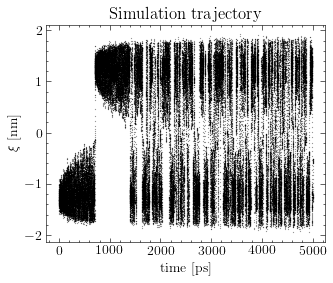

In [21]:
#Load the trajectory data
data = plumed.read_as_pandas("position")
time = data["time"]
position = data["p.x"]

#plot trajectory
plt.scatter(time, position, color="black",marker=".", s=0.1)
plt.xlabel("time [ps]")
plt.ylabel(r"$\xi$ [nm]")
plt.title("Simulation trajectory")
plt.show()

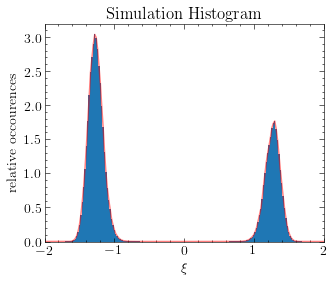

In [22]:
#load histogram data
data = plumed.read_as_pandas("histo")
histogram = data["hh"]
position = data["p.x"]

#plot histogram
plt.bar(position, histogram, width=0.02, align="center", label="Histogram")#, range=(-np.pi, np.pi))
plt.plot(position, histogram, color="red", alpha=0.5, label="Probability density")
plt.xlim(-2,2)
plt.xlabel(r"$\xi$")
plt.ylabel("relative occourences")
plt.title("Simulation Histogram")
plt.show()

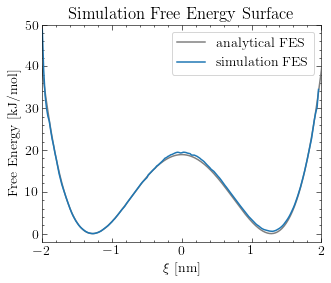

In [23]:
#plot free energy surface
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/MetaD_WT_simulation")

#plot analytical fes
plt.plot(x, y, color="grey", label="analytical FES")

#plot simulation fes
data = plumed.read_as_pandas("fes.dat")
fes = data["fes"]
fes = fes - min(fes)
position = data["p.x"]

plt.plot(position, fes, label="simulation FES")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Simulation Free Energy Surface")
plt.show()

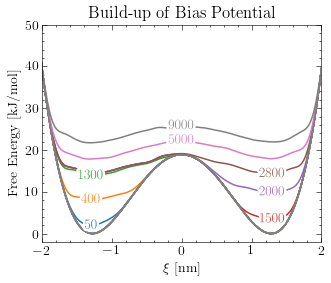

In [24]:
os.chdir("/home/antoniu/Desktop/plots/Jupyter_Notebook/MetaD_WT_simulation")

data = plumed.read_as_pandas("HILLS")
position = data["p.x"]
height = data["height"] * 4/5
sigma = data["sigma_p.x"][0]

bias = np.zeros_like(x)
for i in range(int(len(data))):
    bias += height[i] * np.exp(- (x - position[i])**2 / (2 * sigma**2))
    
    if i in [50, 400, 1300, 1500, 2000, 2800, 5000, 9000]:
        plt.figure(2)
        plt.plot(x, y, color="grey")
        plt.plot(x, bias+y, label=str(i))

plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Build-up of Bias Potential")
    

xvals = [-1.3, -1.3, -1.3, 1.3, 1.3, 1.3, 0, 0]
labelLines(plt.gca().get_lines(), align=False, xvals=xvals)
plt.savefig('/home/antoniu/Desktop/Windows/Graphs_Report/WT_bias_7x^4-23x^2.png', dpi=600, bbox_inches='tight')
plt.show()